## Default of Credit Card Clients
## Decision tree type analysis

In [1]:
from joblib import Memory #cache purpose
pwd = "./default/"
cache_dir = pwd + 'cache_dir'
mem = Memory(cache_dir)
output_path = './output/tree_1/'

import pandas as pd
import numpy as np
import os
os.mkdir(output_path)
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
df_original = pd.read_excel("./input/default of credit card clients.xls",header=1) #rename mal-nomers
df_original =df_original.rename({
                                'PAY_0' : 'PAY_1',
                                'default payment next month':'default'},axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column]
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
rename_dict = {}
for column in BILL+PAY:
    rename_dict[column]=column[:-1]+'_'+column[-1]
df_original = df_original.rename(rename_dict, axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column] #columns with BILL_AMT_n
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
df = df_original.copy()
N_labels = [column for column in df_original.columns if column !='default']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train, label_train= df[N_labels].loc[train_index],df.default[train_index]
    df_test, label_test= df[N_labels].loc[test_index], df.default[test_index]
    
def to_csv(arr,train_or_test='train',name=None):   #to_csv
    df = pd.DataFrame(arr)
    if type(name)==str:
        df.to_csv(f'{output_path}/{name}_{train_or_test}.csv', index = False )
    else:
        df.to_csv(f'{output_path}/{train_or_test}.csv', index = False )

In [2]:
# for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
#     X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
#     X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]
#X_train ,y_train= df_train.iloc[:150,:] ,label_train.iloc[:150]
X_train ,y_train= df_train,label_train
#X,y= df_train.iloc[:300,:] ,label_train.iloc[:300]

In [3]:
from pyts.transformation import BagOfPatterns as BOP
from mods_defaults import ElementaryExtractor,BasicTransformer,MyMulPyts, NonTsPass #for pickle (cache)purpose
my_basic = BasicTransformer()
t_df = my_basic.fit_transform(X_train)
print(t_df.columns)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
L_PAY = [column for column in t_df.columns if 'log_PAY' in column]
L_BILL = [column for column in t_df.columns if 'log_BILL' in column]
L_USAGE =  [column for column in t_df.columns if 'log_USAGE' in column]
L_DIFF =  [column for column in t_df.columns if 'log_DIFF' in column]
print(len(L_PAY))

Index(['log_LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'log_BILL_AMT_1',
       'log_BILL_AMT_2', 'log_BILL_AMT_3', 'log_BILL_AMT_4', 'log_BILL_AMT_5',
       'log_BILL_AMT_6', 'log_PAY_AMT_1', 'log_PAY_AMT_2', 'log_PAY_AMT_3',
       'log_PAY_AMT_4', 'log_PAY_AMT_5', 'log_PAY_AMT_6', 'log_USAGE_1',
       'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5',
       'log_DIFF_0', 'log_DIFF_1', 'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')
6


In [4]:
my_basic = BasicTransformer(scale="")
t_df = my_basic.fit_transform(X_train)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
USAGE =  [column for column in t_df.columns if 'USAGE' in column]
DIFF =  [column for column in t_df.columns if 'DIFF' in column]
len(USAGE+DIFF)

10

In [5]:
from sklearn.pipeline import Pipeline
# SVCs
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# pipeline
from sklearn.pipeline import make_union
# evaluation modules
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
def my_score(y_train,y_pred):
    accuracy = accuracy_score(y_train,y_pred)
    print(f'accuracy : {accuracy}')
    pre_score = precision_score(y_train,y_pred)
    print(f'precision : {pre_score}')
    rec_score = recall_score(y_train,y_pred)
    print(f'recall : {rec_score}')
    f_score = f1_score(y_train,y_pred)
    print(f'f1_score: {f_score}')

    return [round(accuracy,4), round(pre_score,4), round(rec_score ,4), round(f_score,4)]



In [6]:
for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
    X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
    X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]

In [7]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=None):
    if ax is None:
        plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        plt.plot(thresholds, recalls[:-1], 'g-',label="recall")
        plt.xlabel("thresholds")
        plt.legend(loc="upper left")
        plt.ylim([0,1])
    else:
        ax.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        ax.plot(thresholds, recalls[:-1], 'g-',label="recall")
        ax.set_xlabel("thresholds")
        ax.legend(loc="upper left")
        ax.set_ylim([0,1])


In [8]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[L_USAGE,L_DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,])
my_elementary_trans_5 = ElementaryExtractor([L_USAGE,L_DIFF])


extractors = [NonTsPass(),length_5_bop,length_6_bop,my_elementary_trans_5,my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor

FeatureUnion(transformer_list=[('nontspass', NonTsPass()),
                               ('mymulpyts-1',
                                MyMulPyts(channel_list=[['log_USAGE_1',
                                                         'log_USAGE_2',
                                                         'log_USAGE_3',
                                                         'log_USAGE_4',
                                                         'log_USAGE_5'],
                                                        ['log_DIFF_0',
                                                         'log_DIFF_1',
                                                         'log_DIFF_2',
                                                         'log_DIFF_3',
                                                         'log_DIFF_4']],
                                          estimator=BagOfPatterns(n_bins=3,
                                                                  sparse=False,
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('mymulpyts-2',
                                MyMul...
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('elementaryextractor-1',
                                ElementaryExtractor(channel_list=[['log_USAGE_1',
                                                                   'log_USAGE_2',
                                                                   'log_USAGE_3',
                                                                   'log_USAGE_4',
                                                                   'log_USAGE_5'],
                                                                  ['log_DIFF_0',
                                                                   'log_DIFF_1',
                                                                   'log_DIFF_2',
                                                                   'log_DIFF_3',
                                                                   'log_DIFF_4']])),
                               ('elementaryextractor-2',
                                ElementaryExtractor(channel_list=[['PAY_1',
                                                                   'PAY_2',
                                                                   'PAY_3',
                                                                   'PAY_4',
                                                                   'PAY_5',
                                                                   'PAY_6']]))])

In [9]:
#  pipe = Pipeline([('base',BasicTransformer()),
#                 ('extractor',extractor),
#                 ('scaler',StandardScaler()),
#                 ('estimator',LinearSVC(max_iter = 10000,random_state=42))
#                 ],memory = cache_dir)
# pipe.fit(X_train,y_train)
# y_pred = pipe.predict(X_train)
# cf_matrix =confusion_matrix(y_train,y_pred)
# print(cf_matrix)
# my_score(y_train,y_pred)

In [10]:
y_train_preds = []
y_val_preds = []
y_val_scores= []
results_df_columns = []
evals_df_columns = [] 

t_series,non_regul
Tree
[[3651  730]
 [ 754  490]]

train scores
accuracy : 0.9955555555555555
precision : 0.9953954496208017
recall : 0.984462898473078
f1_score: 0.98989898989899

Val scores
accuracy : 0.7361777777777778
precision : 0.4016393442622951
recall : 0.39389067524115756
f1_score: 0.3977272727272727


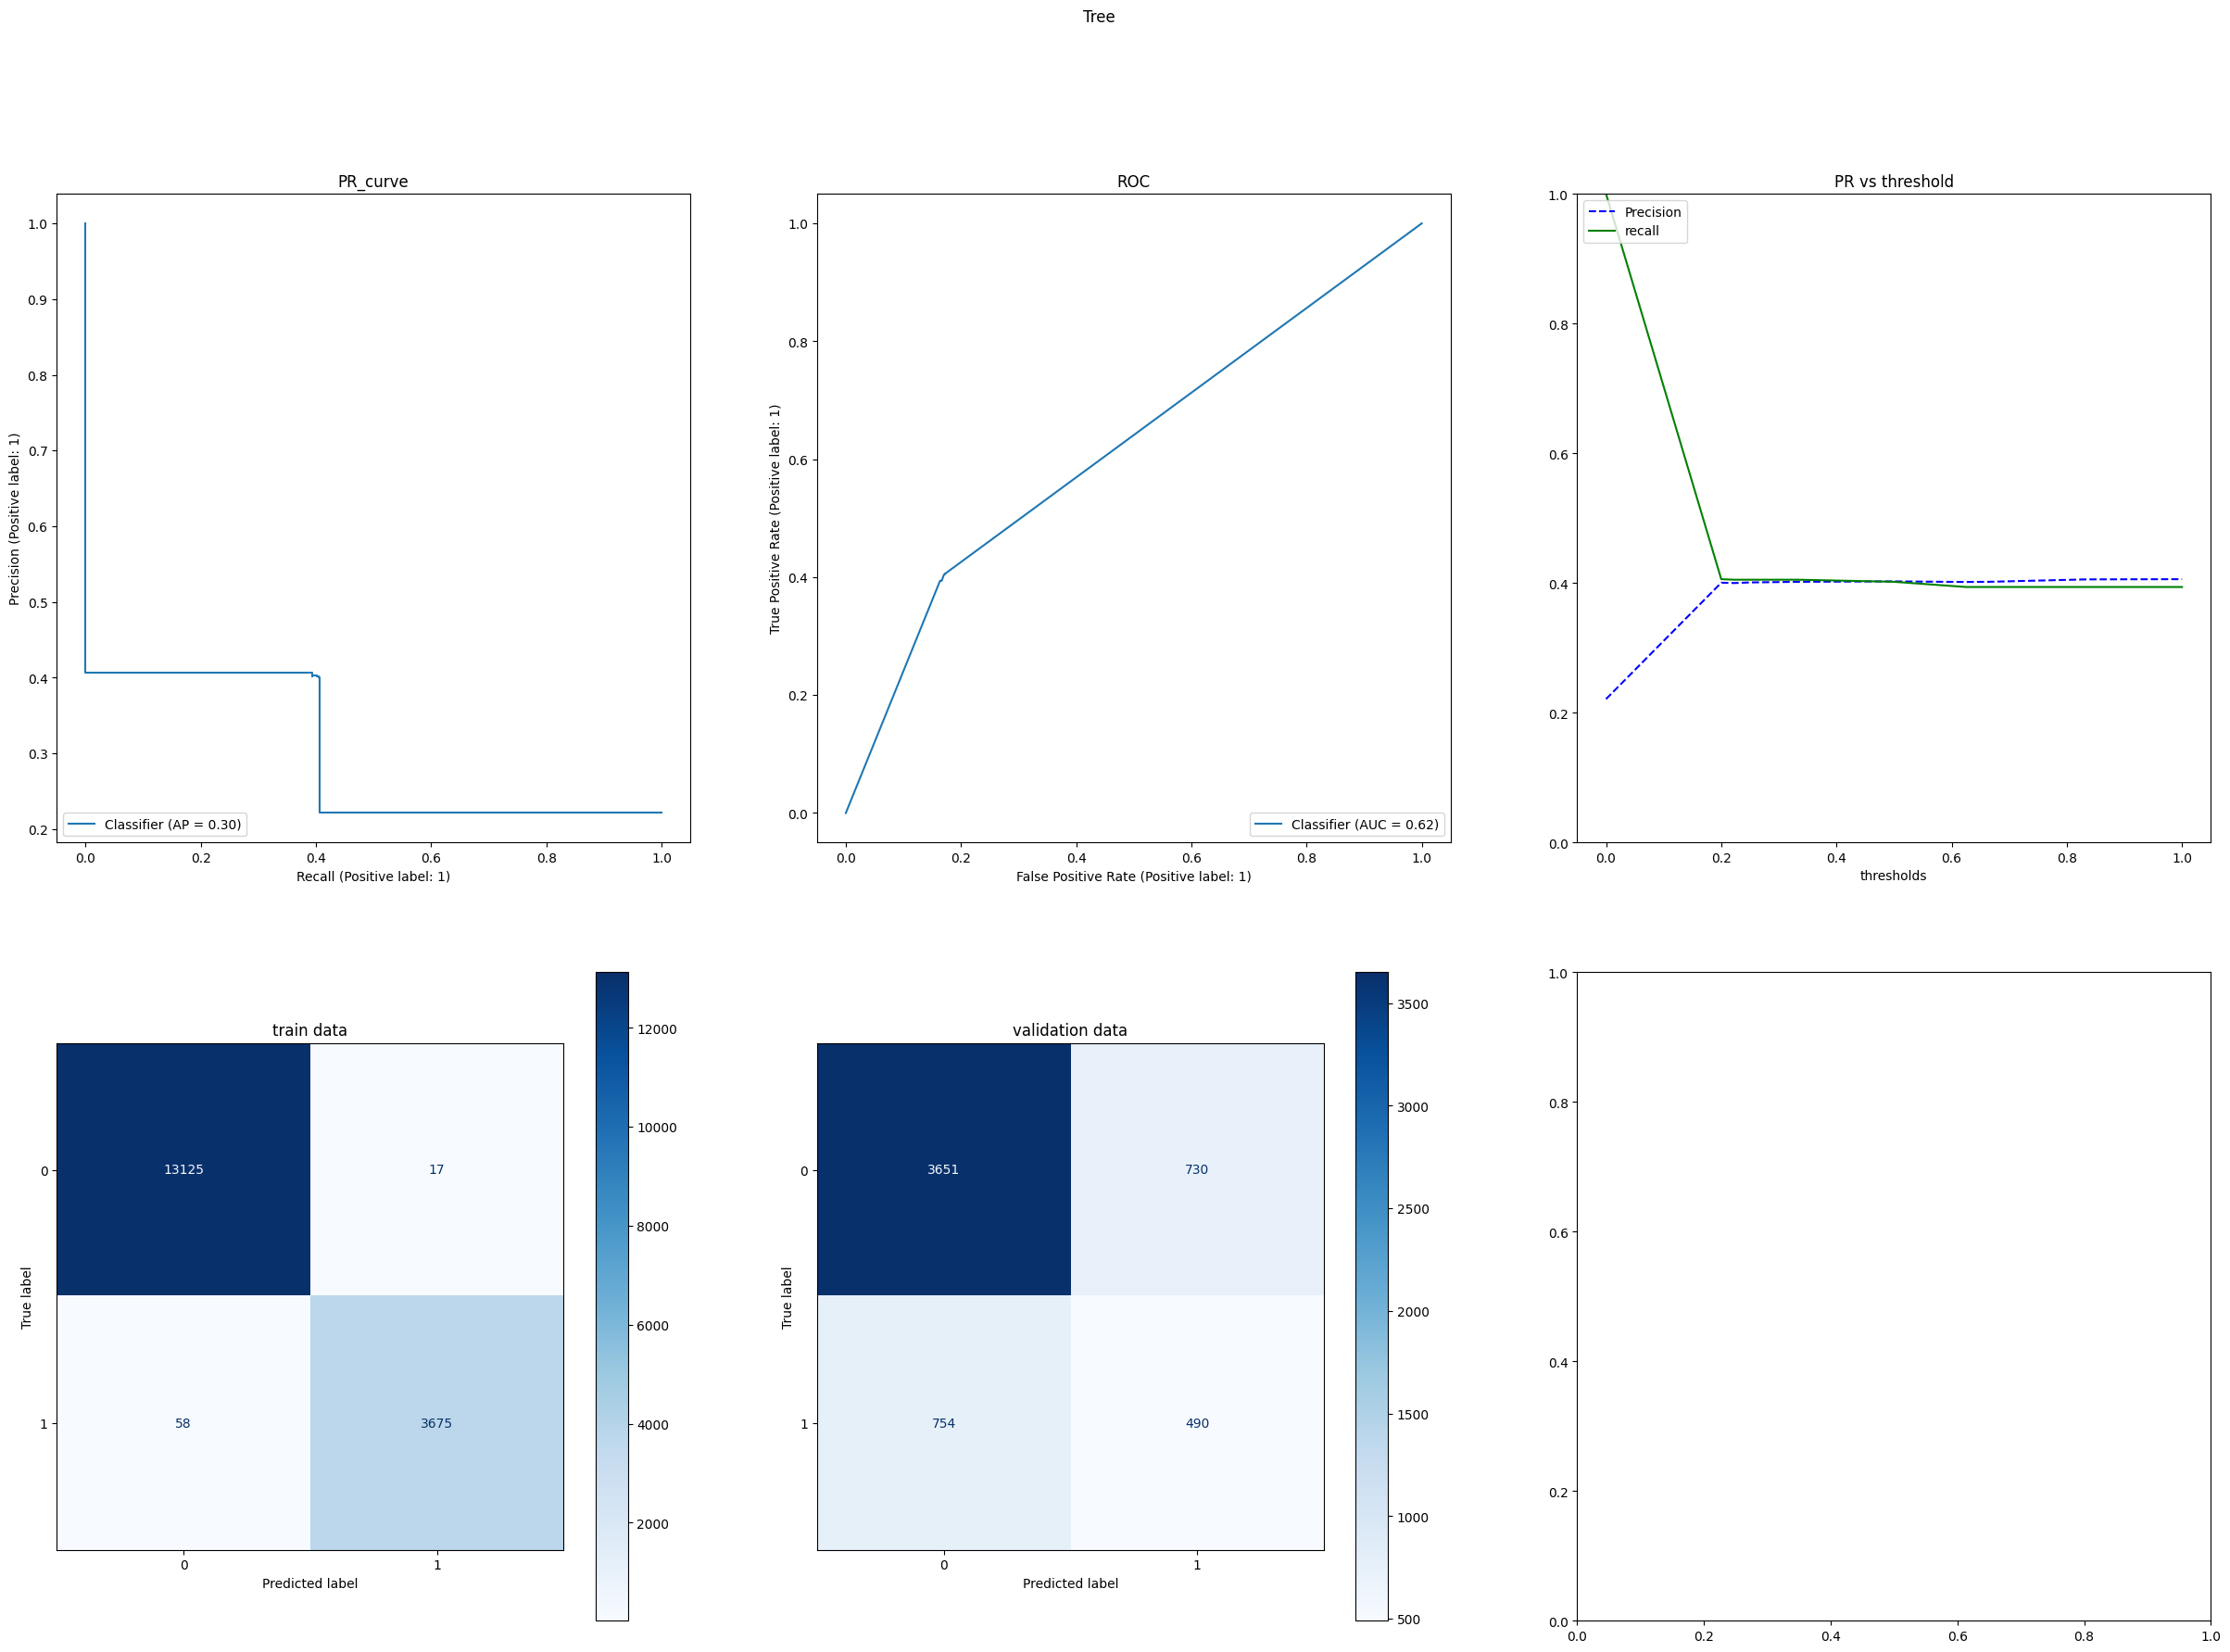

Forest
[[4092  289]
 [ 782  462]]

train scores
accuracy : 0.9955555555555555
precision : 0.9919311457772996
recall : 0.9879453522635949
f1_score: 0.9899342370151657

Val scores
accuracy : 0.8096
precision : 0.6151797603195739
recall : 0.37138263665594856
f1_score: 0.46315789473684216


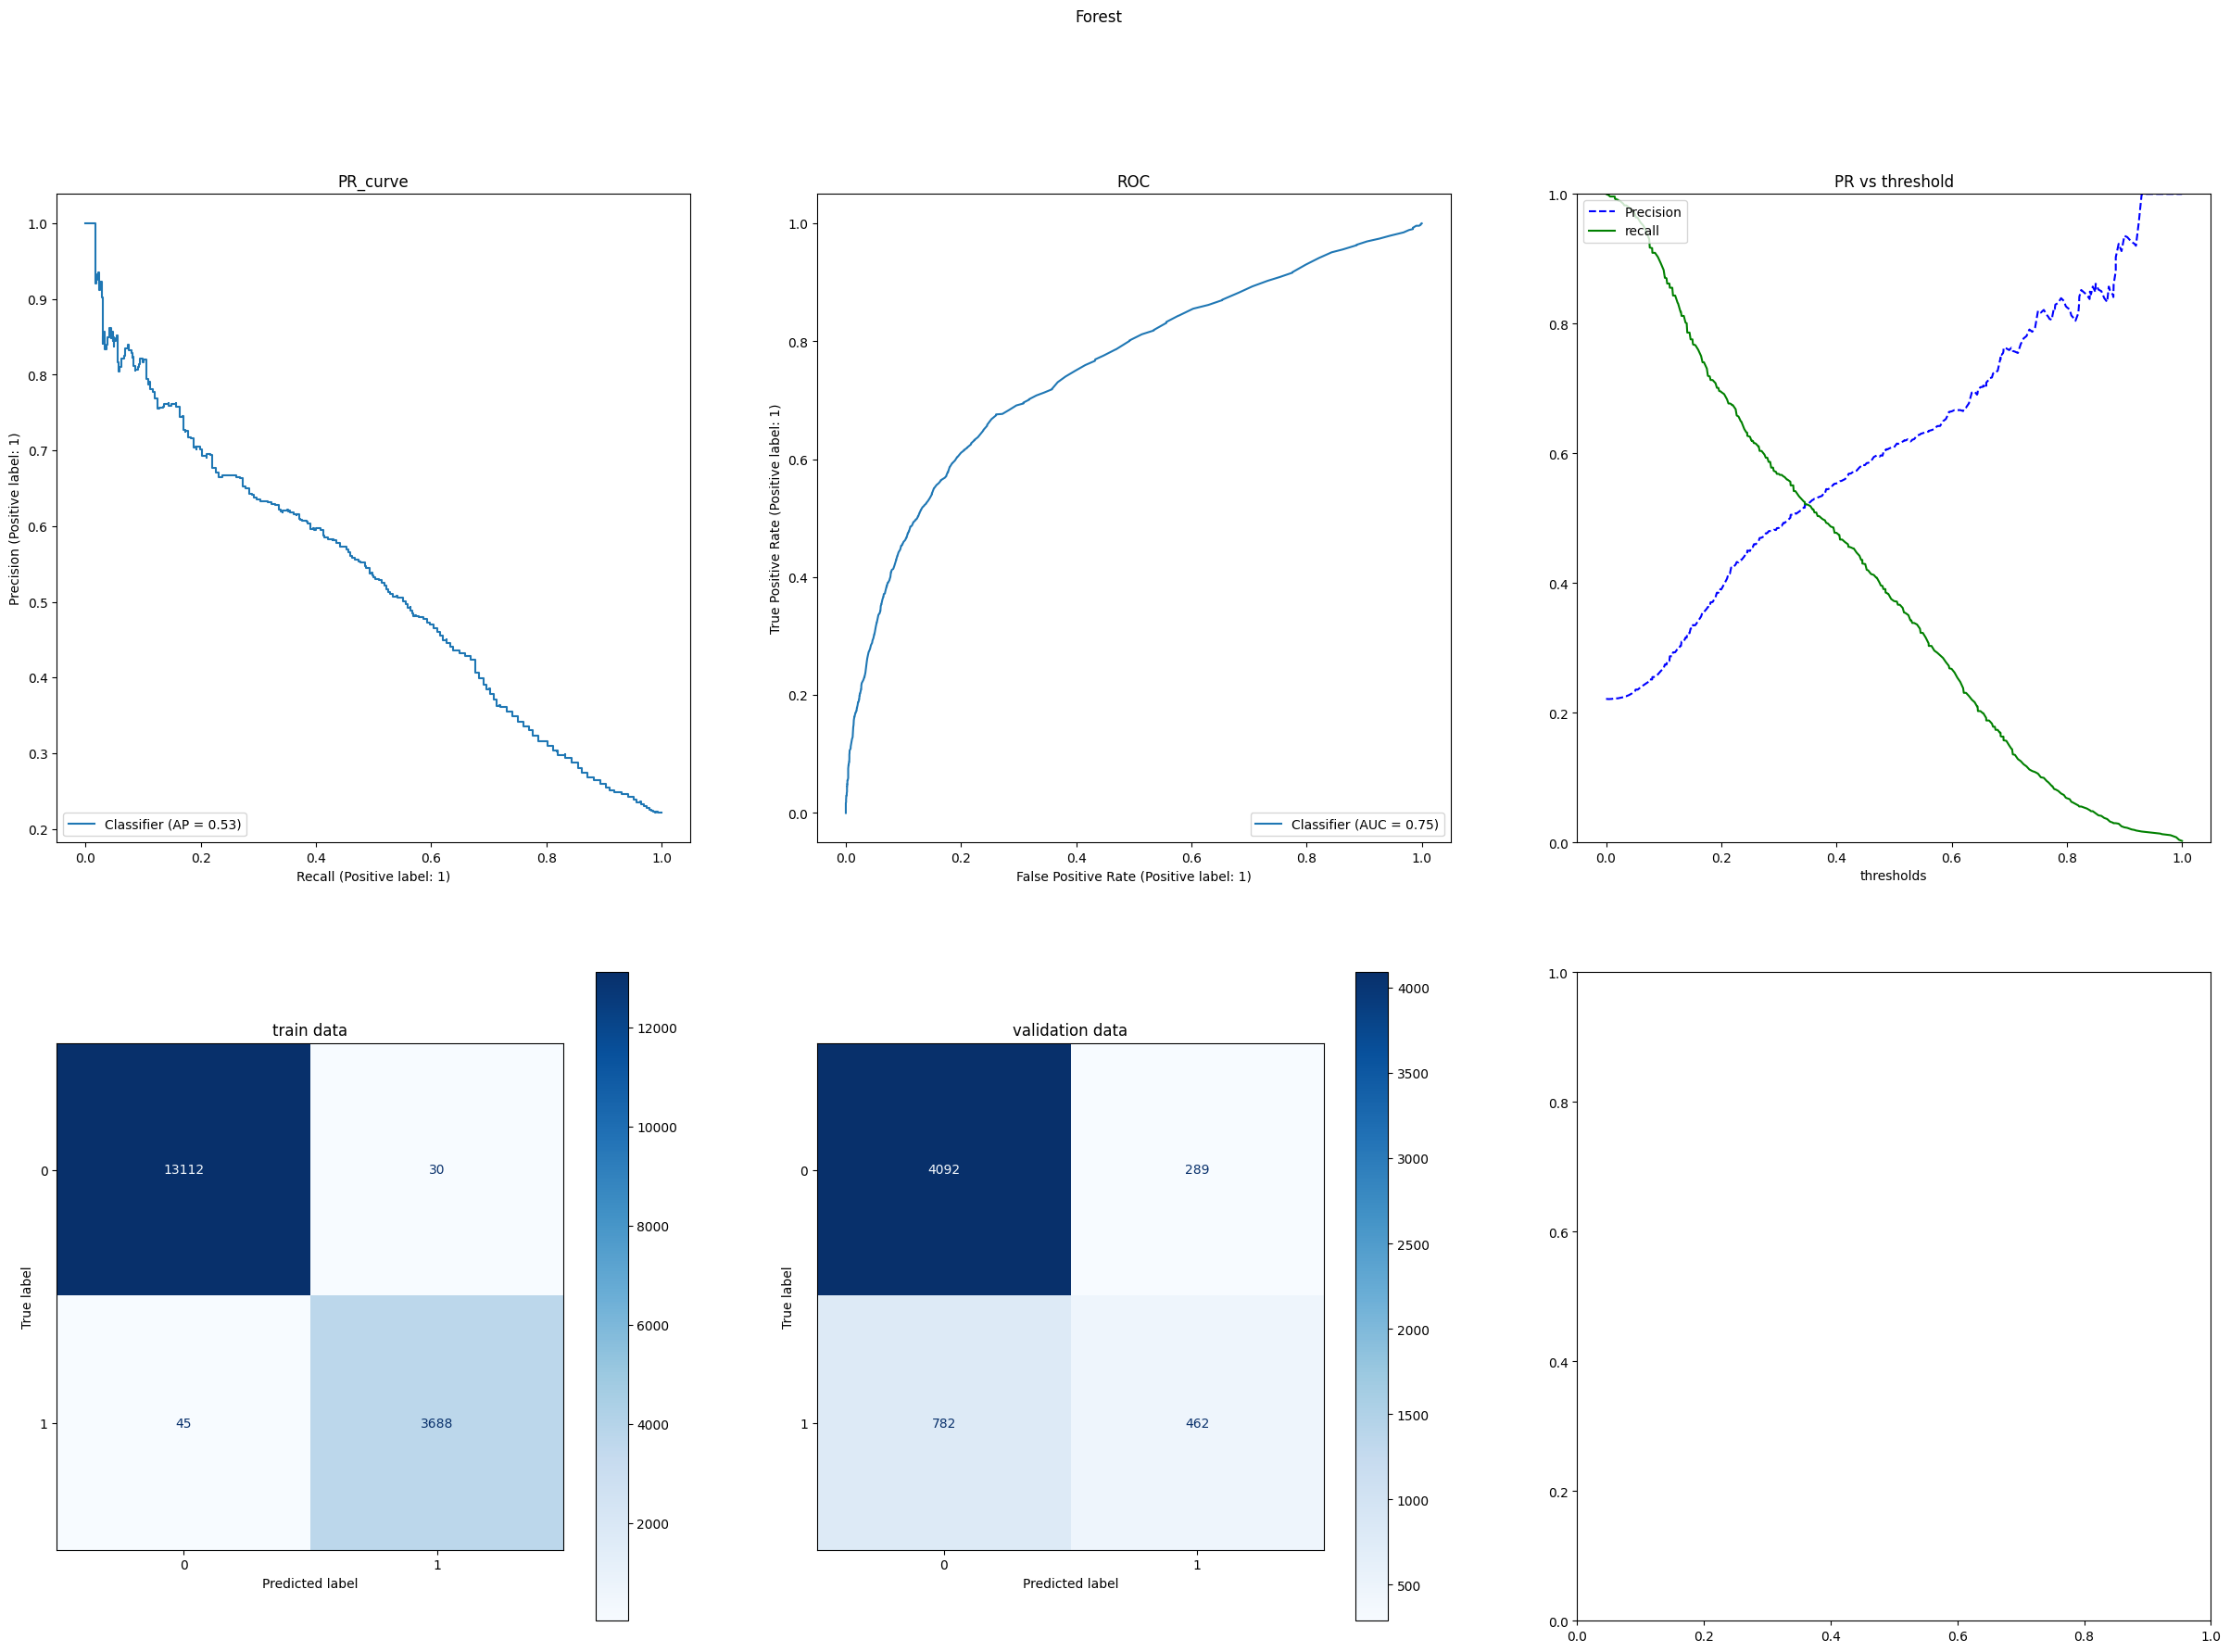

Ada
[[4133  248]
 [ 819  425]]

train scores
accuracy : 0.8113777777777778
precision : 0.641170431211499
recall : 0.334583444950442
f1_score: 0.4397113184298539

Val scores
accuracy : 0.8103111111111111
precision : 0.6315007429420505
recall : 0.34163987138263663
f1_score: 0.44340114762649974


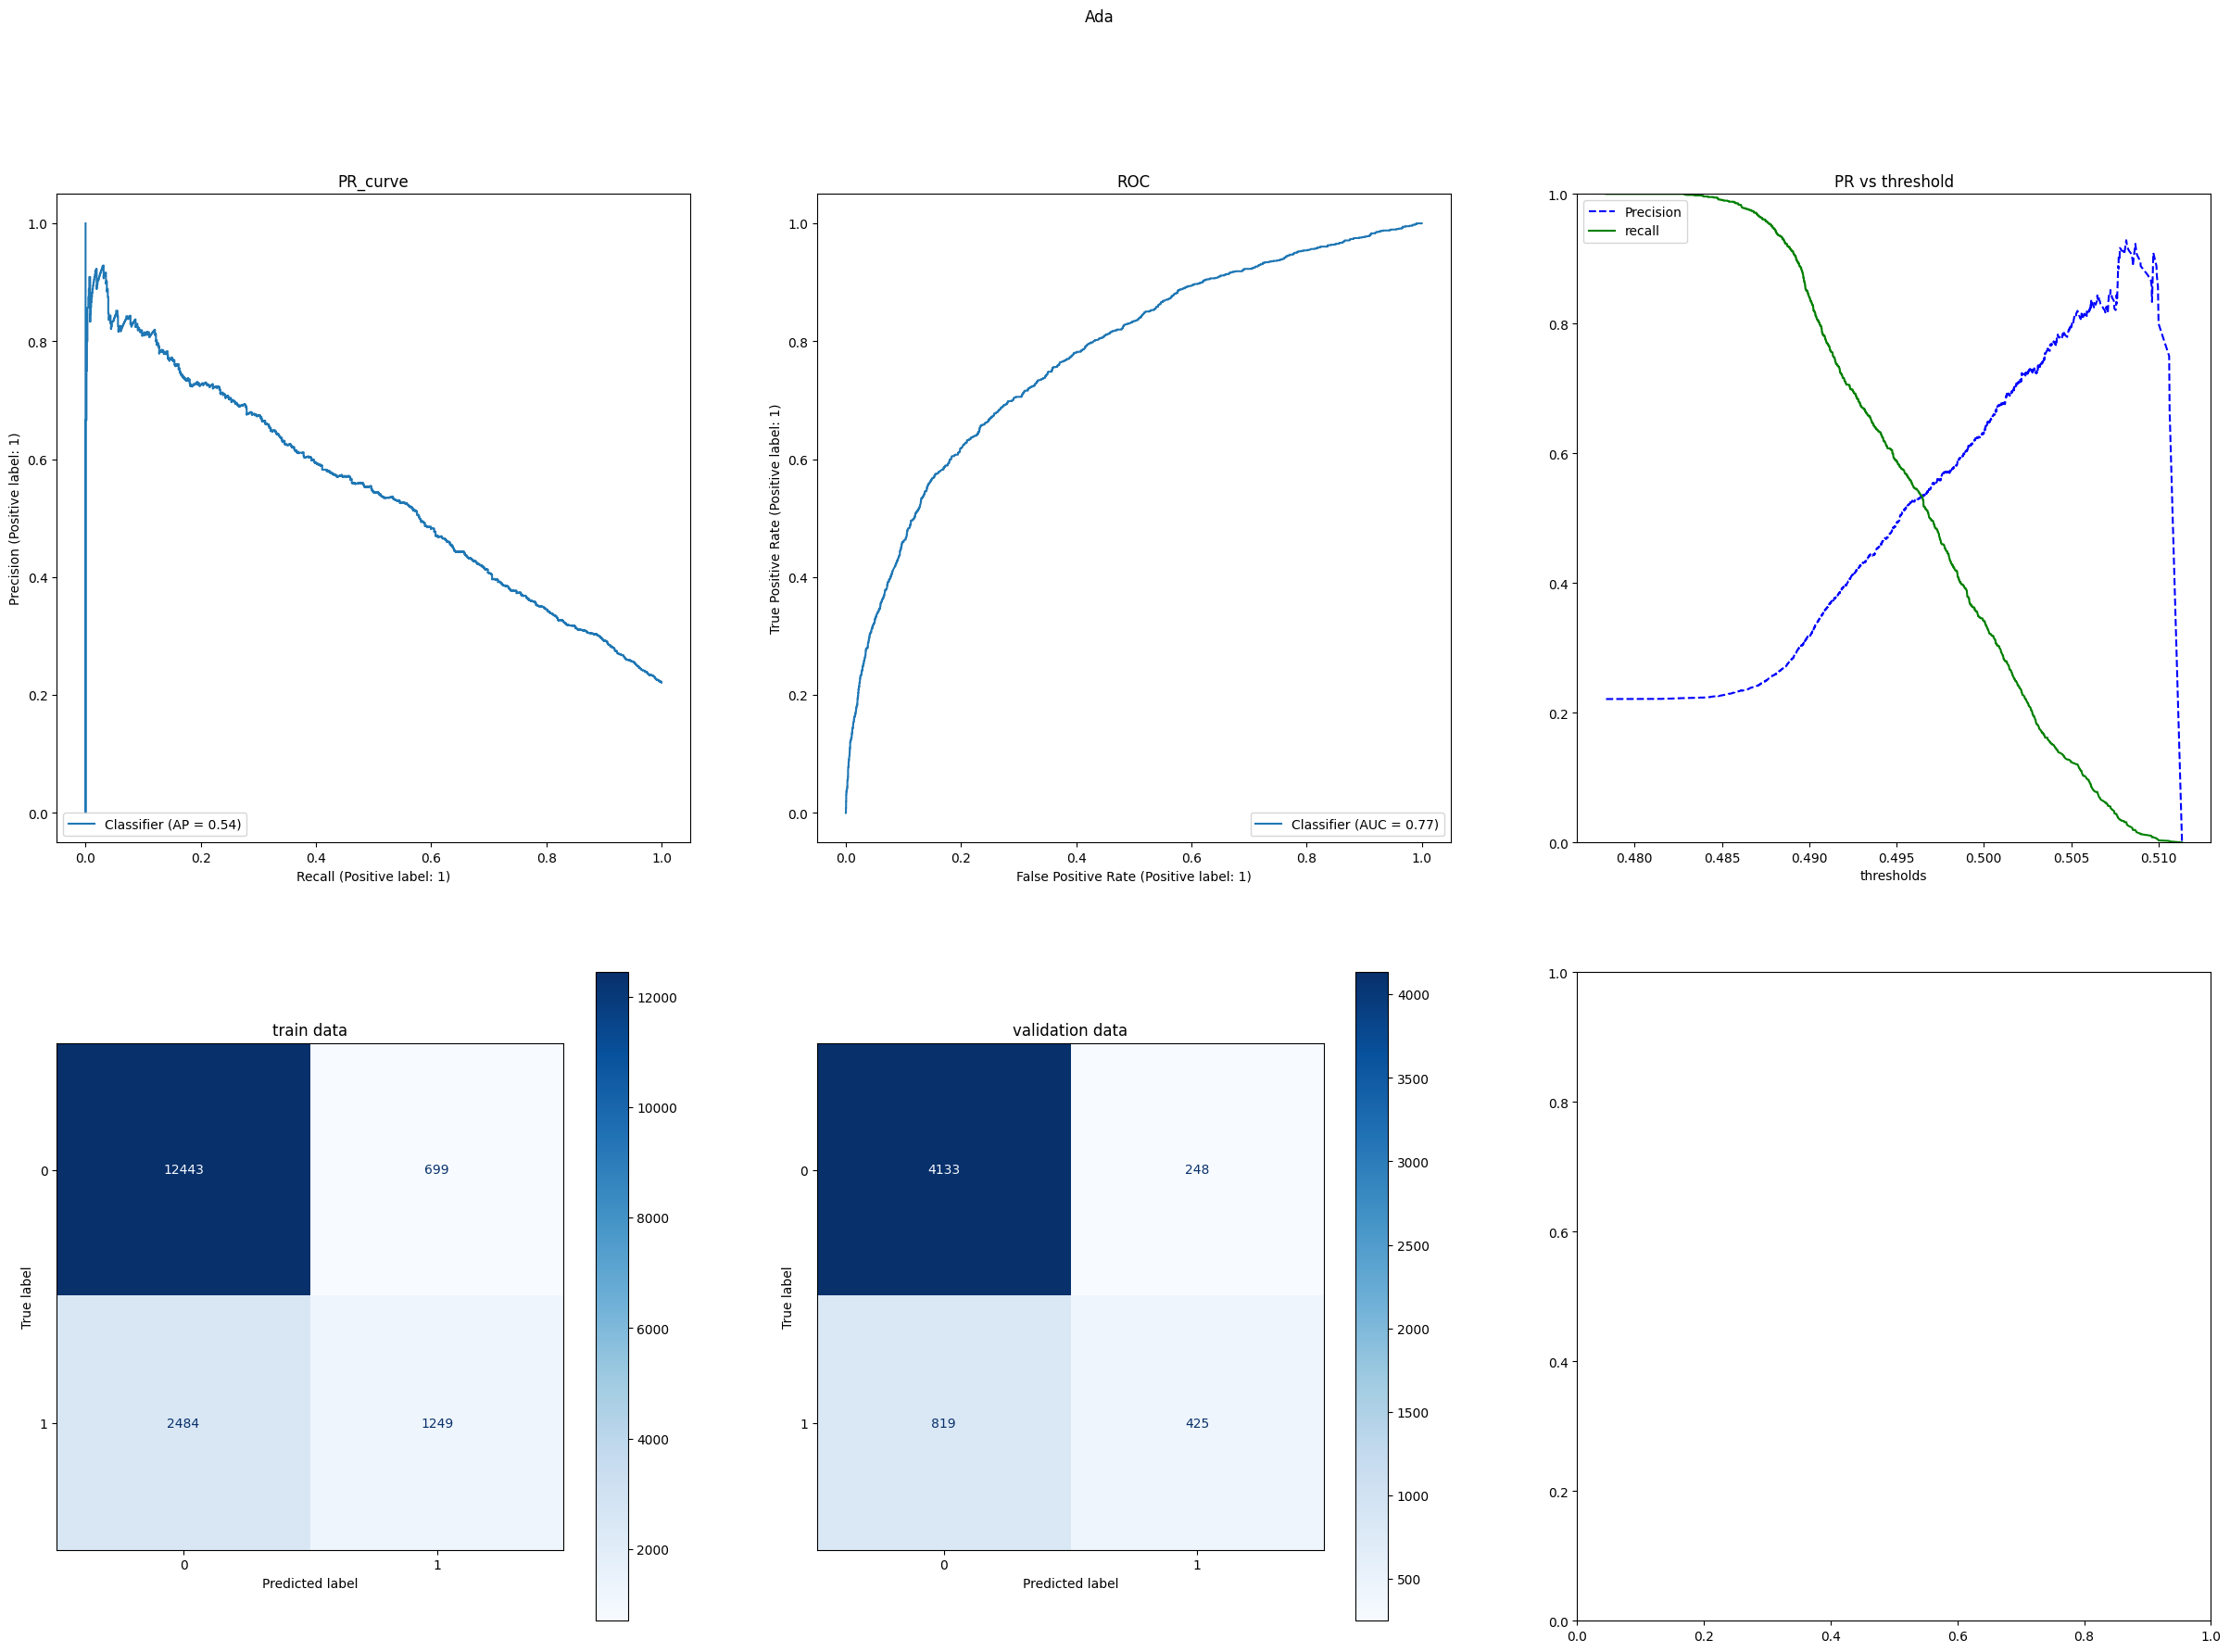

GdBoost
[[4133  248]
 [ 800  444]]

train scores
accuracy : 0.8284444444444444
precision : 0.7116161616161616
recall : 0.37744441467988216
f1_score: 0.4932609837213373

Val scores
accuracy : 0.8136888888888889
precision : 0.6416184971098265
recall : 0.35691318327974275
f1_score: 0.4586776859504132


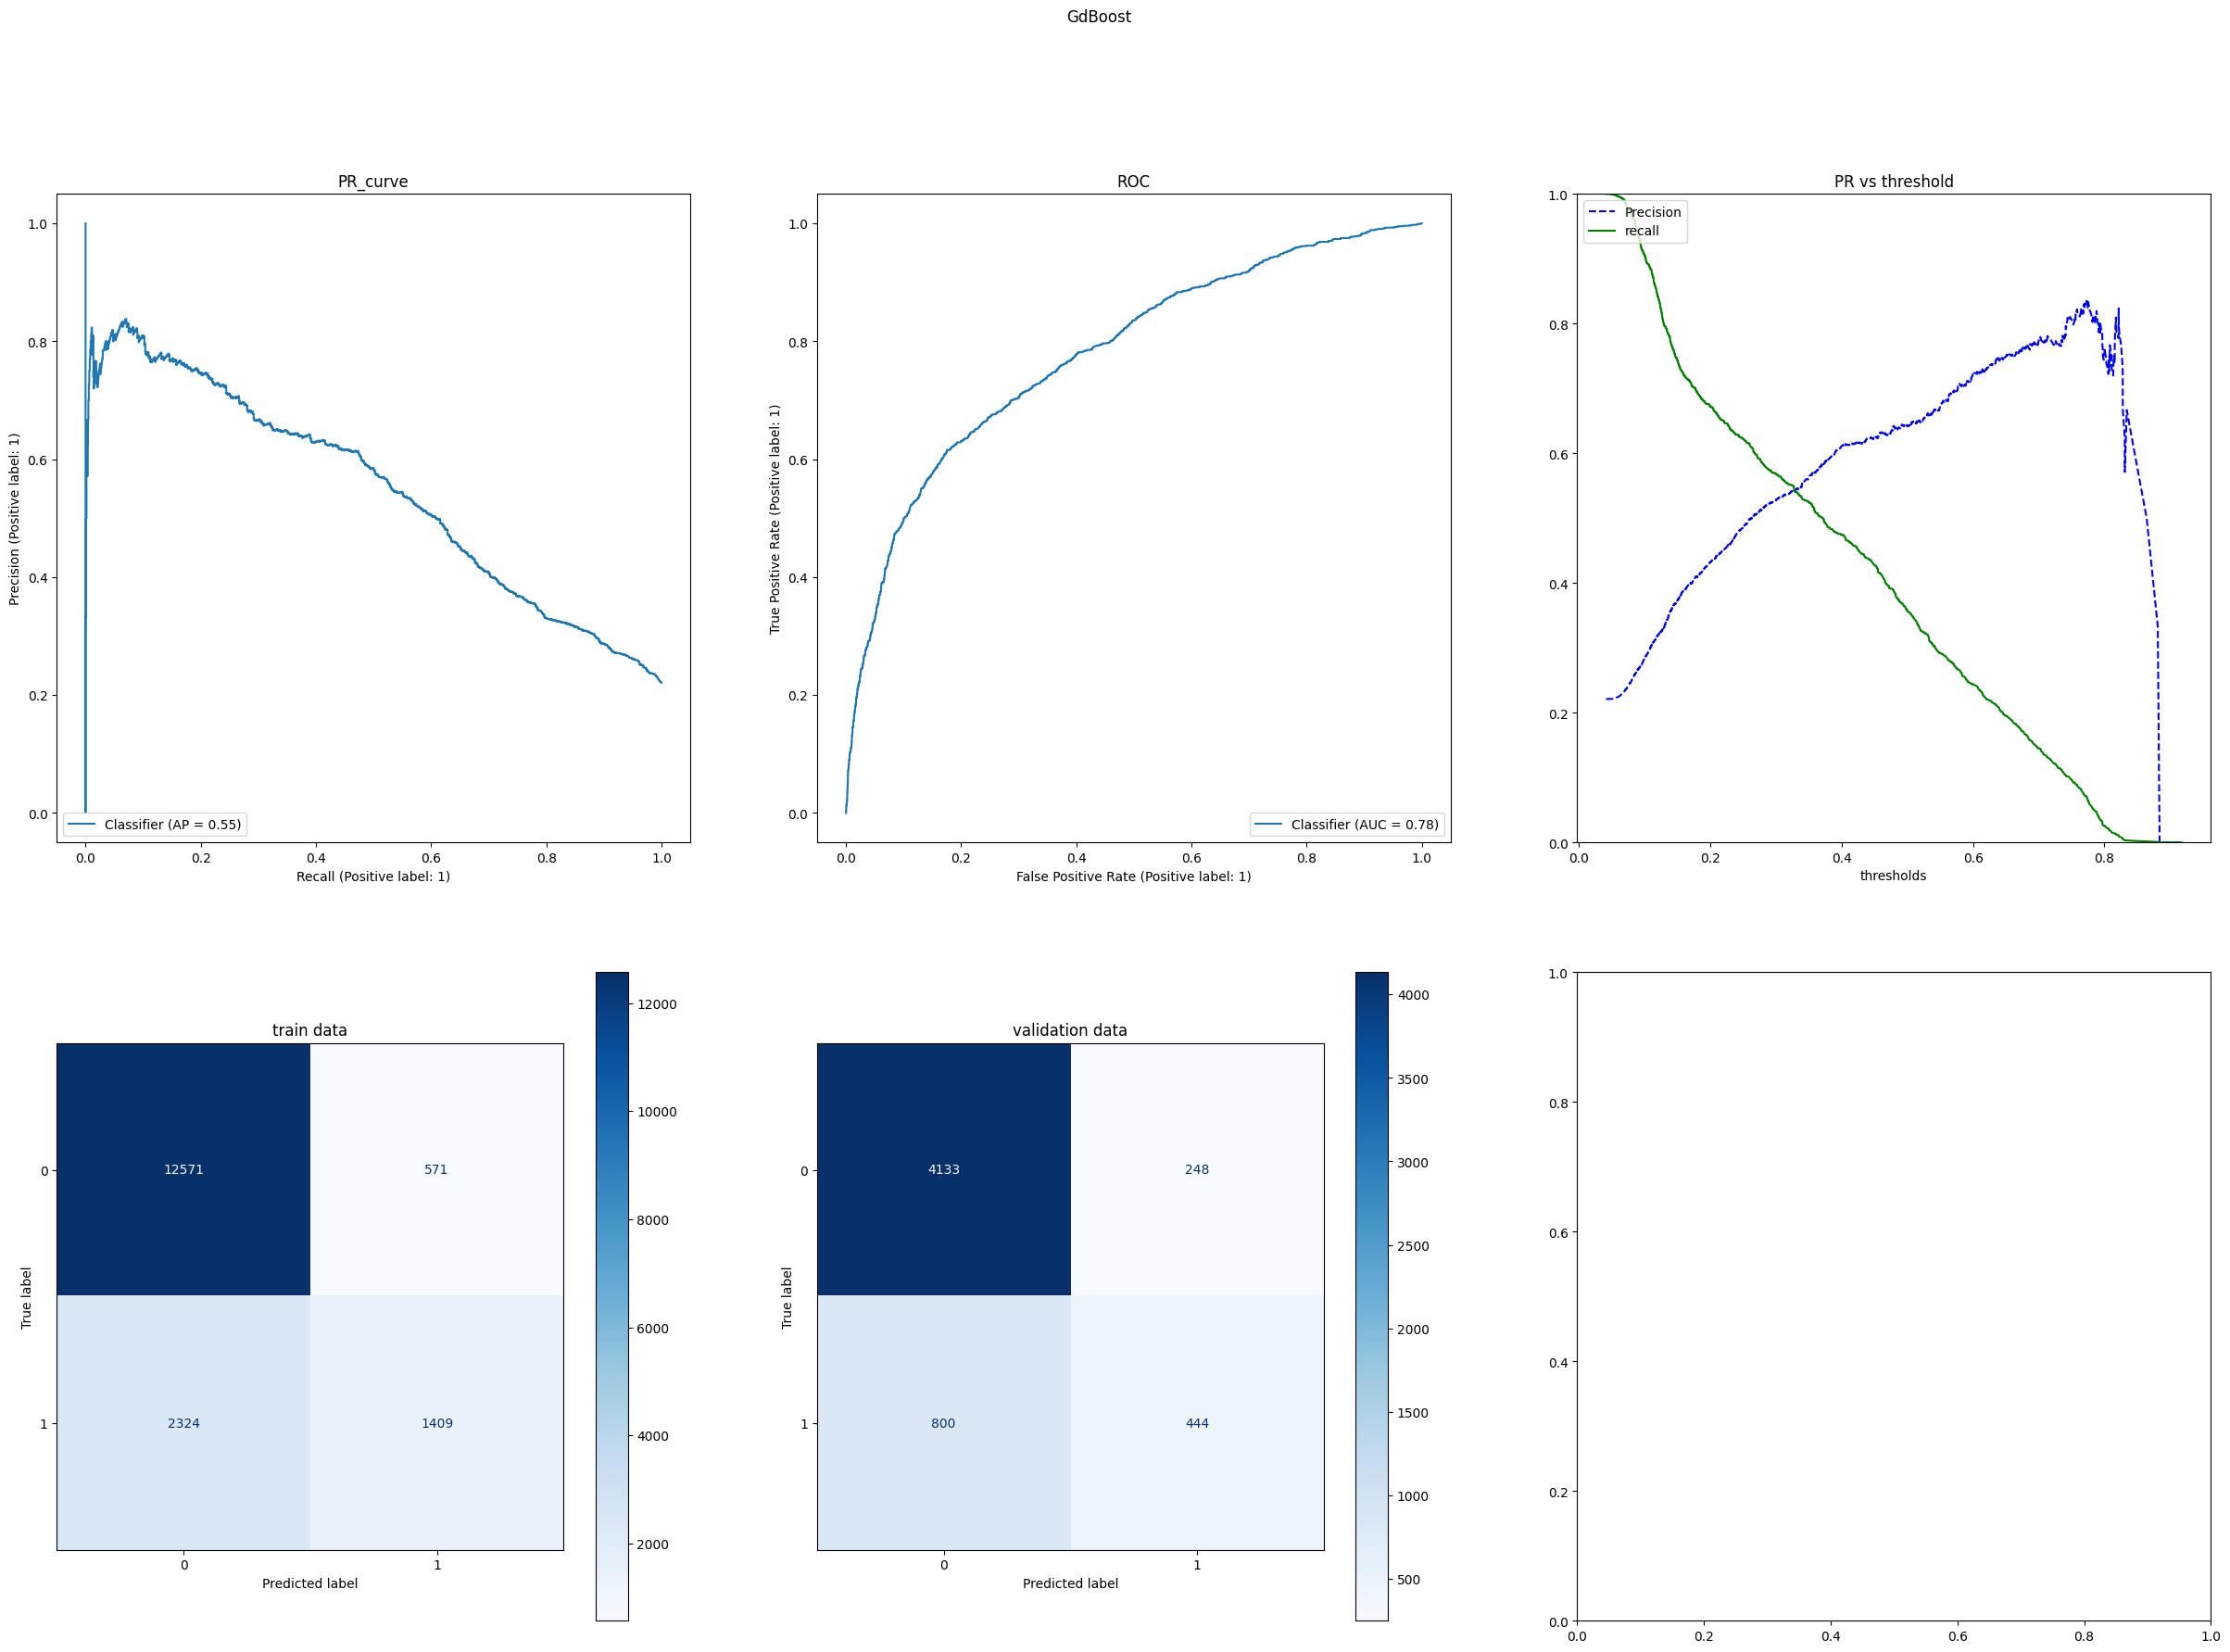

In [11]:
case_name ='t_series,non_regul'
print(case_name)
my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,



results = []
#Computation
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})



#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

raw,non_regul
Tree
[[3571  810]
 [ 736  508]]

train scores
accuracy : 0.9995259259259259
precision : 1.0
recall : 0.997856951513528
f1_score: 0.9989273263609547

Val scores
accuracy : 0.7251555555555556
precision : 0.38543247344461307
recall : 0.40836012861736337
f1_score: 0.39656518345042935


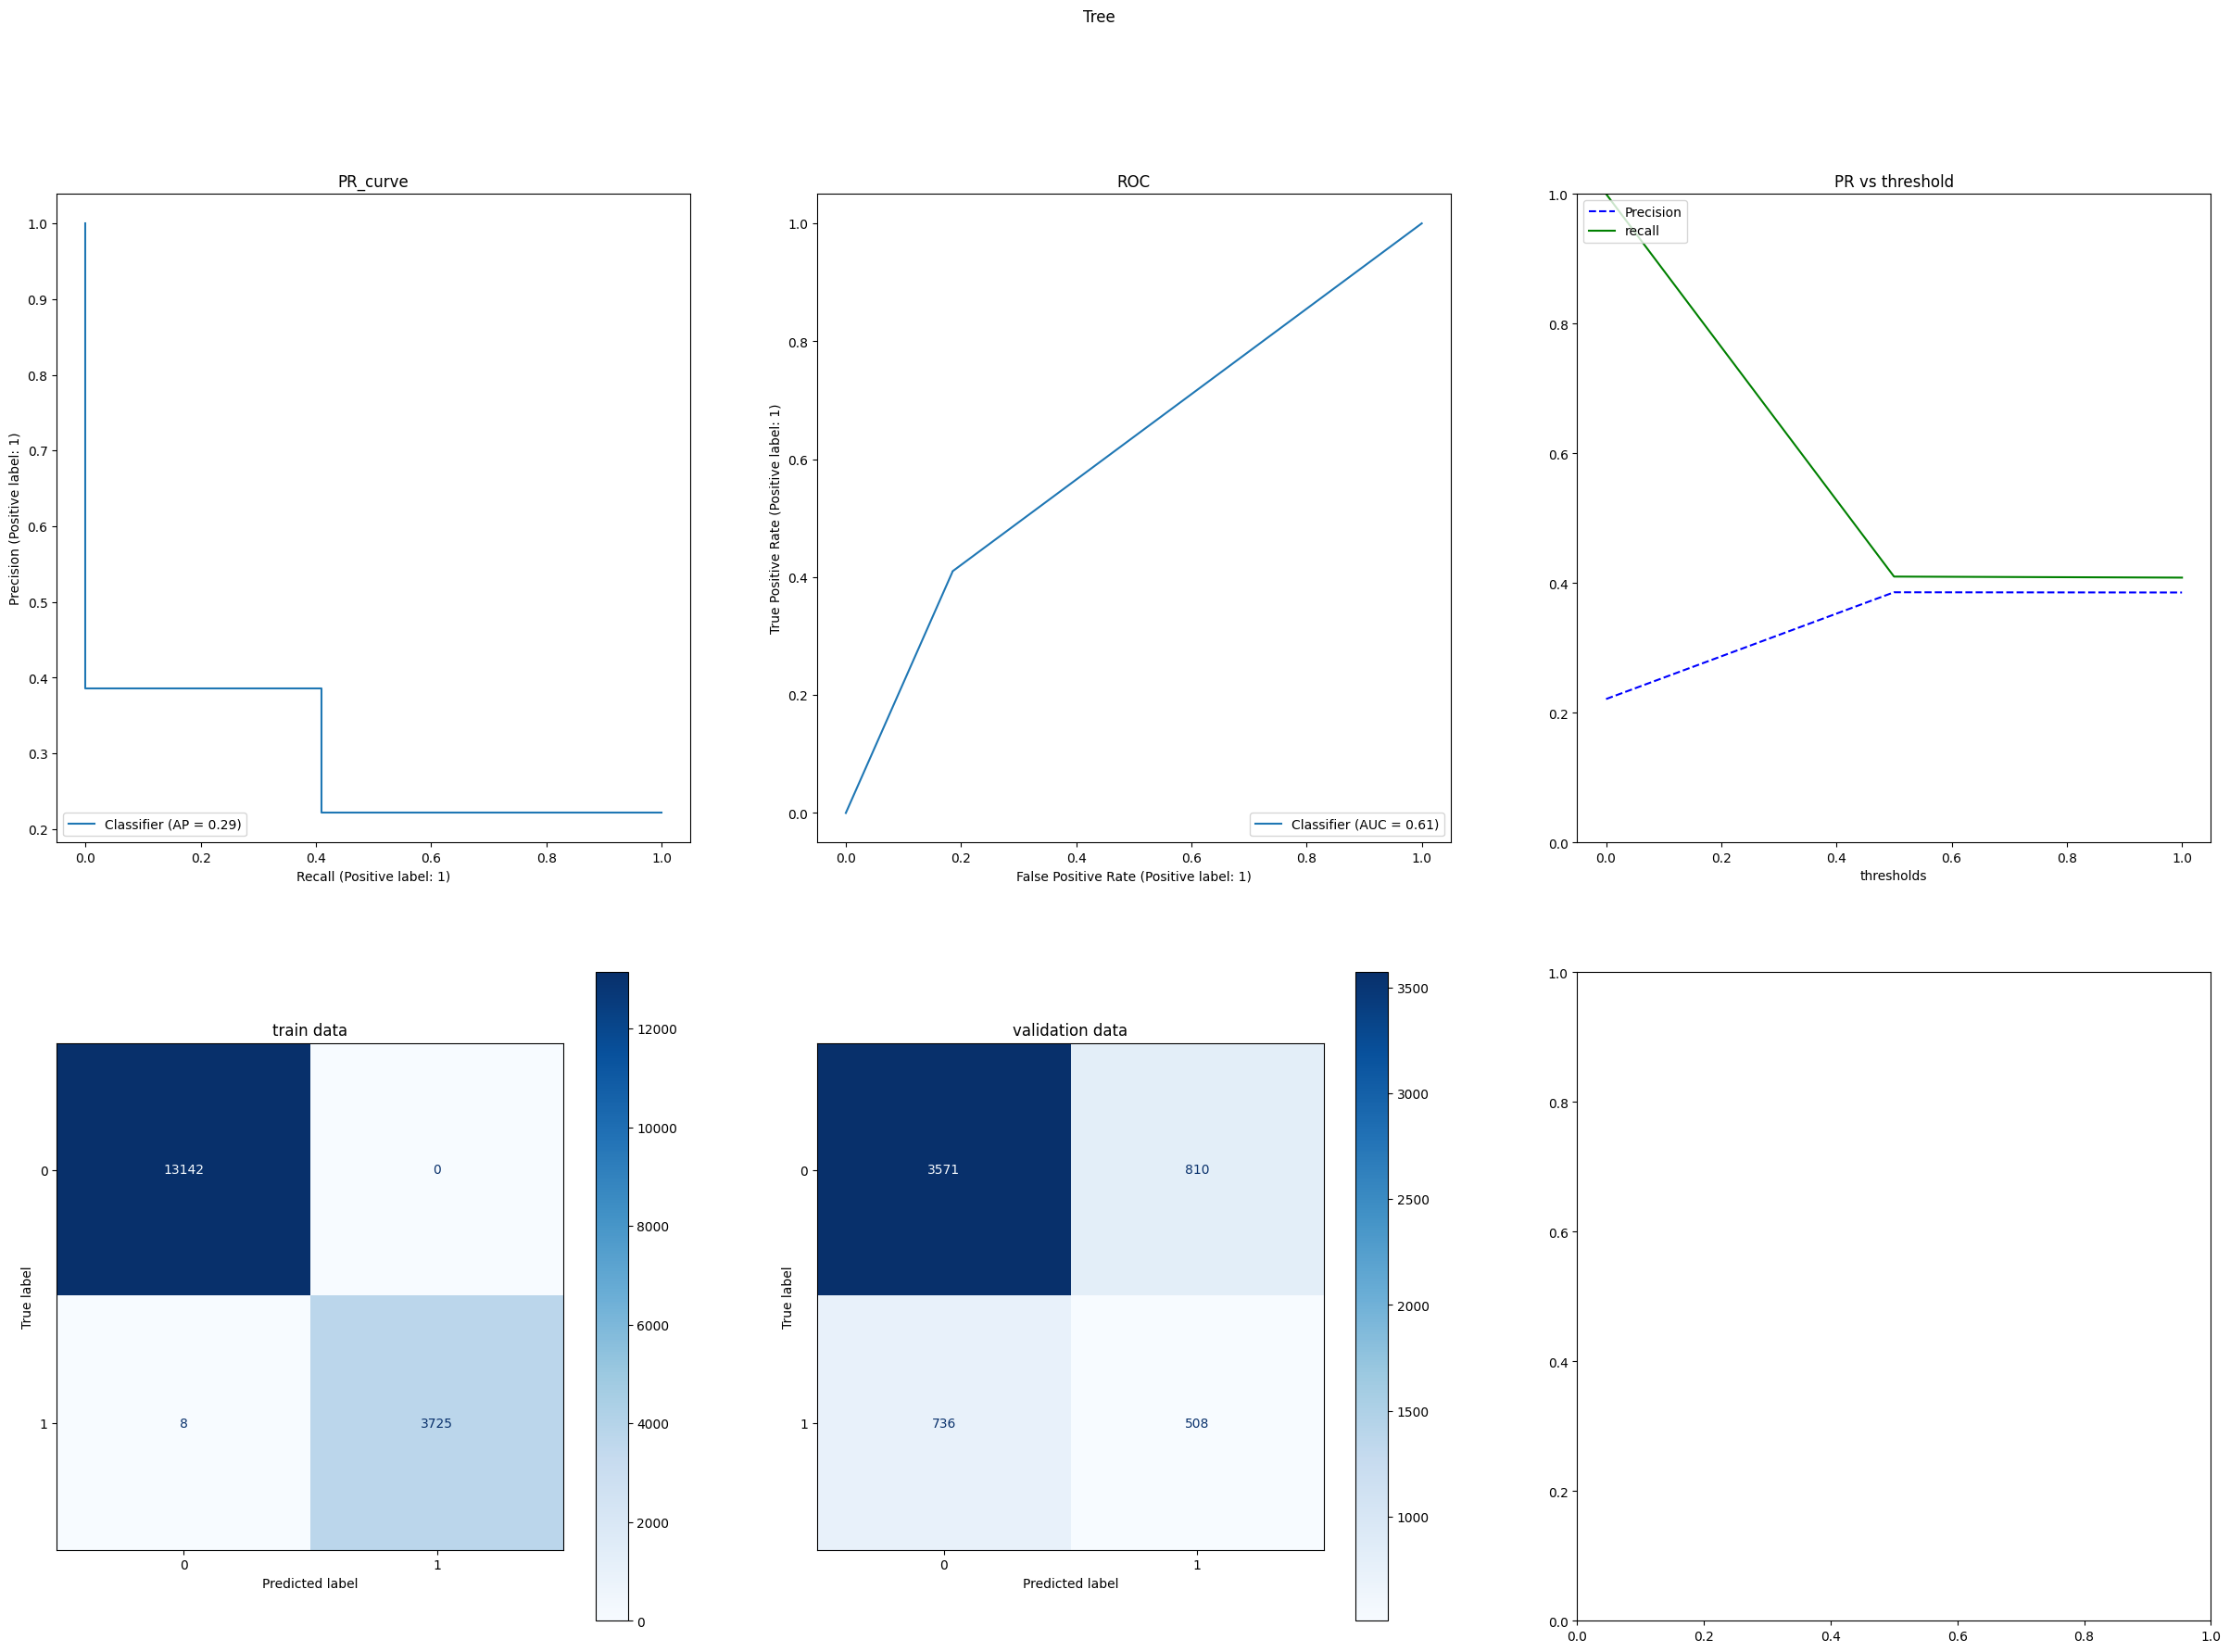

Forest
[[4124  257]
 [ 770  474]]

train scores
accuracy : 0.9995259259259259
precision : 0.9991959260251944
recall : 0.998660594695955
f1_score: 0.9989281886387995

Val scores
accuracy : 0.8174222222222223
precision : 0.6484268125854993
recall : 0.38102893890675243
f1_score: 0.48


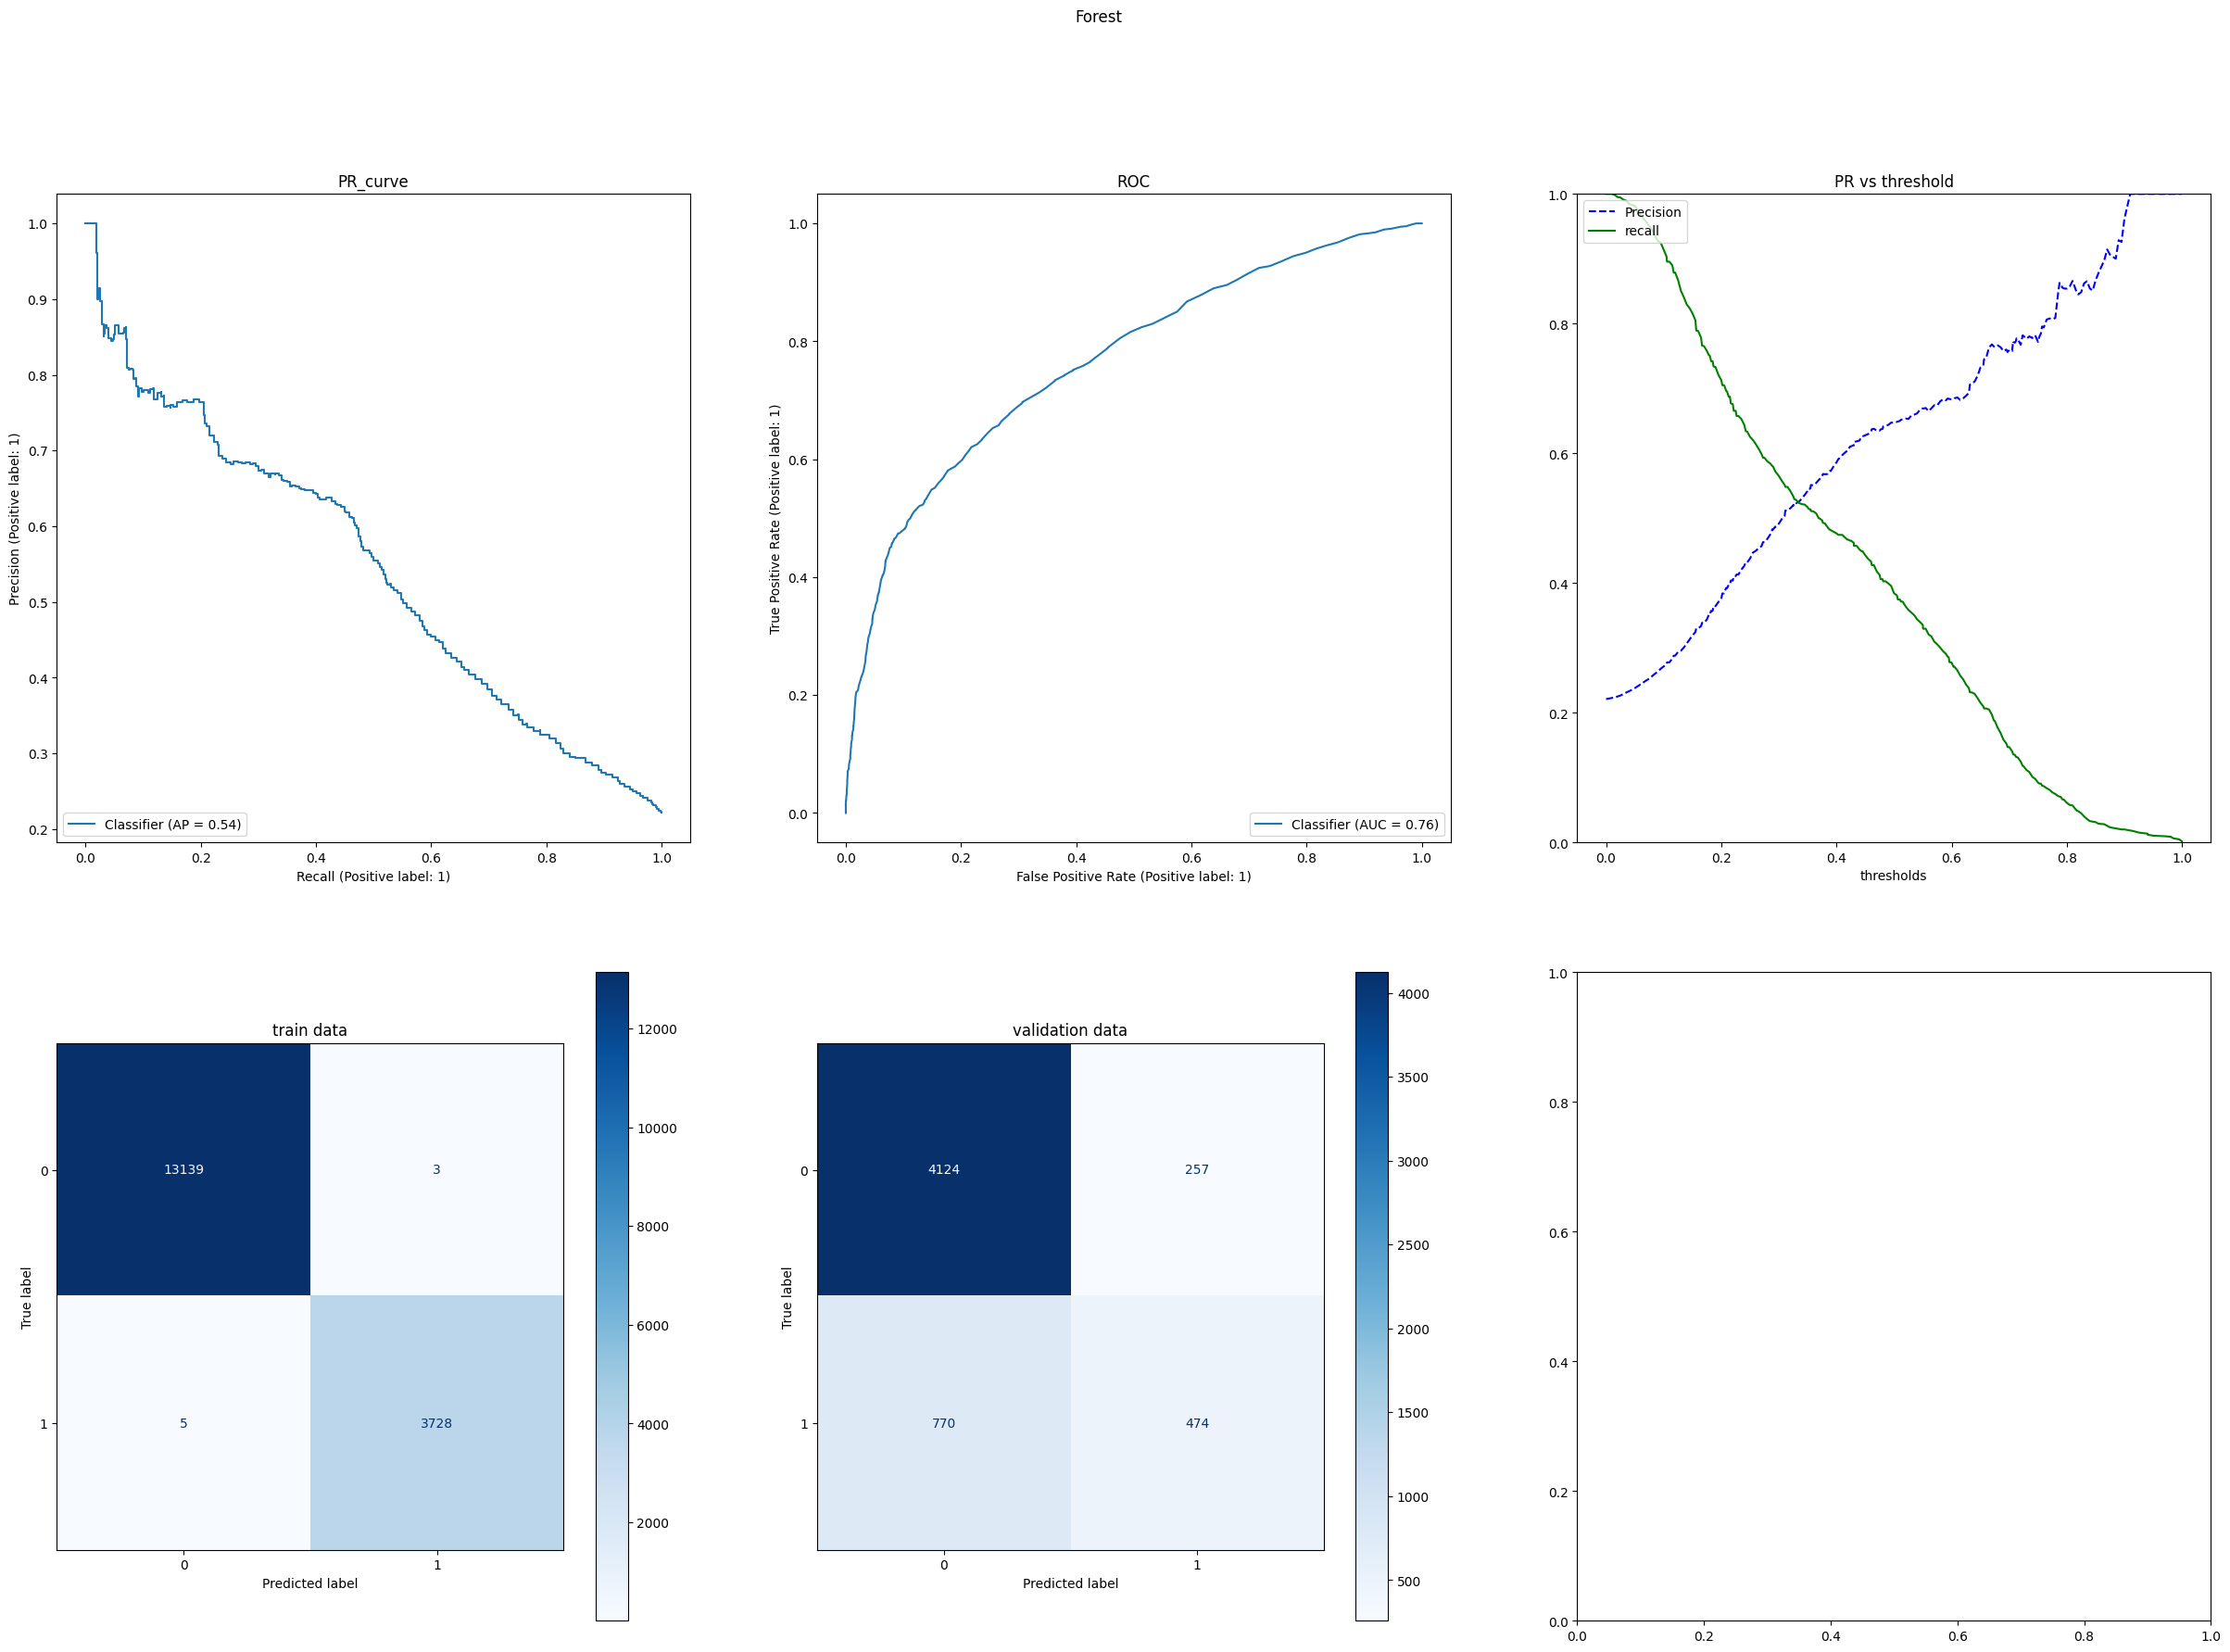

Ada
[[4192  189]
 [ 817  427]]

train scores
accuracy : 0.8184296296296296
precision : 0.6925734024179621
recall : 0.322260916153228
f1_score: 0.439853747714808

Val scores
accuracy : 0.8211555555555555
precision : 0.6931818181818182
recall : 0.3432475884244373
f1_score: 0.4591397849462366


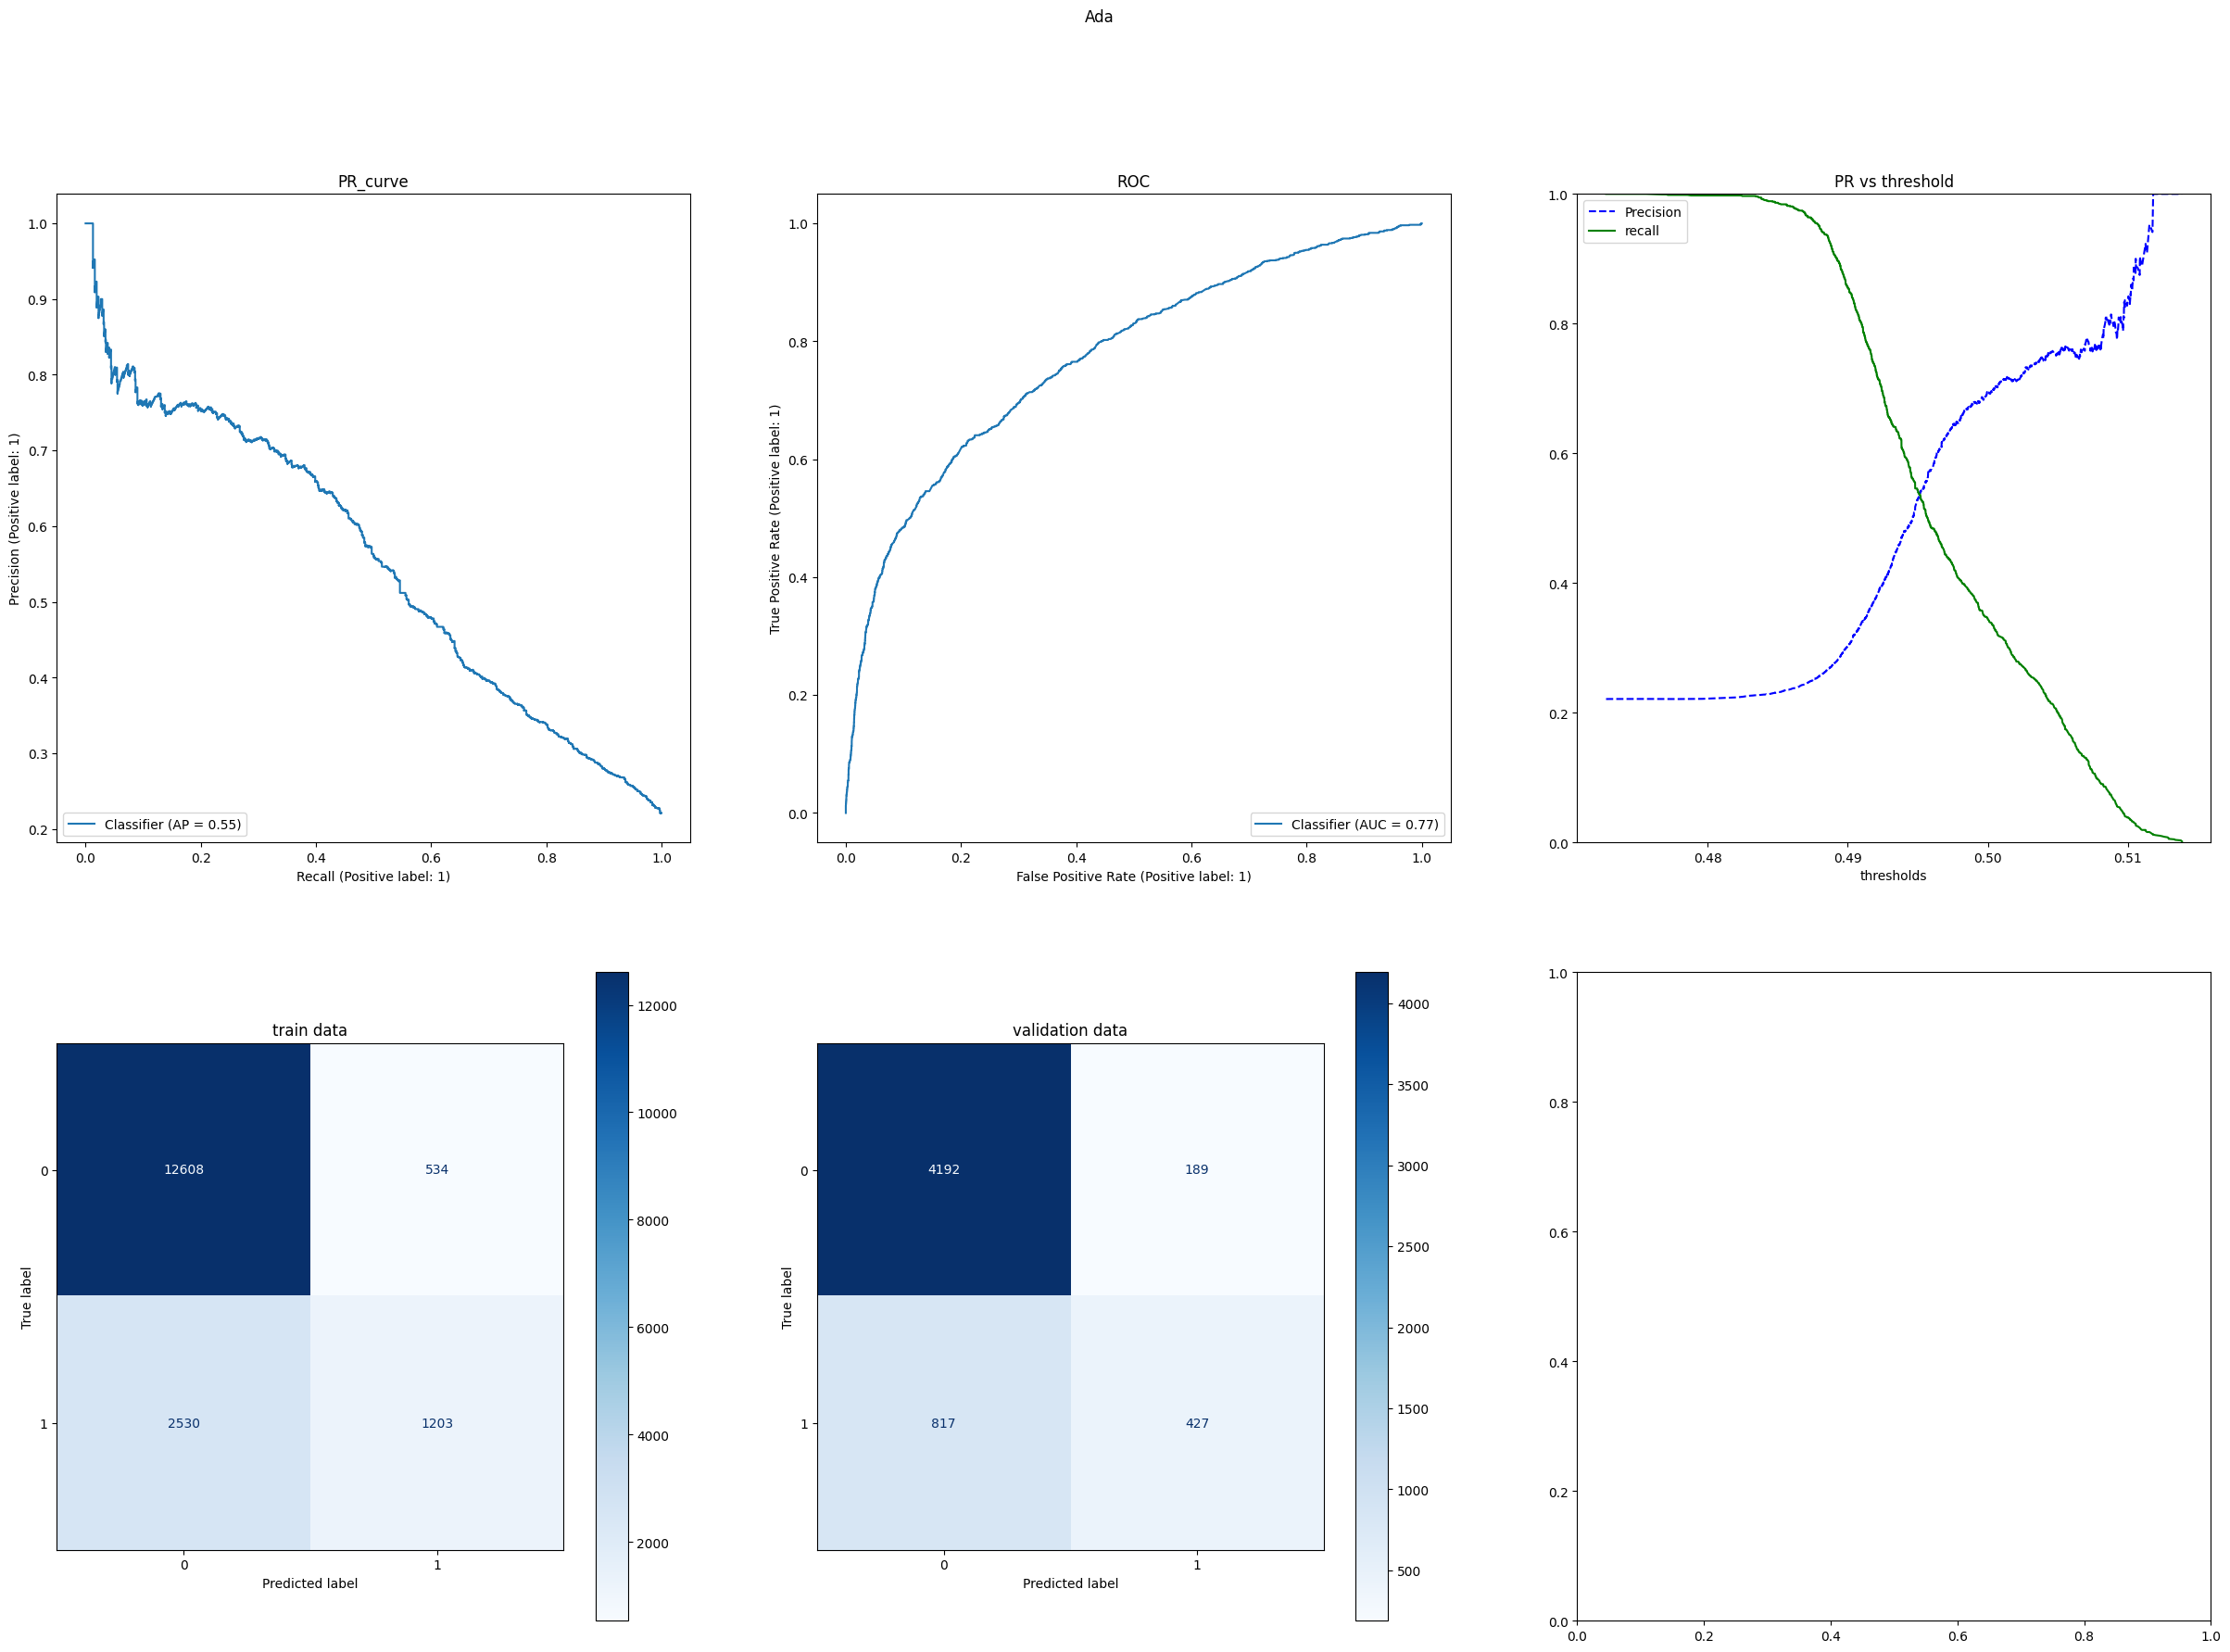

GdBoost
[[4162  219]
 [ 777  467]]

train scores
accuracy : 0.828562962962963
precision : 0.7091633466135459
recall : 0.3814626305920171
f1_score: 0.49608082215641874

Val scores
accuracy : 0.8229333333333333
precision : 0.6807580174927114
recall : 0.3754019292604502
f1_score: 0.4839378238341969


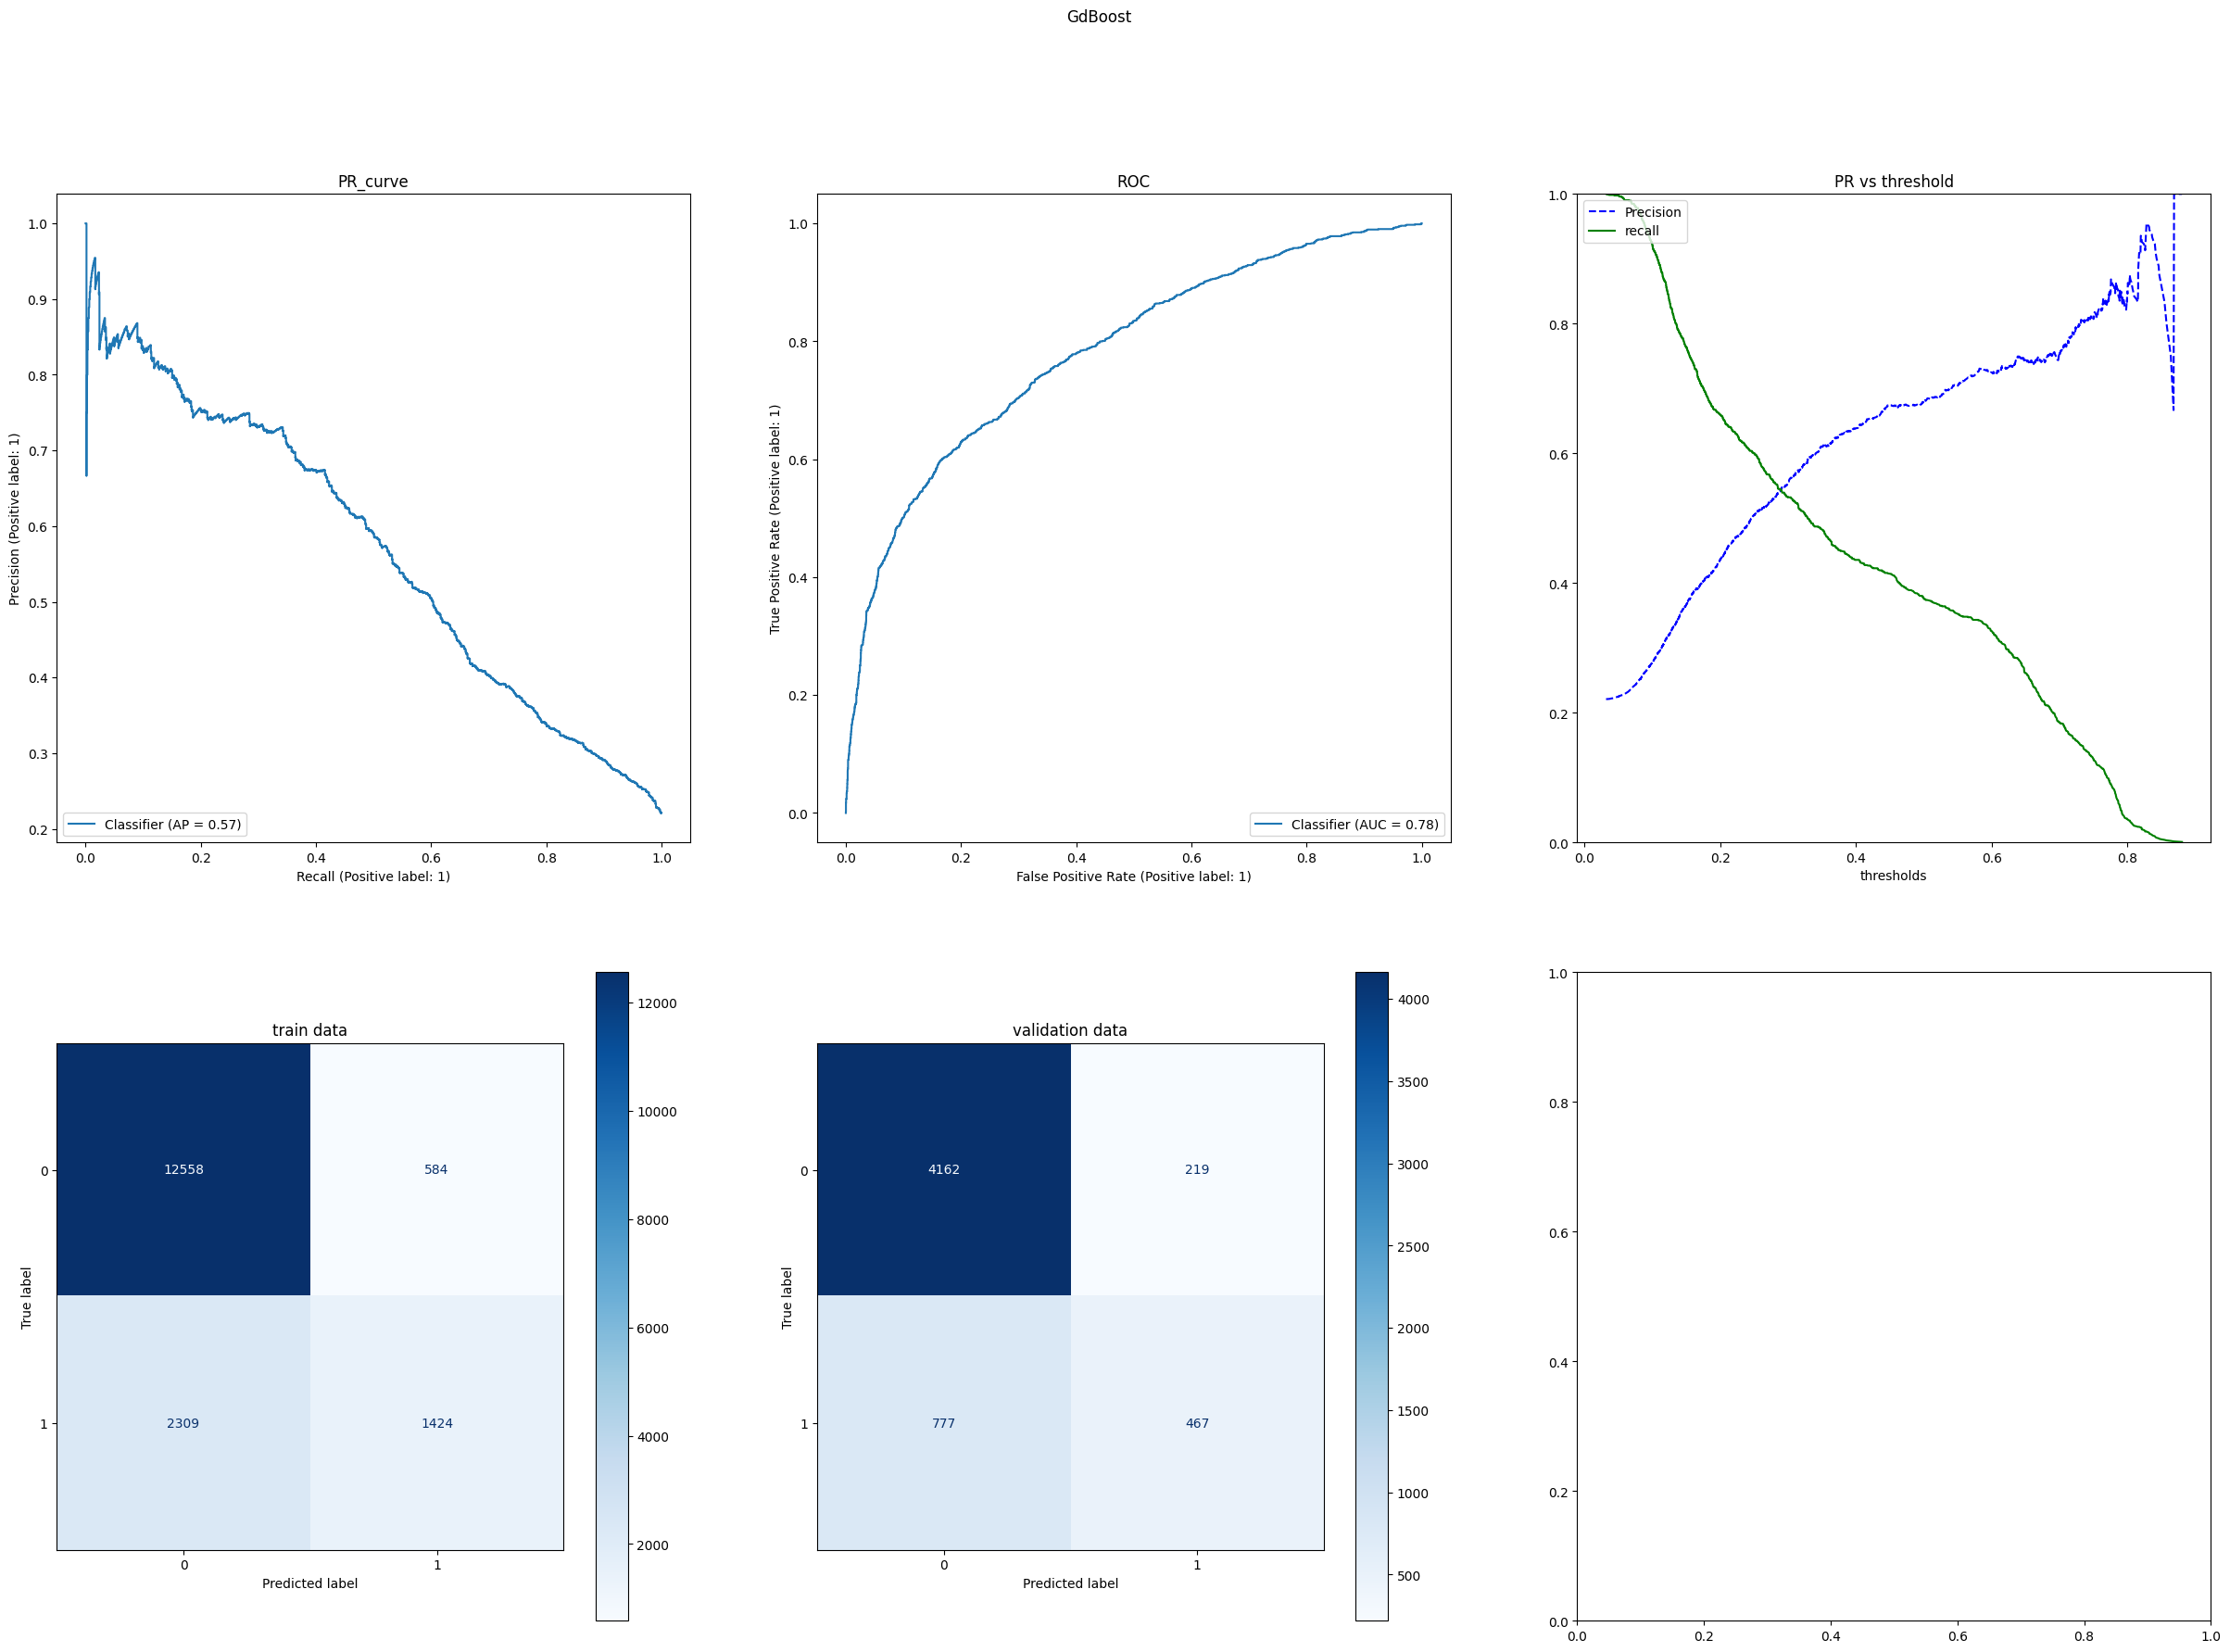

In [12]:
case_name ='raw,non_regul'
print(case_name)

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [13]:
case_name = 't_series,reg'
print(case_name)


t_series,reg


Tree
[[4183  198]
 [ 831  413]]

train scores
accuracy : 0.8251851851851851
precision : 0.7159404302261445
recall : 0.34770961693008307
f1_score: 0.46808510638297873

Val scores
accuracy : 0.8170666666666667
precision : 0.6759410801963993
recall : 0.3319935691318328
f1_score: 0.4452830188679245


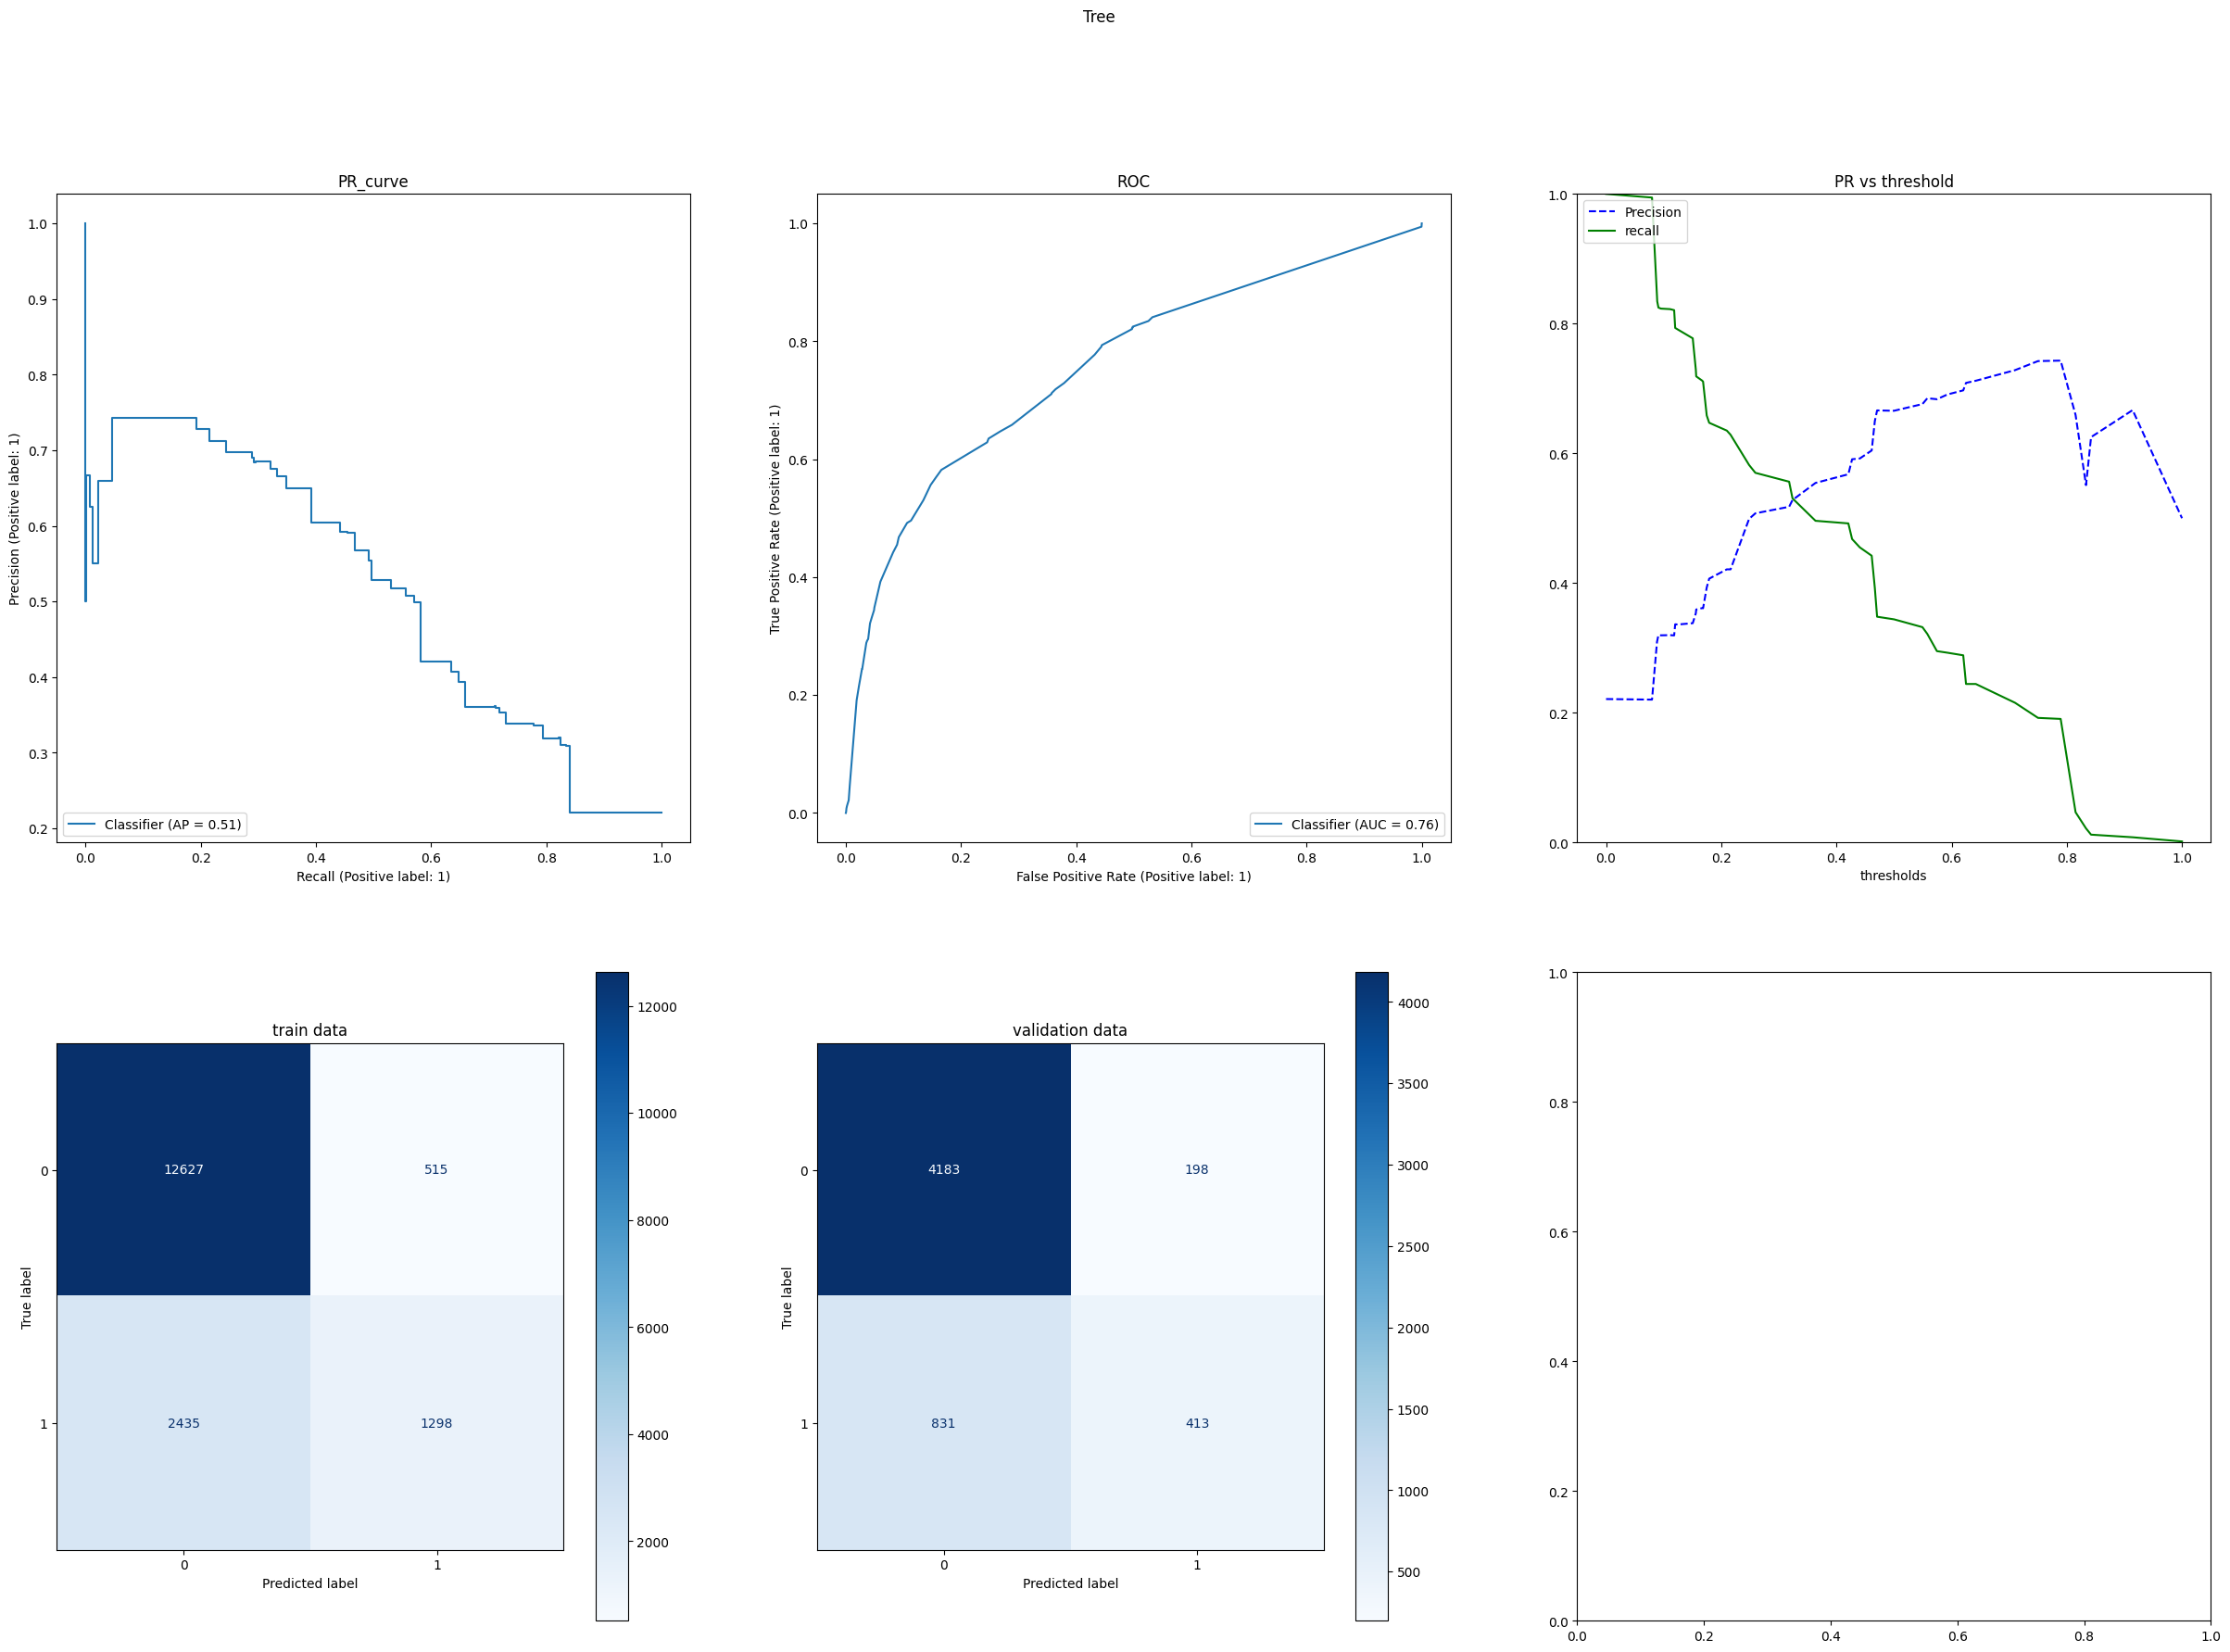

Forest
[[4174  207]
 [ 864  380]]

train scores
accuracy : 0.8183703703703704
precision : 0.6983372921615202
recall : 0.3150281275113849
f1_score: 0.4341886653129038

Val scores
accuracy : 0.8096
precision : 0.6473594548551959
recall : 0.3054662379421222
f1_score: 0.4150737302020754


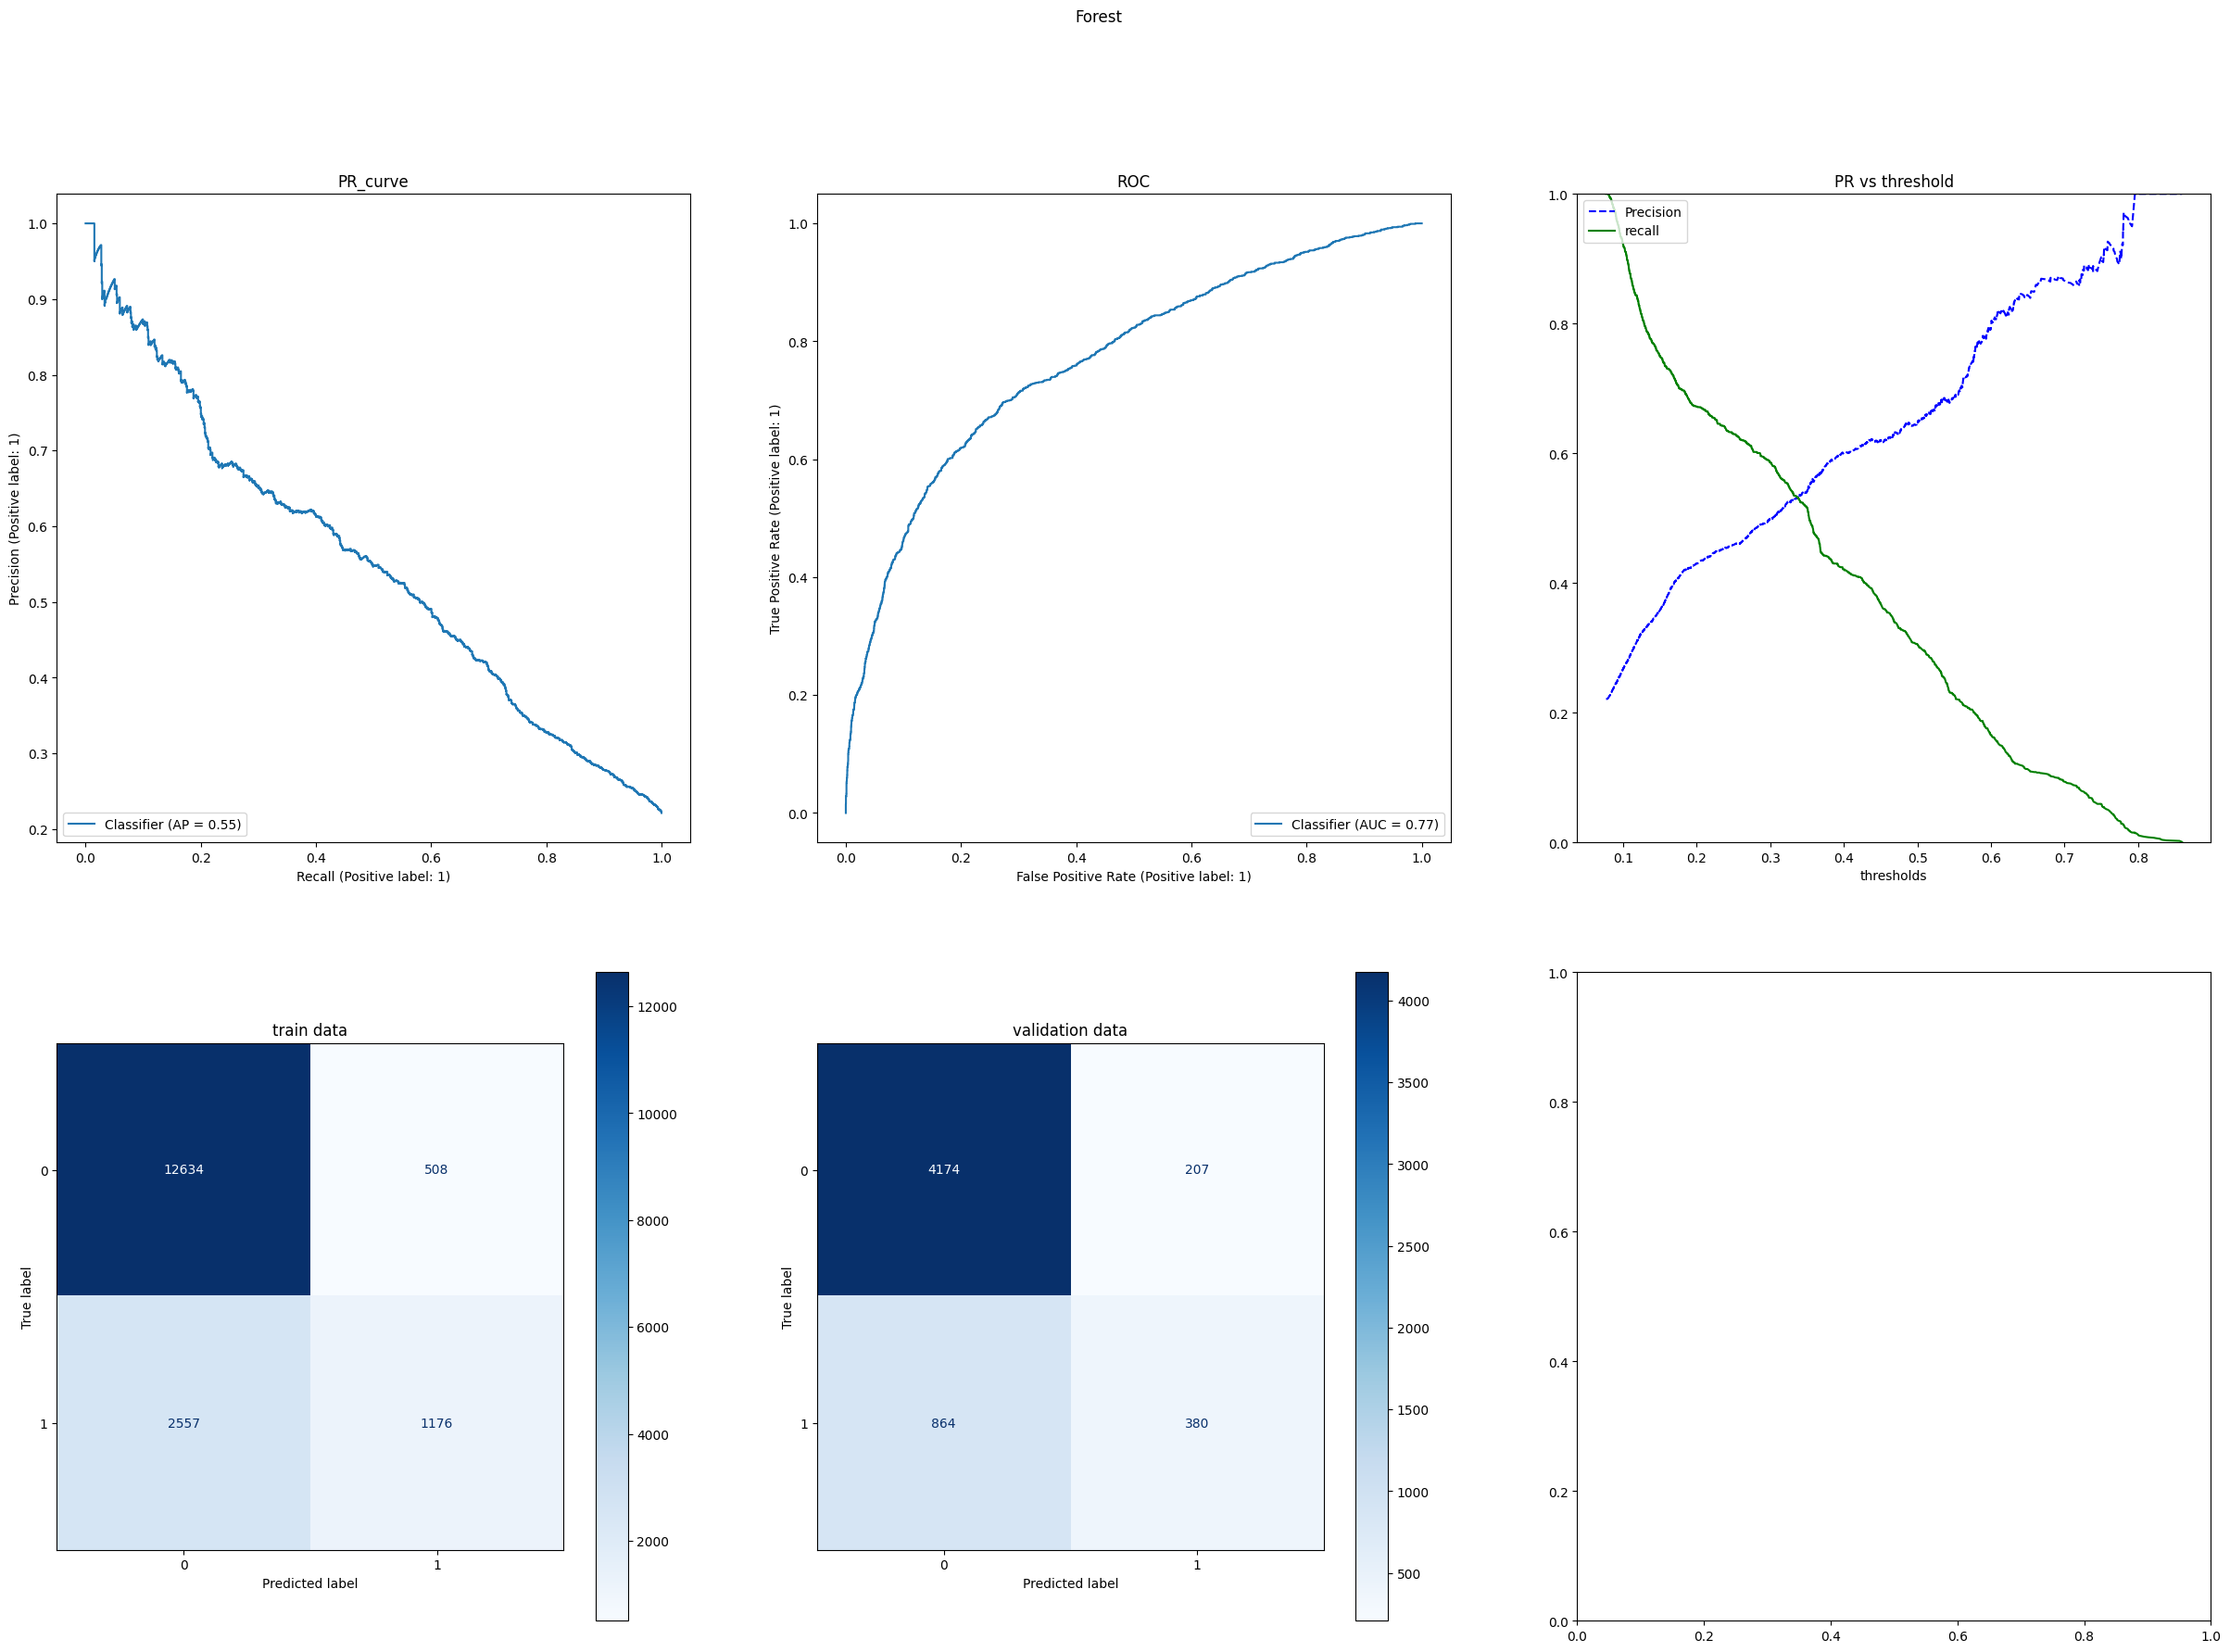

Ada
[[4178  203]
 [ 866  378]]

train scores
accuracy : 0.8108444444444445
precision : 0.6622675464907019
recall : 0.2957406911331369
f1_score: 0.40888888888888886

Val scores
accuracy : 0.8099555555555555
precision : 0.6506024096385542
recall : 0.30385852090032156
f1_score: 0.41424657534246573


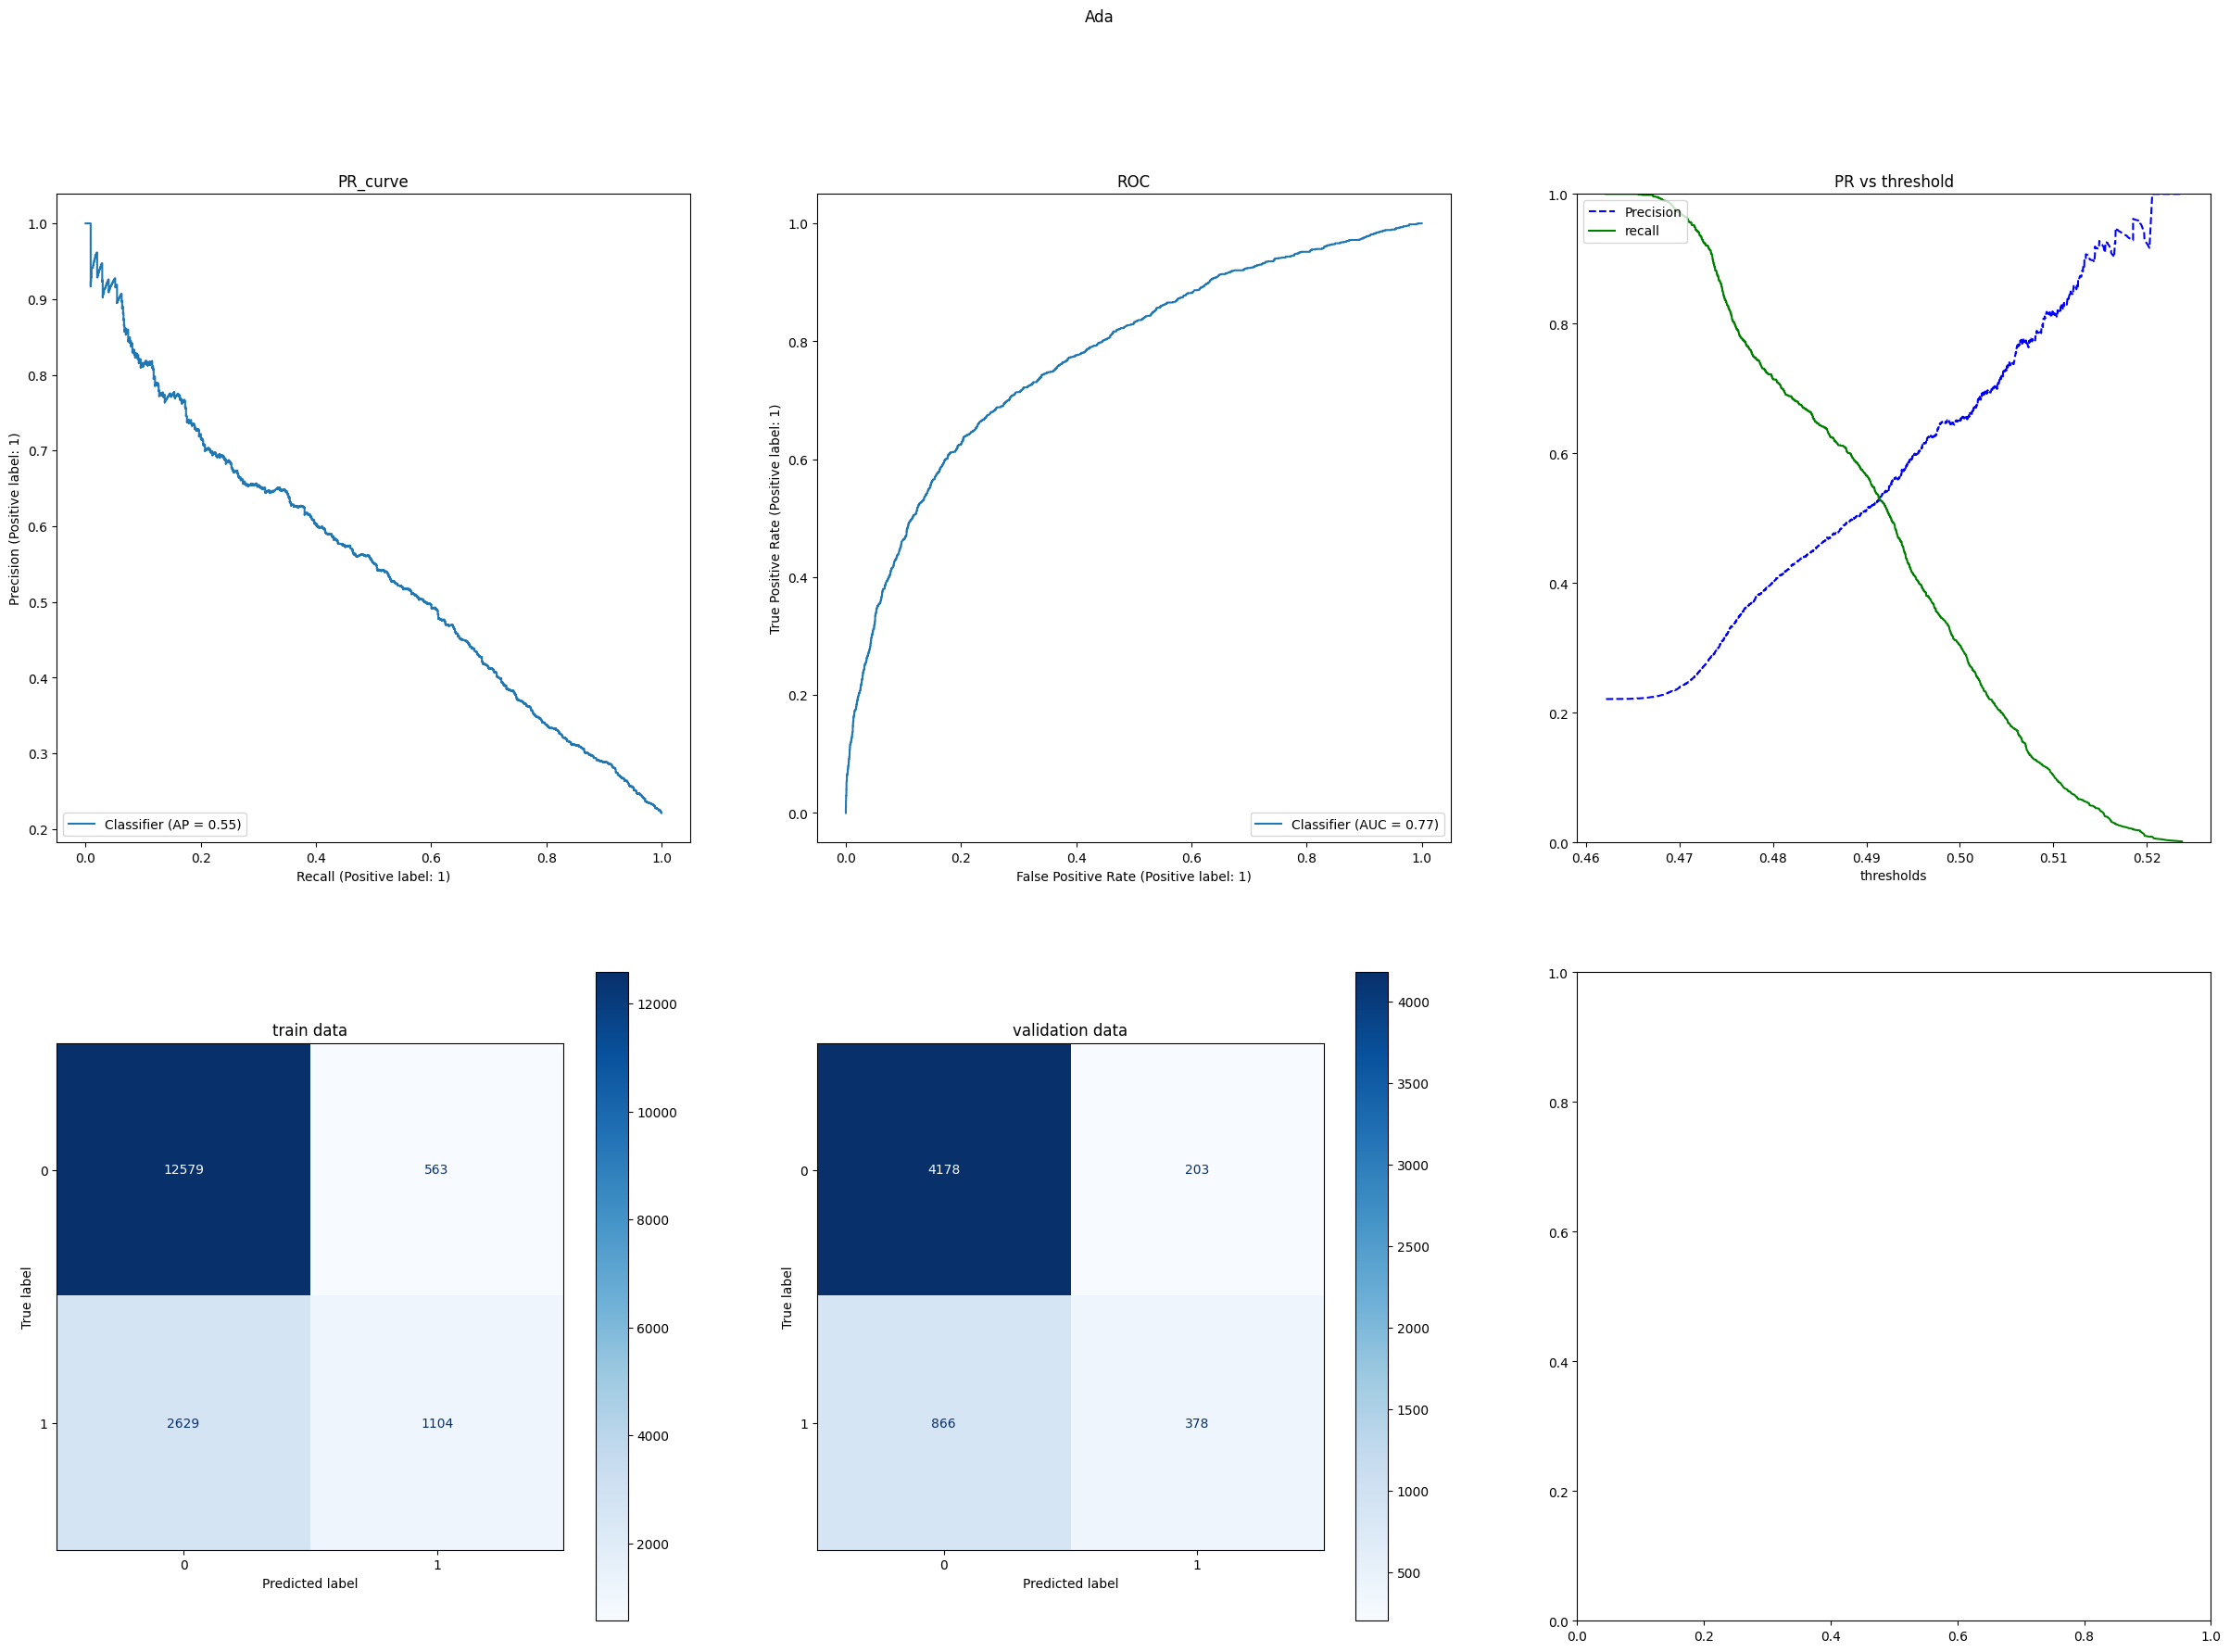

GdBoost
[[4210  171]
 [ 906  338]]

train scores
accuracy : 0.8084148148148148
precision : 0.6728907330567082
recall : 0.2606482721671578
f1_score: 0.3757482139409153

Val scores
accuracy : 0.8085333333333333
precision : 0.6640471512770137
recall : 0.2717041800643087
f1_score: 0.38562464346834


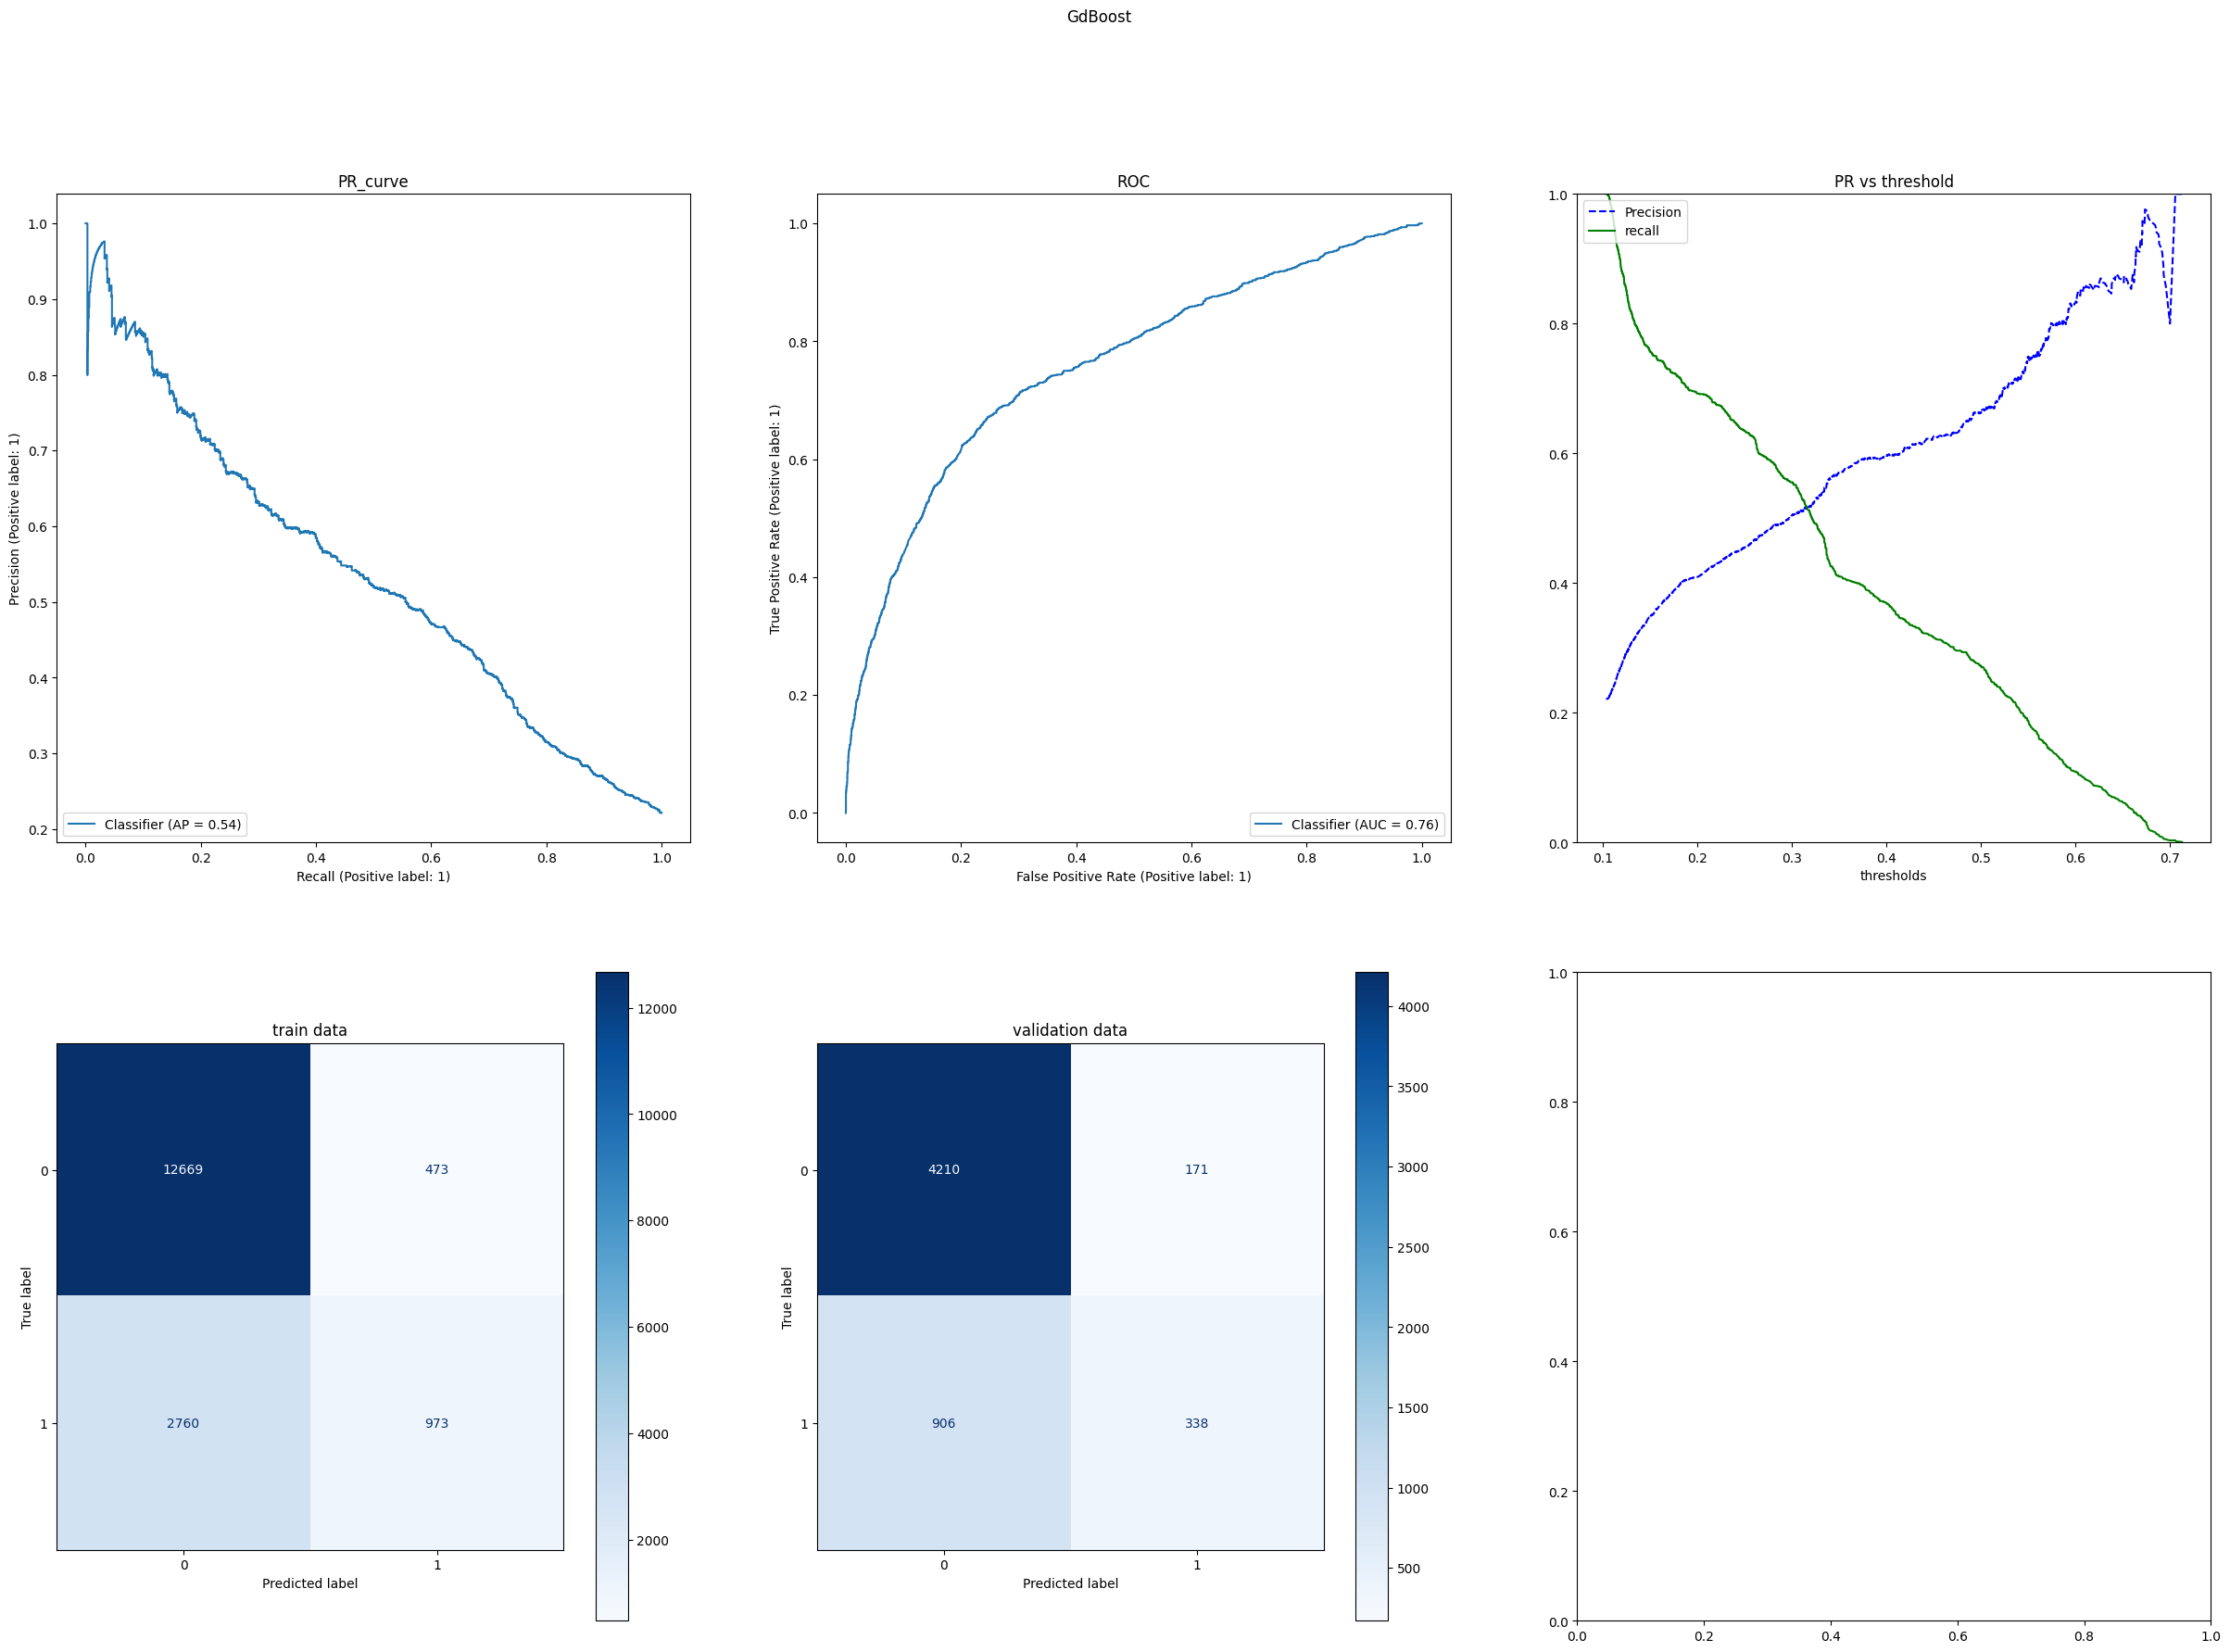

In [14]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [15]:
case_name ='raw,reg'

print(case_name)

raw,reg


Tree
[[4160  221]
 [ 781  463]]

train scores
accuracy : 0.8289777777777778
precision : 0.7120681021532298
recall : 0.38092686847039914
f1_score: 0.4963350785340313

Val scores
accuracy : 0.8218666666666666
precision : 0.6769005847953217
recall : 0.3721864951768489
f1_score: 0.4802904564315353


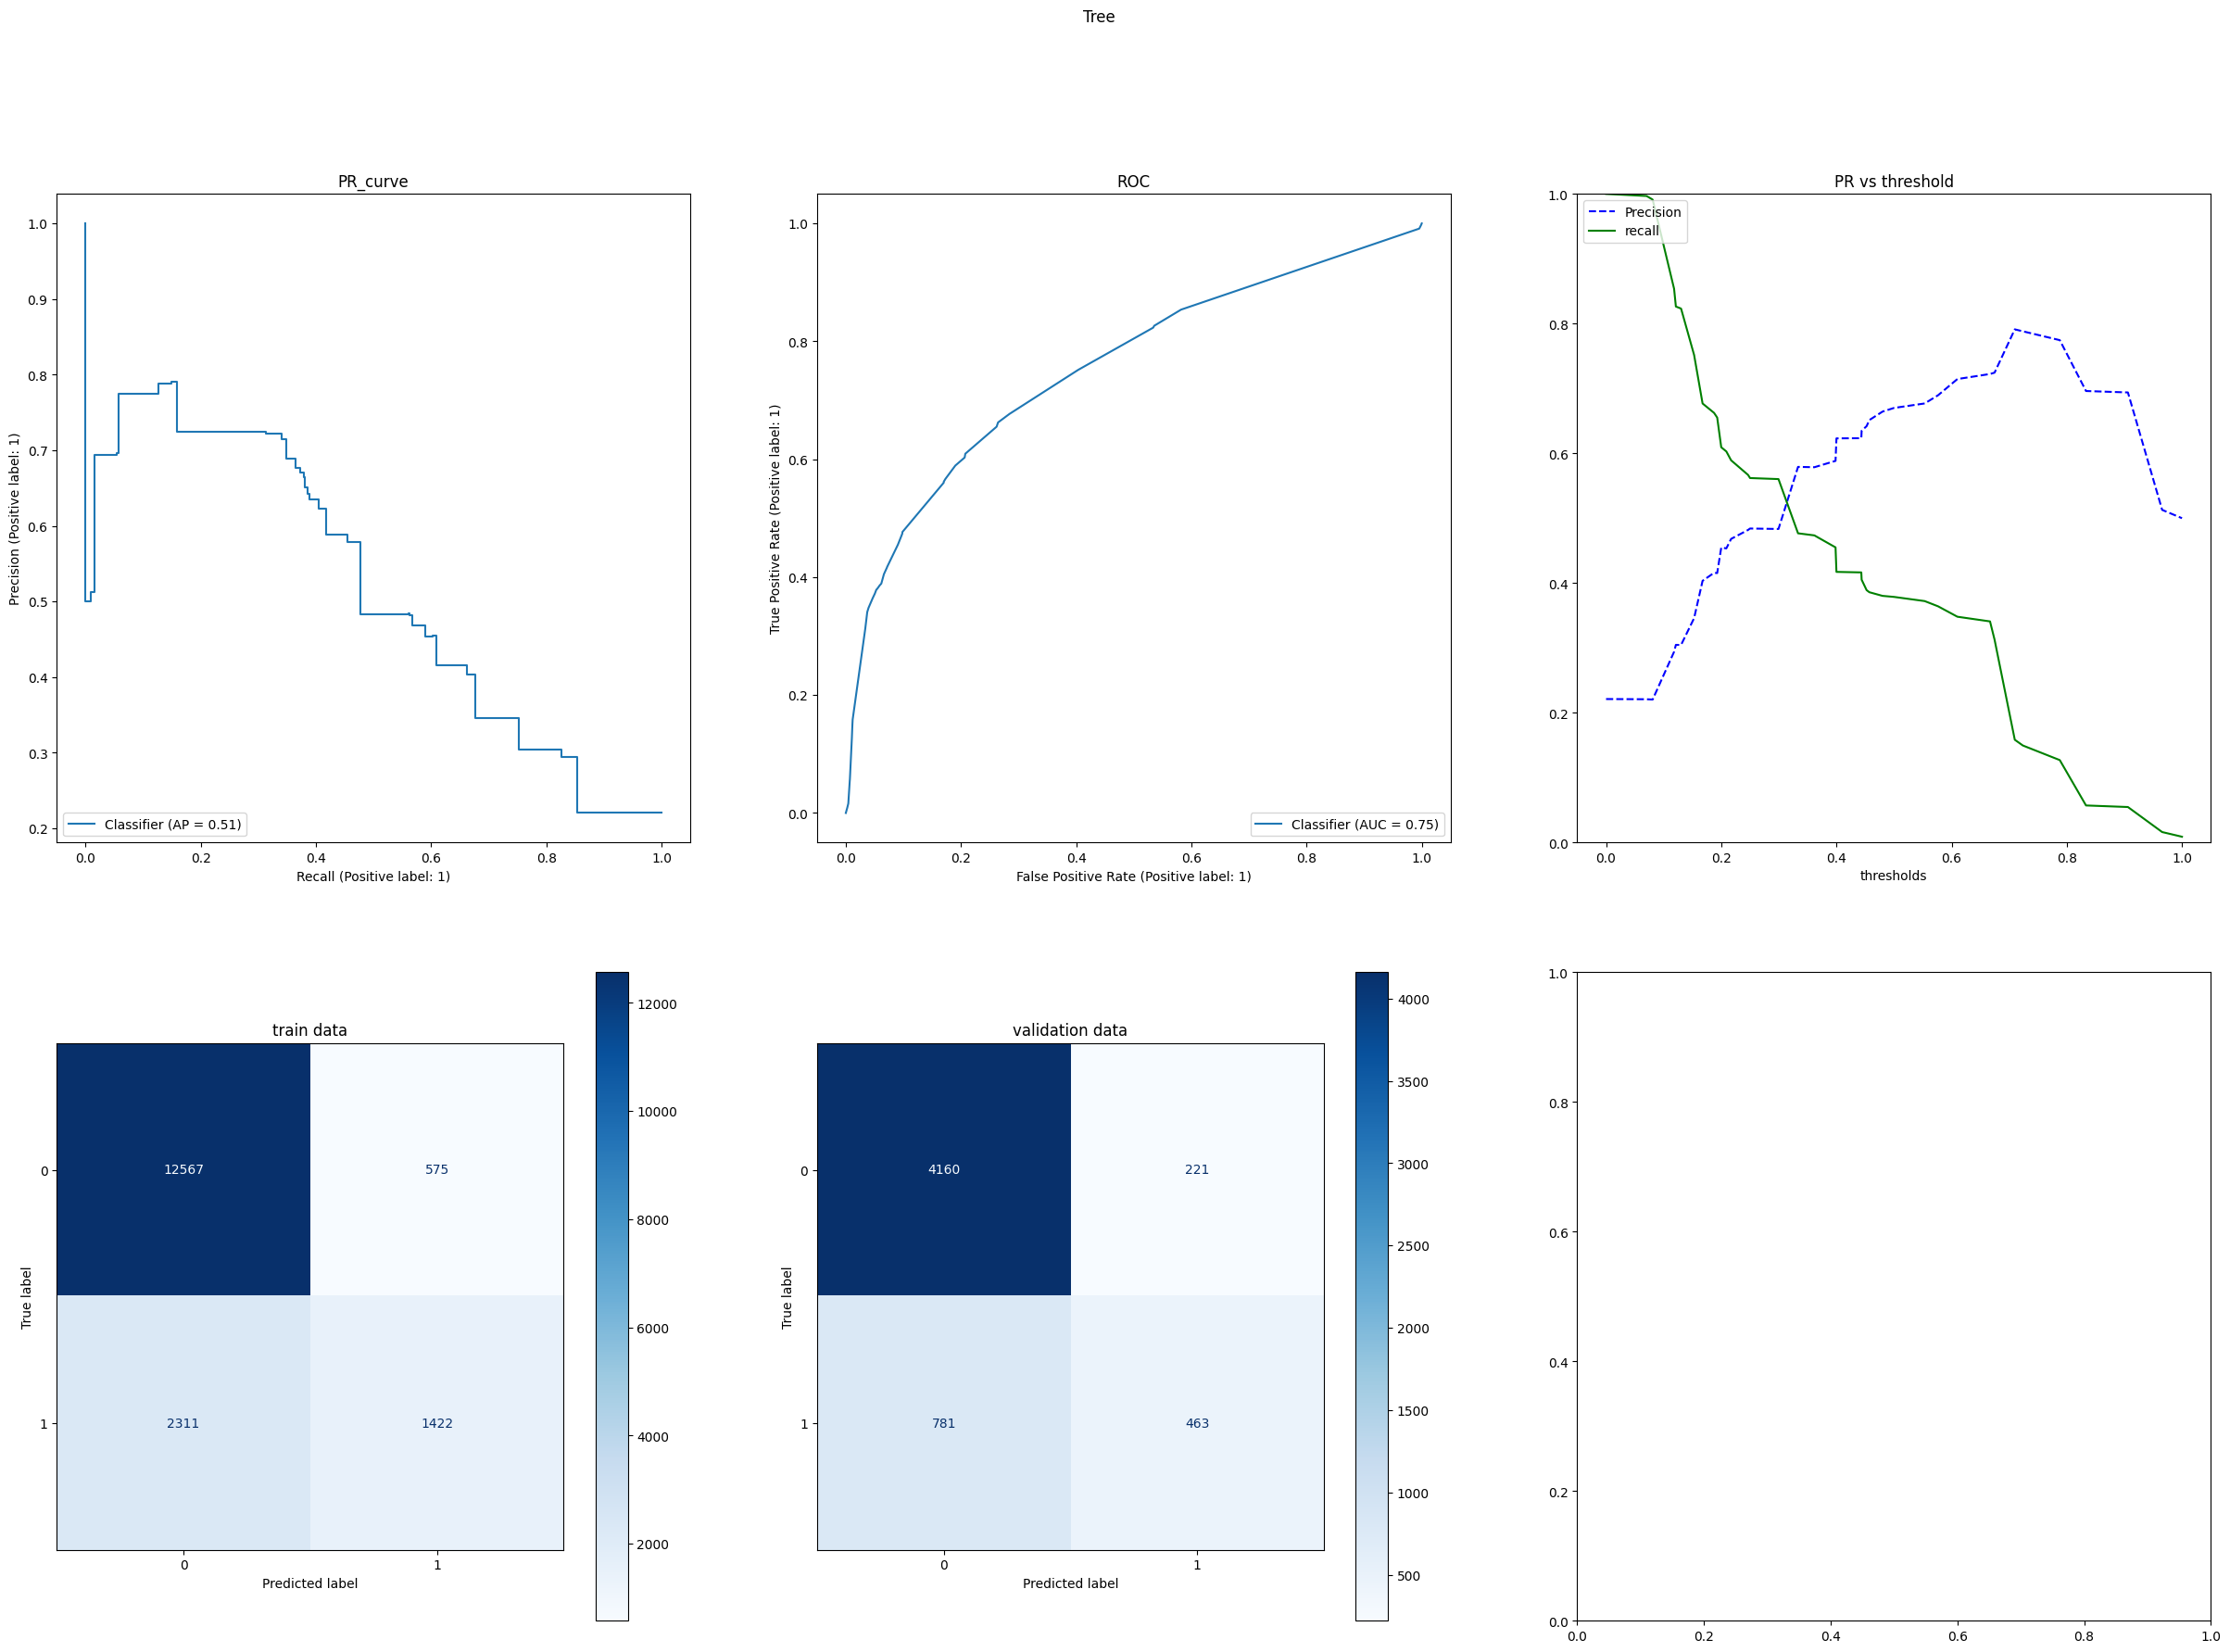

Forest
[[4205  176]
 [ 857  387]]

train scores
accuracy : 0.8250074074074074
precision : 0.7401477832512315
recall : 0.32199303509241894
f1_score: 0.44875863356356166

Val scores
accuracy : 0.8163555555555555
precision : 0.6873889875666075
recall : 0.31109324758842444
f1_score: 0.42833425567238514


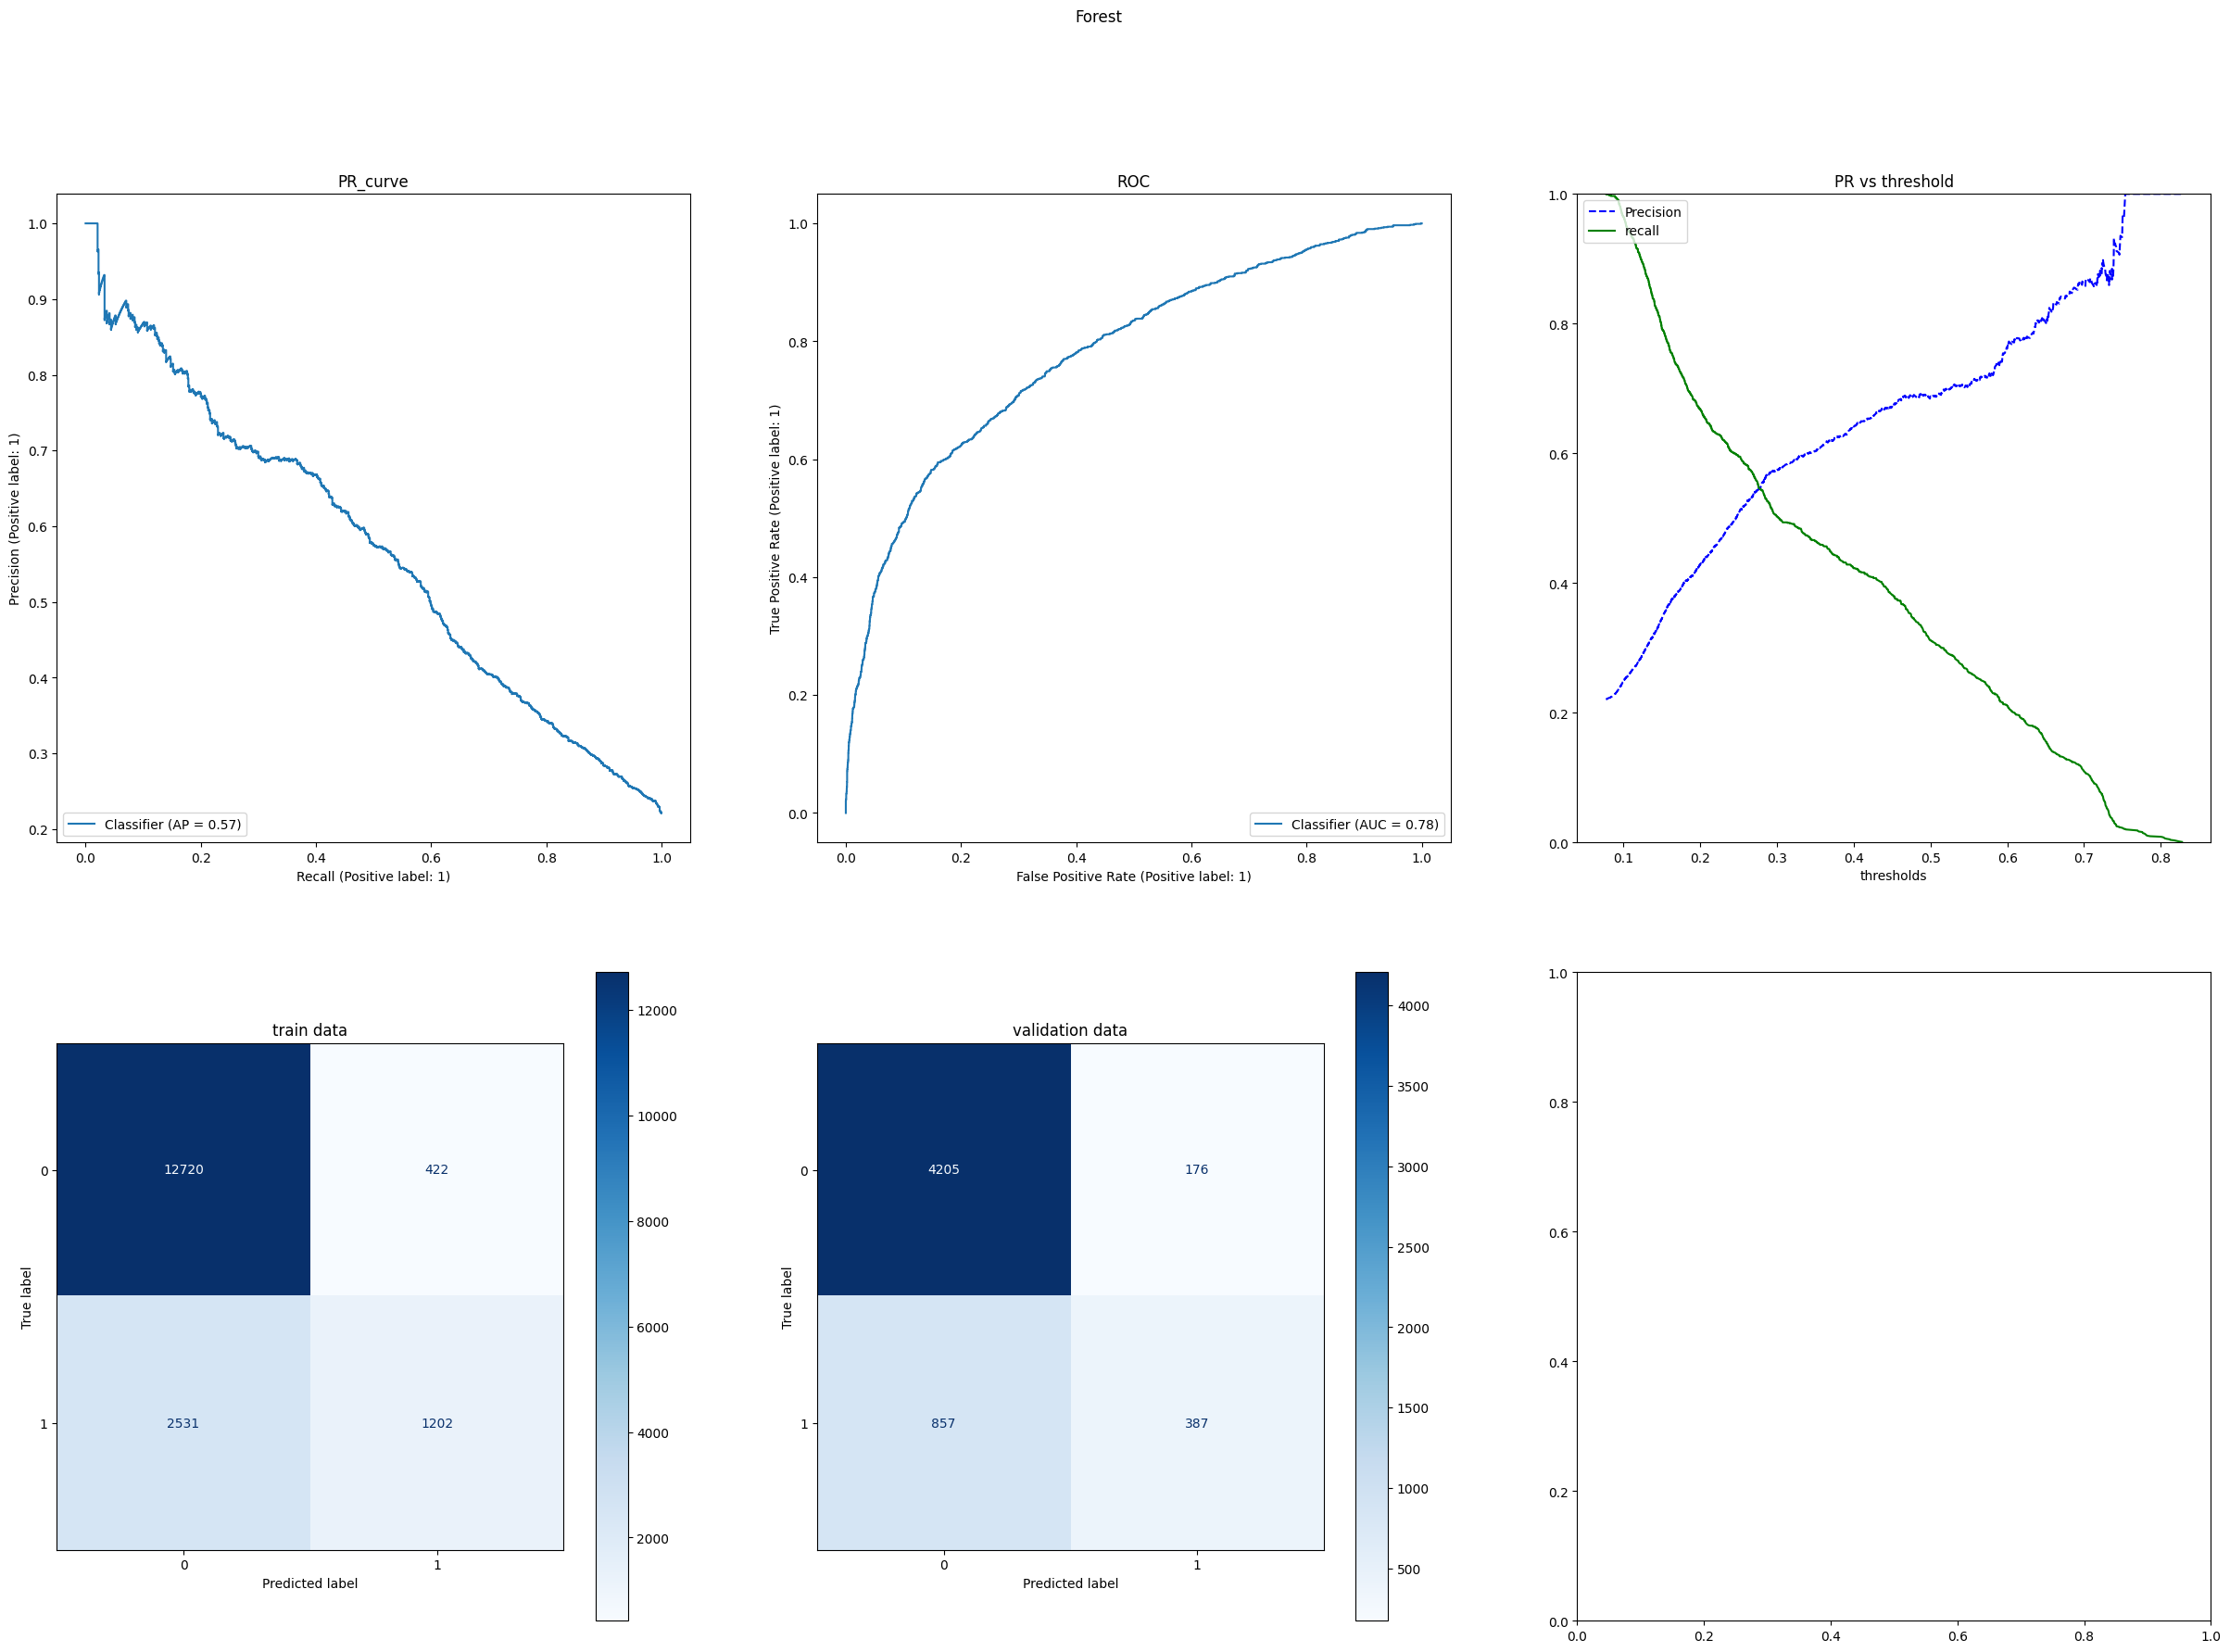

Ada
[[4203  178]
 [ 821  423]]

train scores
accuracy : 0.8181333333333334
precision : 0.688422247446084
recall : 0.324939726761318
f1_score: 0.44149226569608735

Val scores
accuracy : 0.8224
precision : 0.7038269550748752
recall : 0.340032154340836
f1_score: 0.4585365853658537


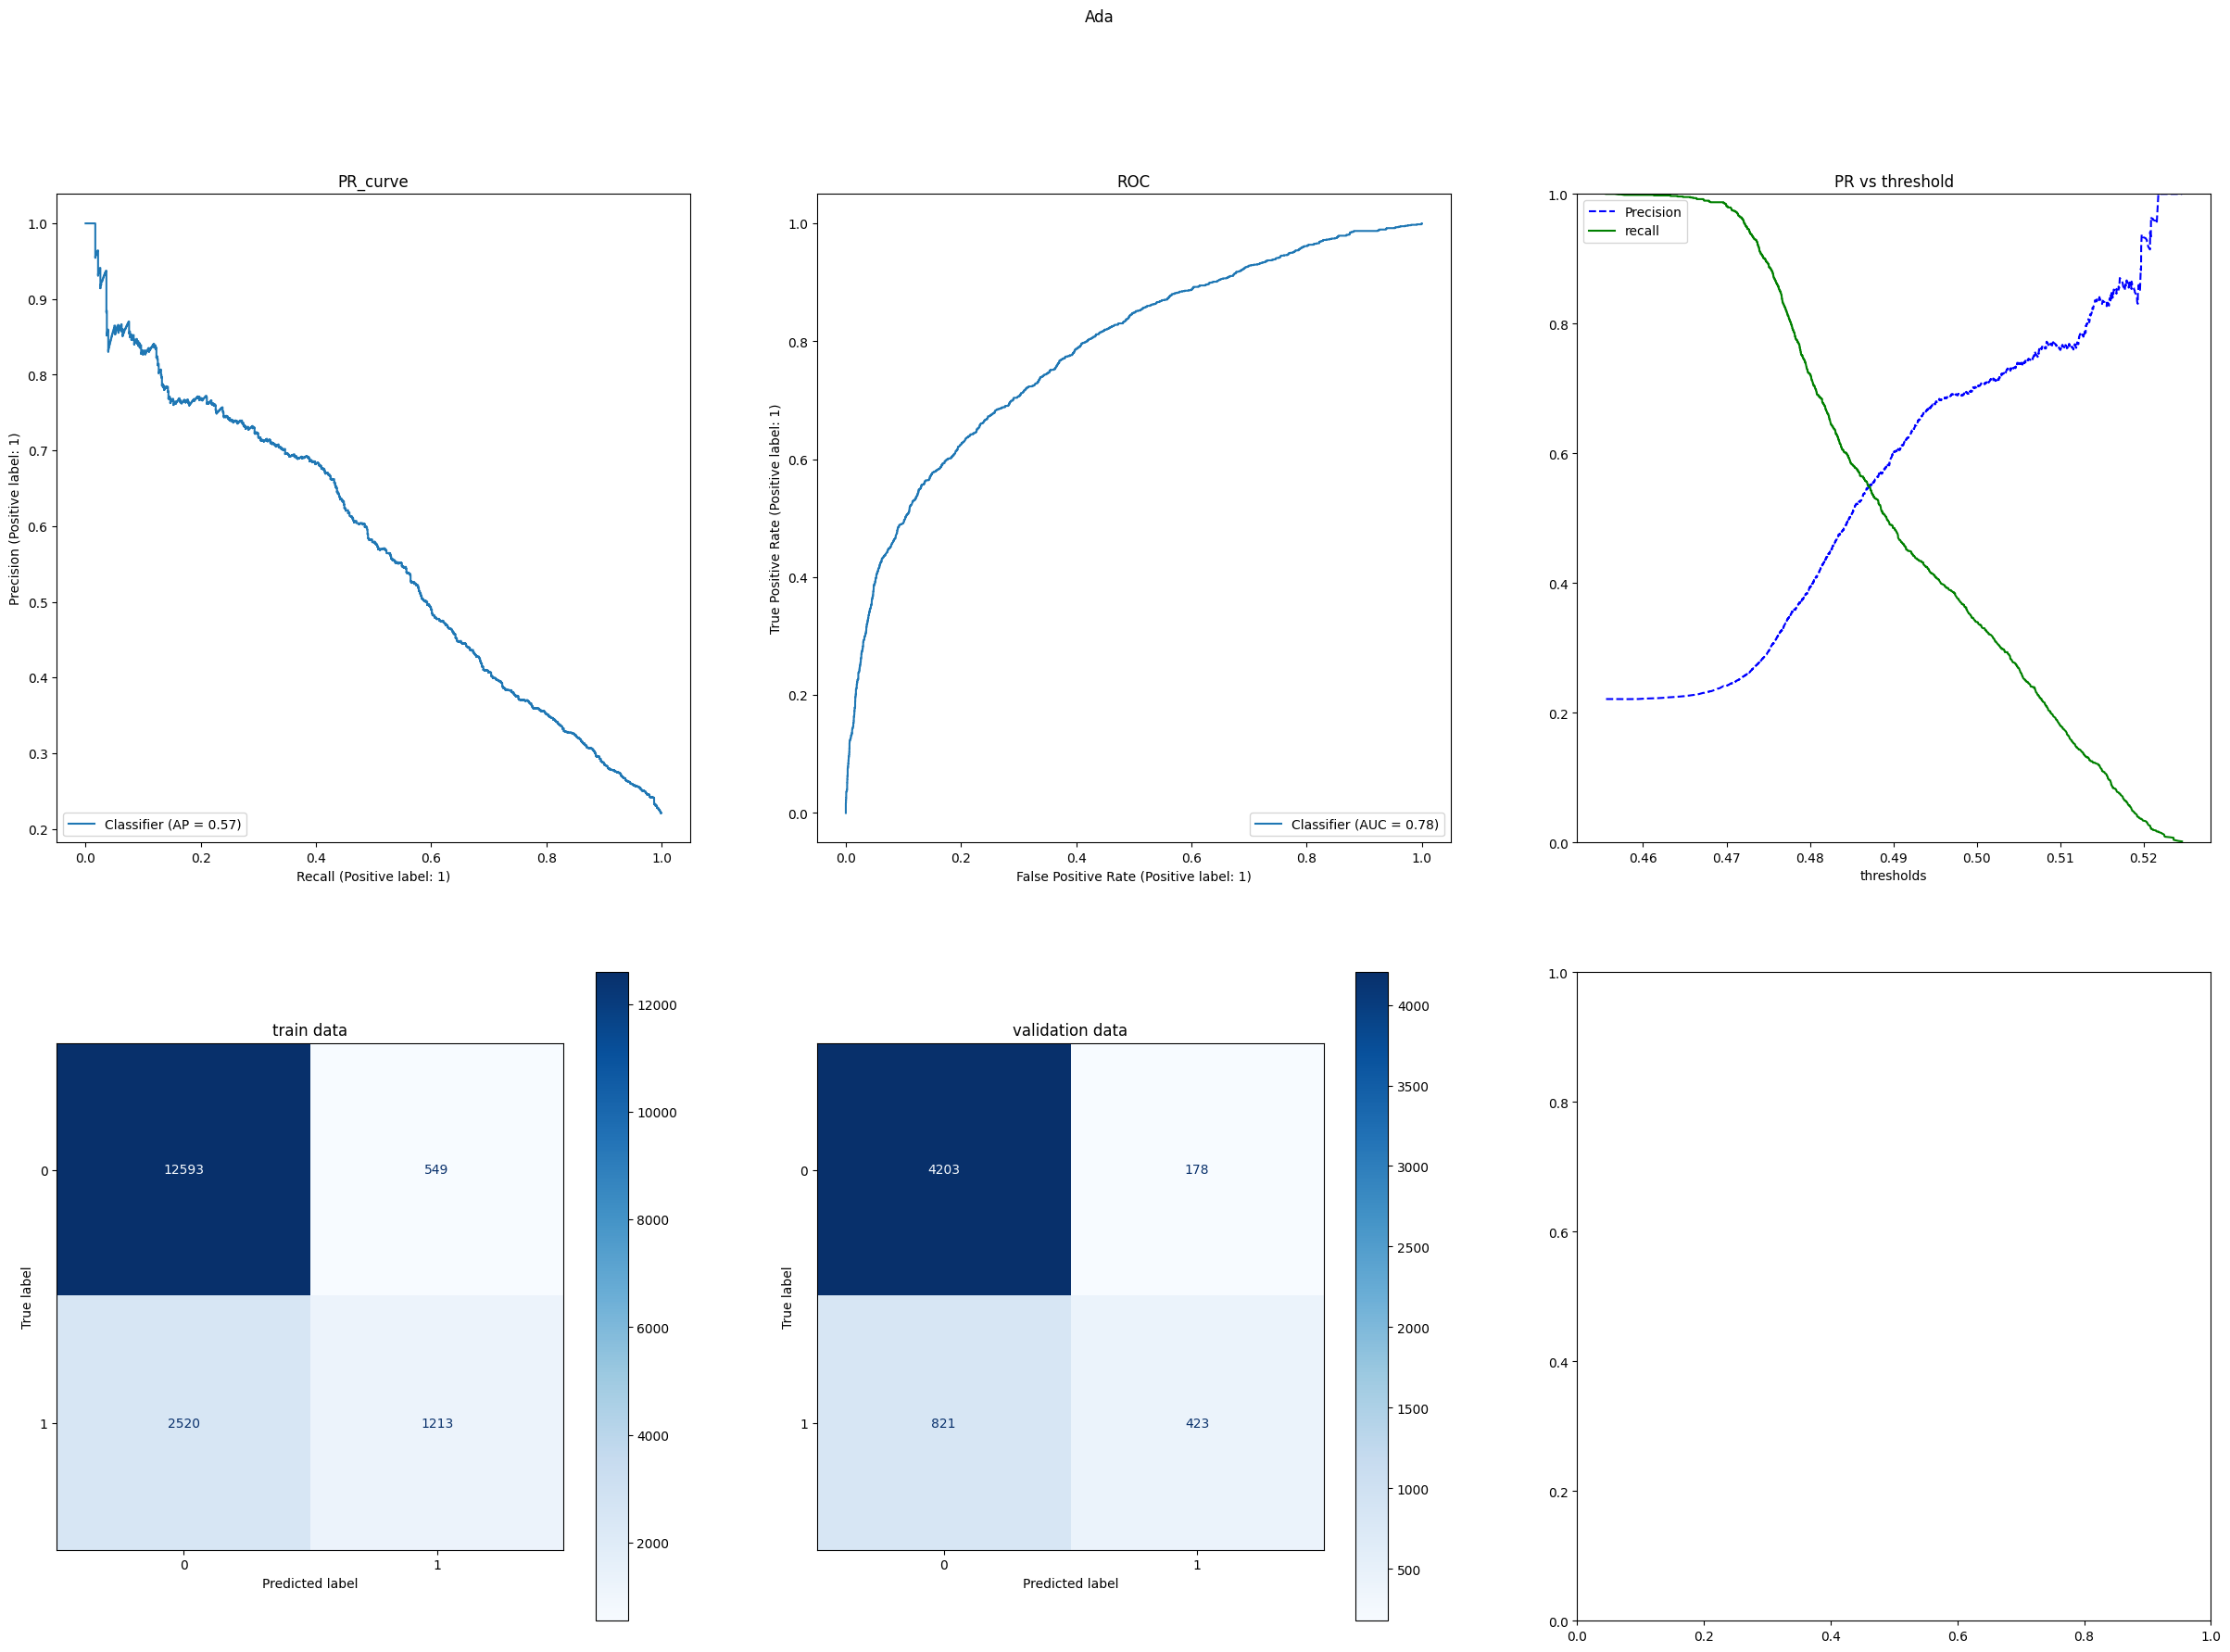

GdBoost
[[4233  148]
 [ 904  340]]

train scores
accuracy : 0.8137481481481481
precision : 0.7113180515759312
recall : 0.2660058933833378
f1_score: 0.3872099824527198

Val scores
accuracy : 0.8129777777777778
precision : 0.6967213114754098
recall : 0.2733118971061093
f1_score: 0.3926096997690531


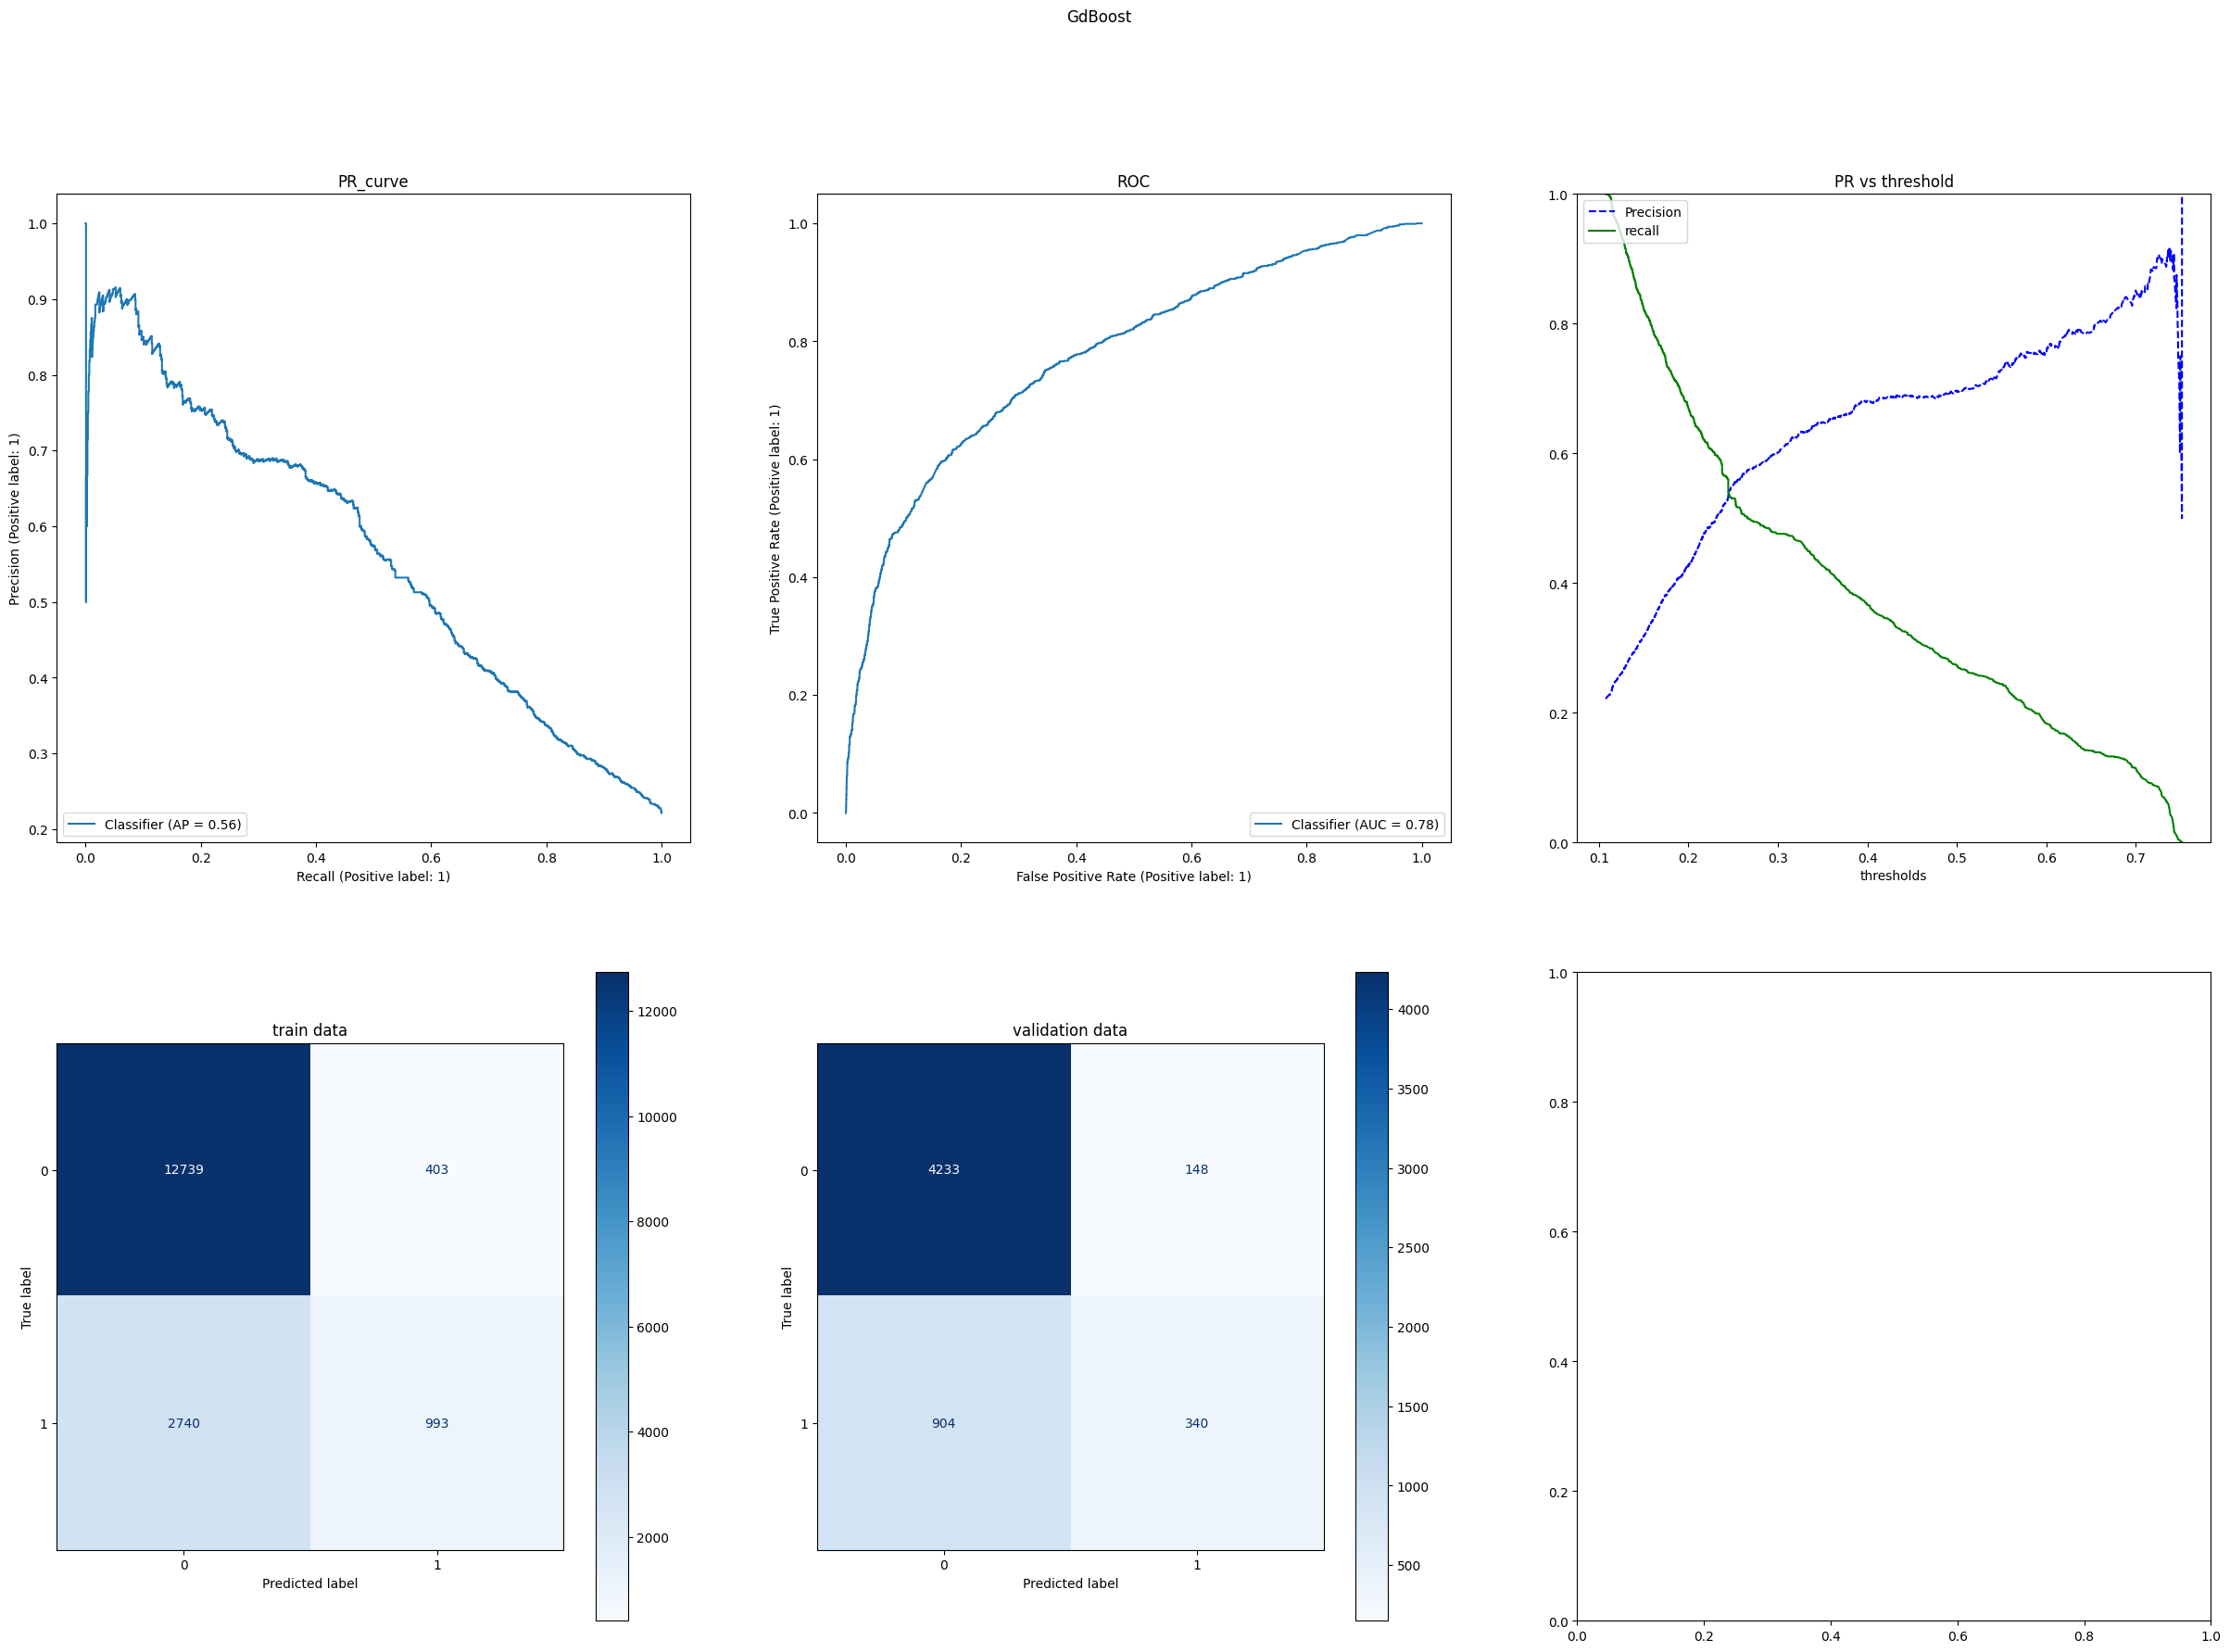

In [16]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [17]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[USAGE,DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,])
my_elementary_trans_5 = ElementaryExtractor([USAGE,DIFF])


extractors = [NonTsPass(),
               length_5_bop,
                length_6_bop,
                my_elementary_trans_5,
                my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor
A = my_base_transform.fit_transform(X_train)

In [18]:
case_name = 'non_log,raw,reg'

print(case_name)

non_log,raw,reg


Tree
[[4160  221]
 [ 781  463]]

train scores
accuracy : 0.8289777777777778
precision : 0.7120681021532298
recall : 0.38092686847039914
f1_score: 0.4963350785340313

Val scores
accuracy : 0.8218666666666666
precision : 0.6769005847953217
recall : 0.3721864951768489
f1_score: 0.4802904564315353


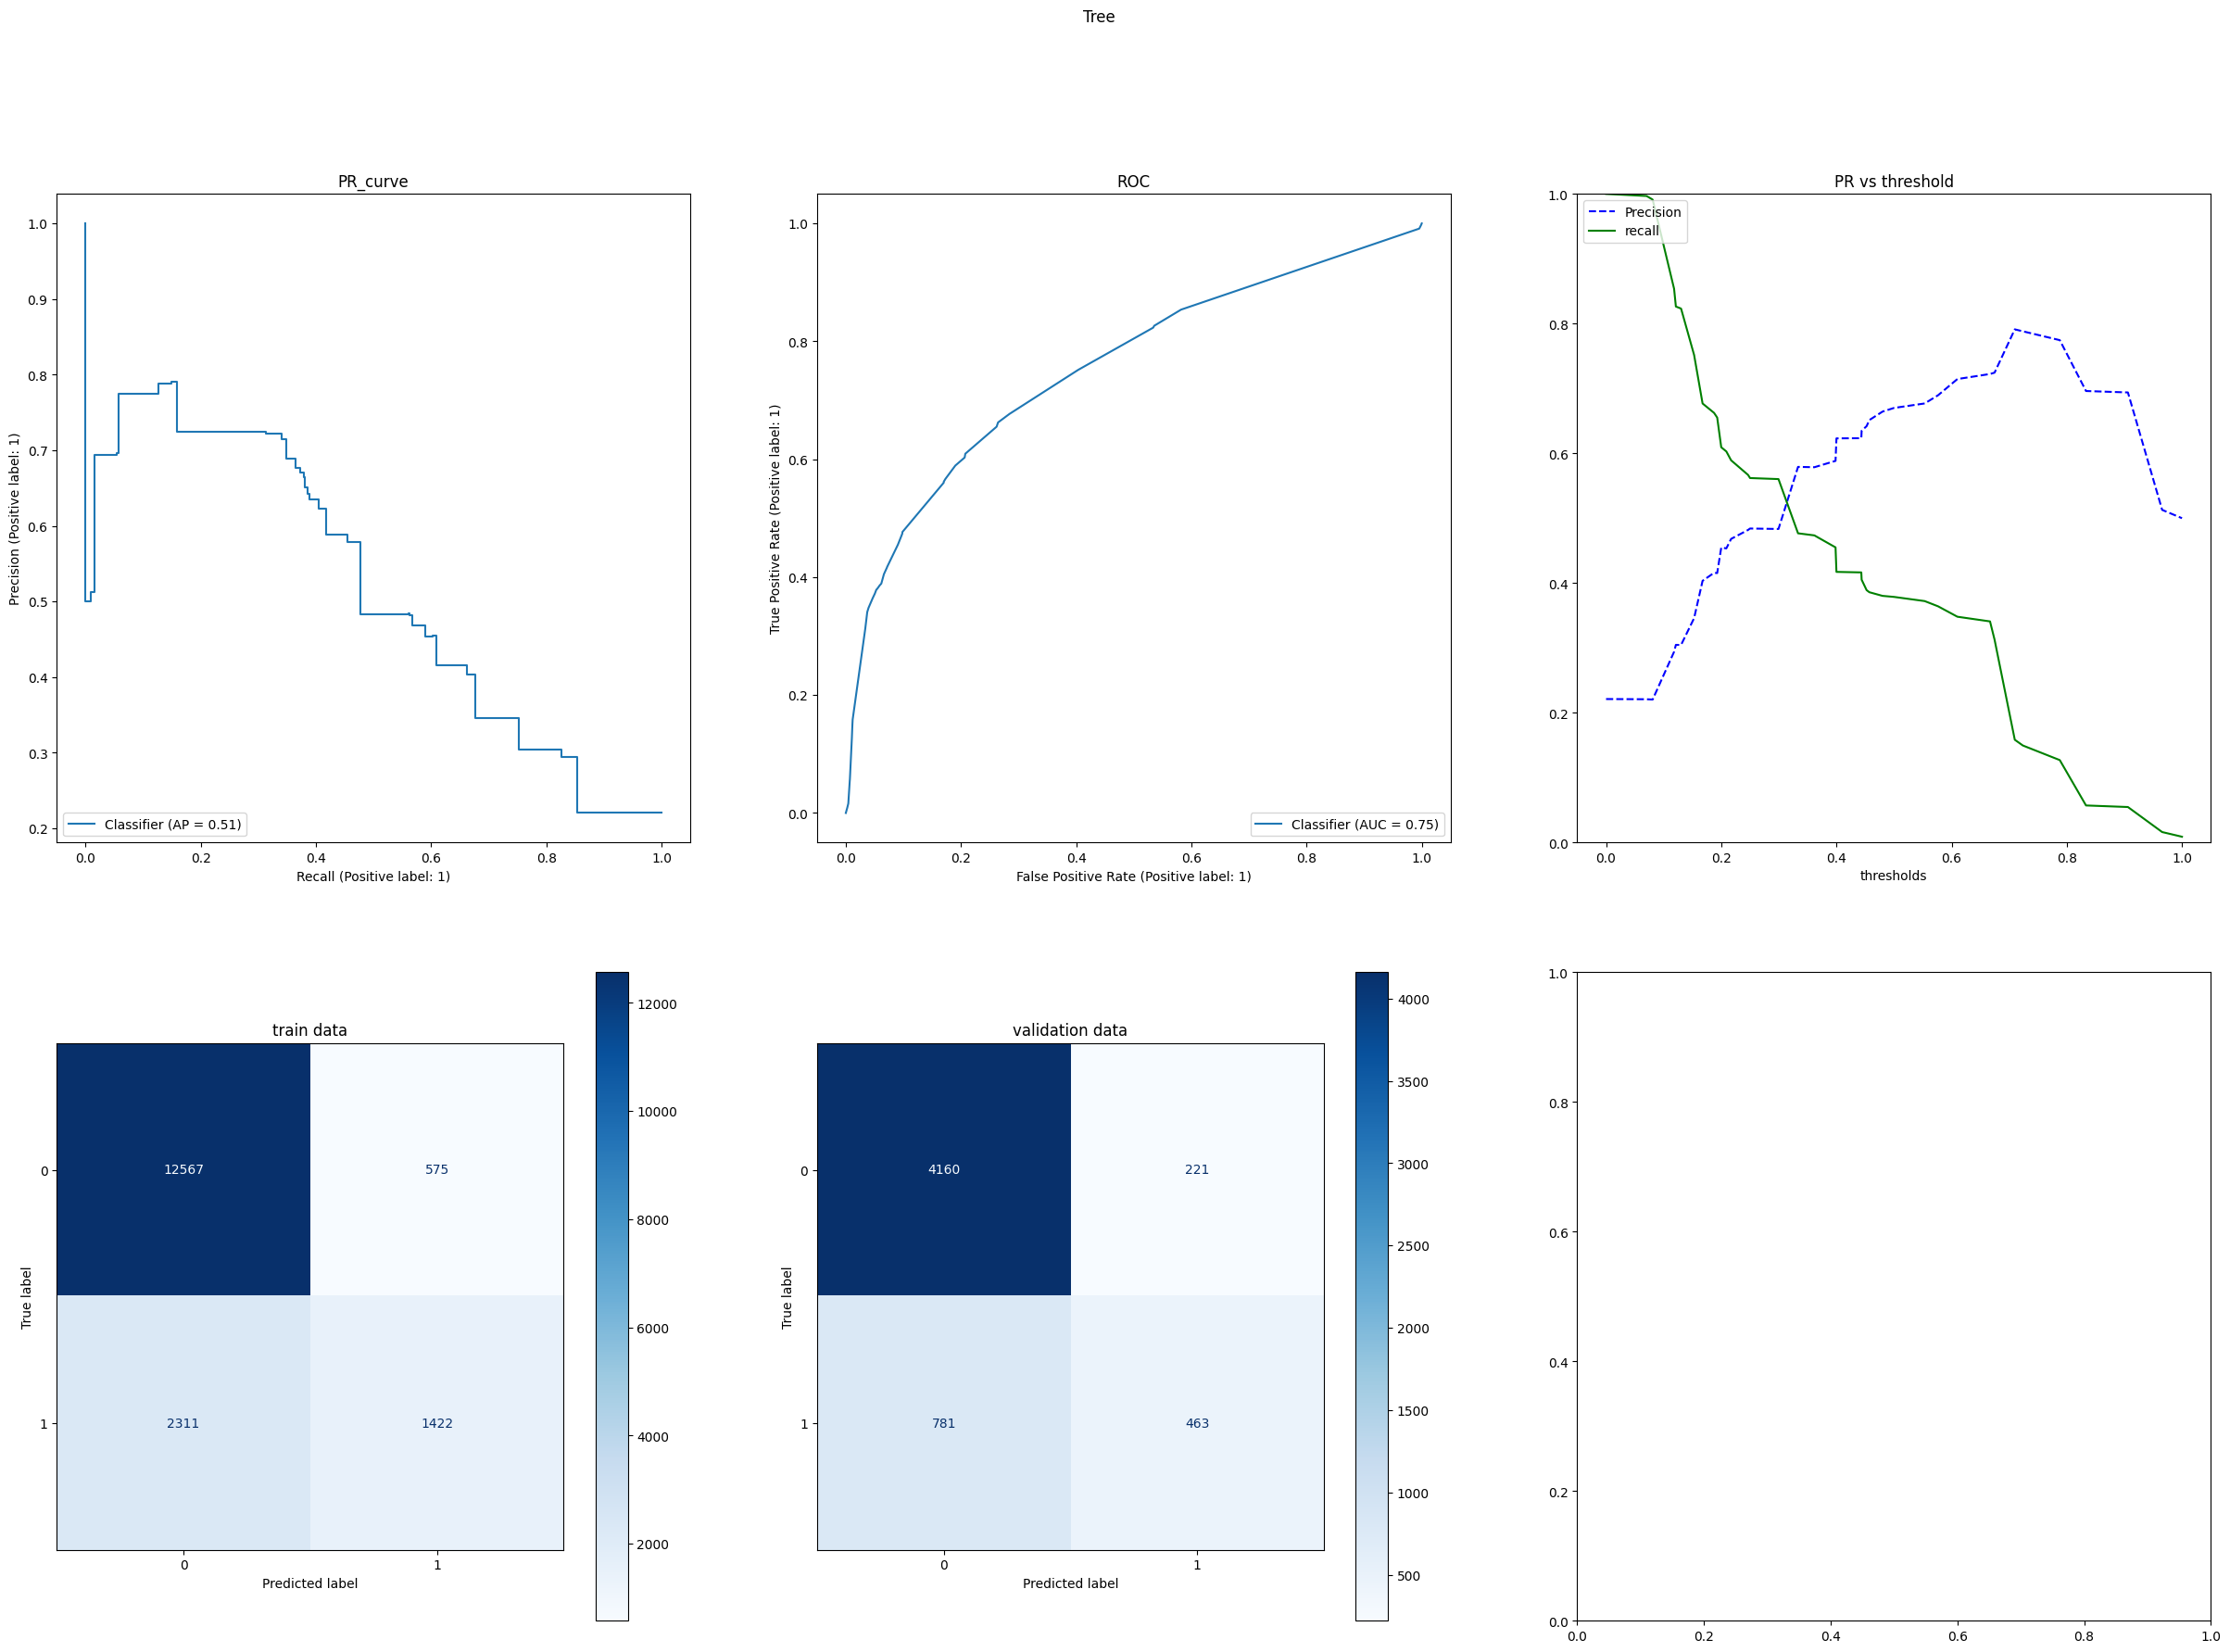

Forest
[[4205  176]
 [ 857  387]]

train scores
accuracy : 0.8250074074074074
precision : 0.7401477832512315
recall : 0.32199303509241894
f1_score: 0.44875863356356166

Val scores
accuracy : 0.8163555555555555
precision : 0.6873889875666075
recall : 0.31109324758842444
f1_score: 0.42833425567238514


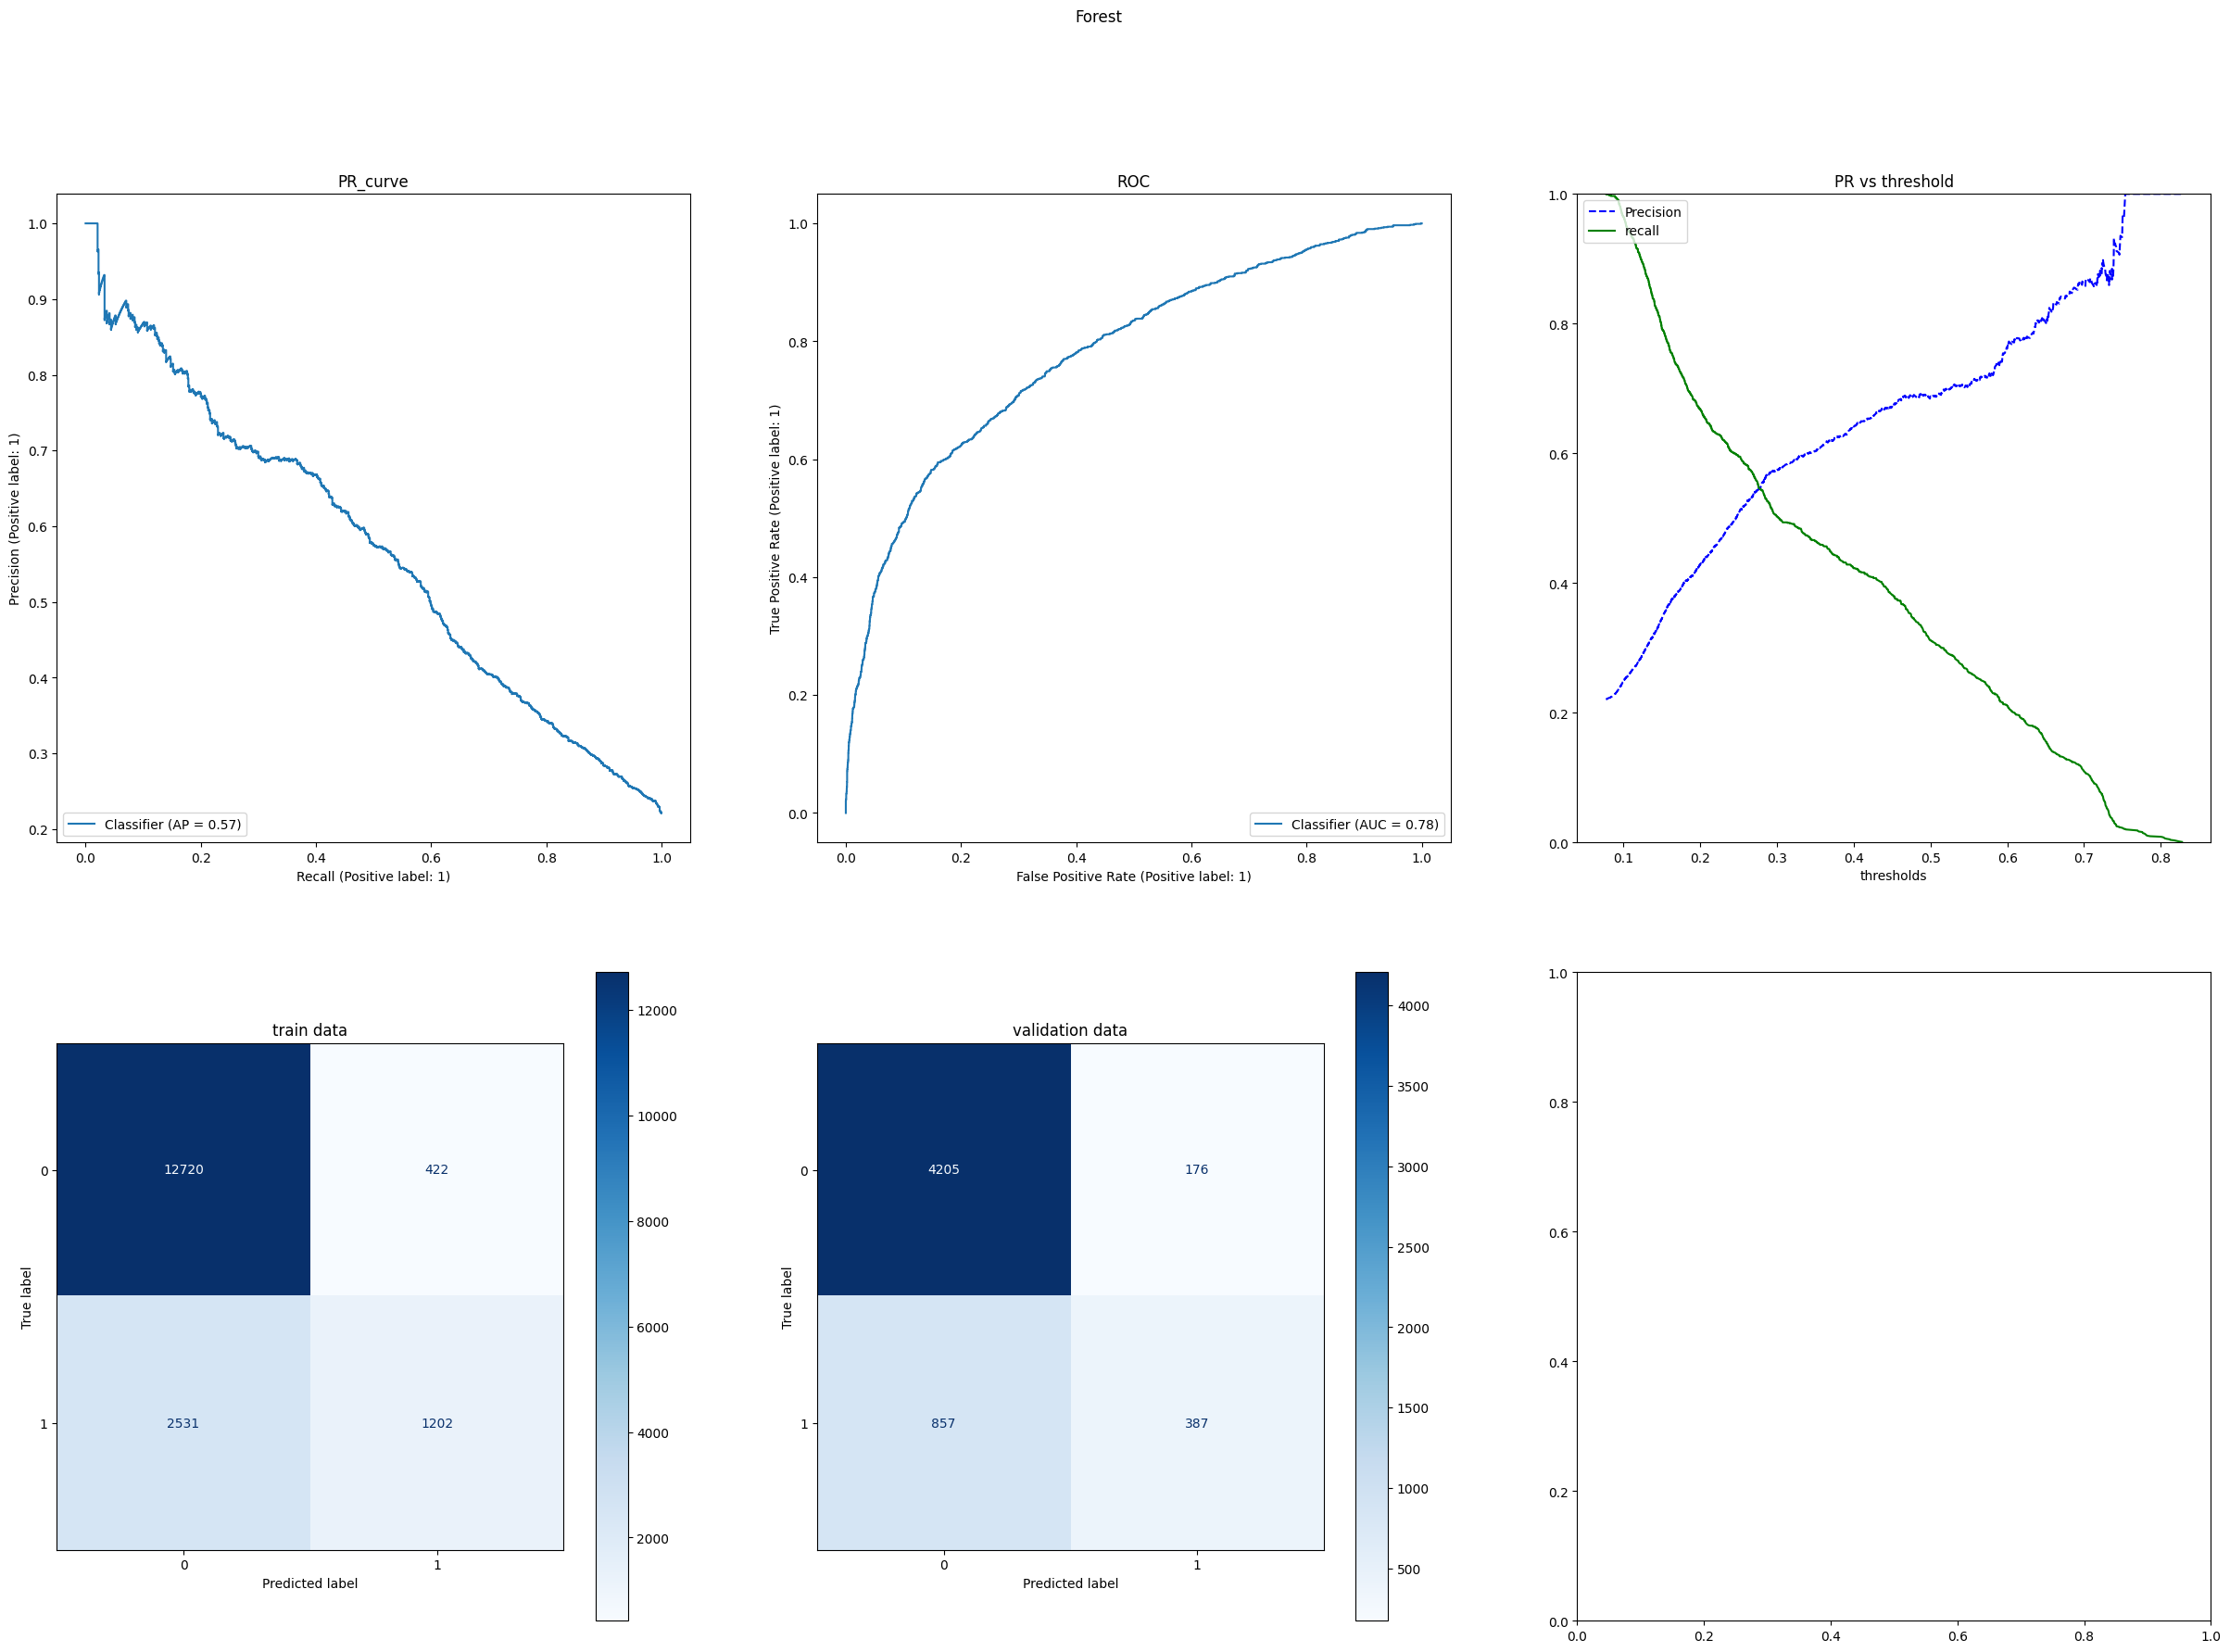

Ada
[[4203  178]
 [ 821  423]]

train scores
accuracy : 0.8181333333333334
precision : 0.688422247446084
recall : 0.324939726761318
f1_score: 0.44149226569608735

Val scores
accuracy : 0.8224
precision : 0.7038269550748752
recall : 0.340032154340836
f1_score: 0.4585365853658537


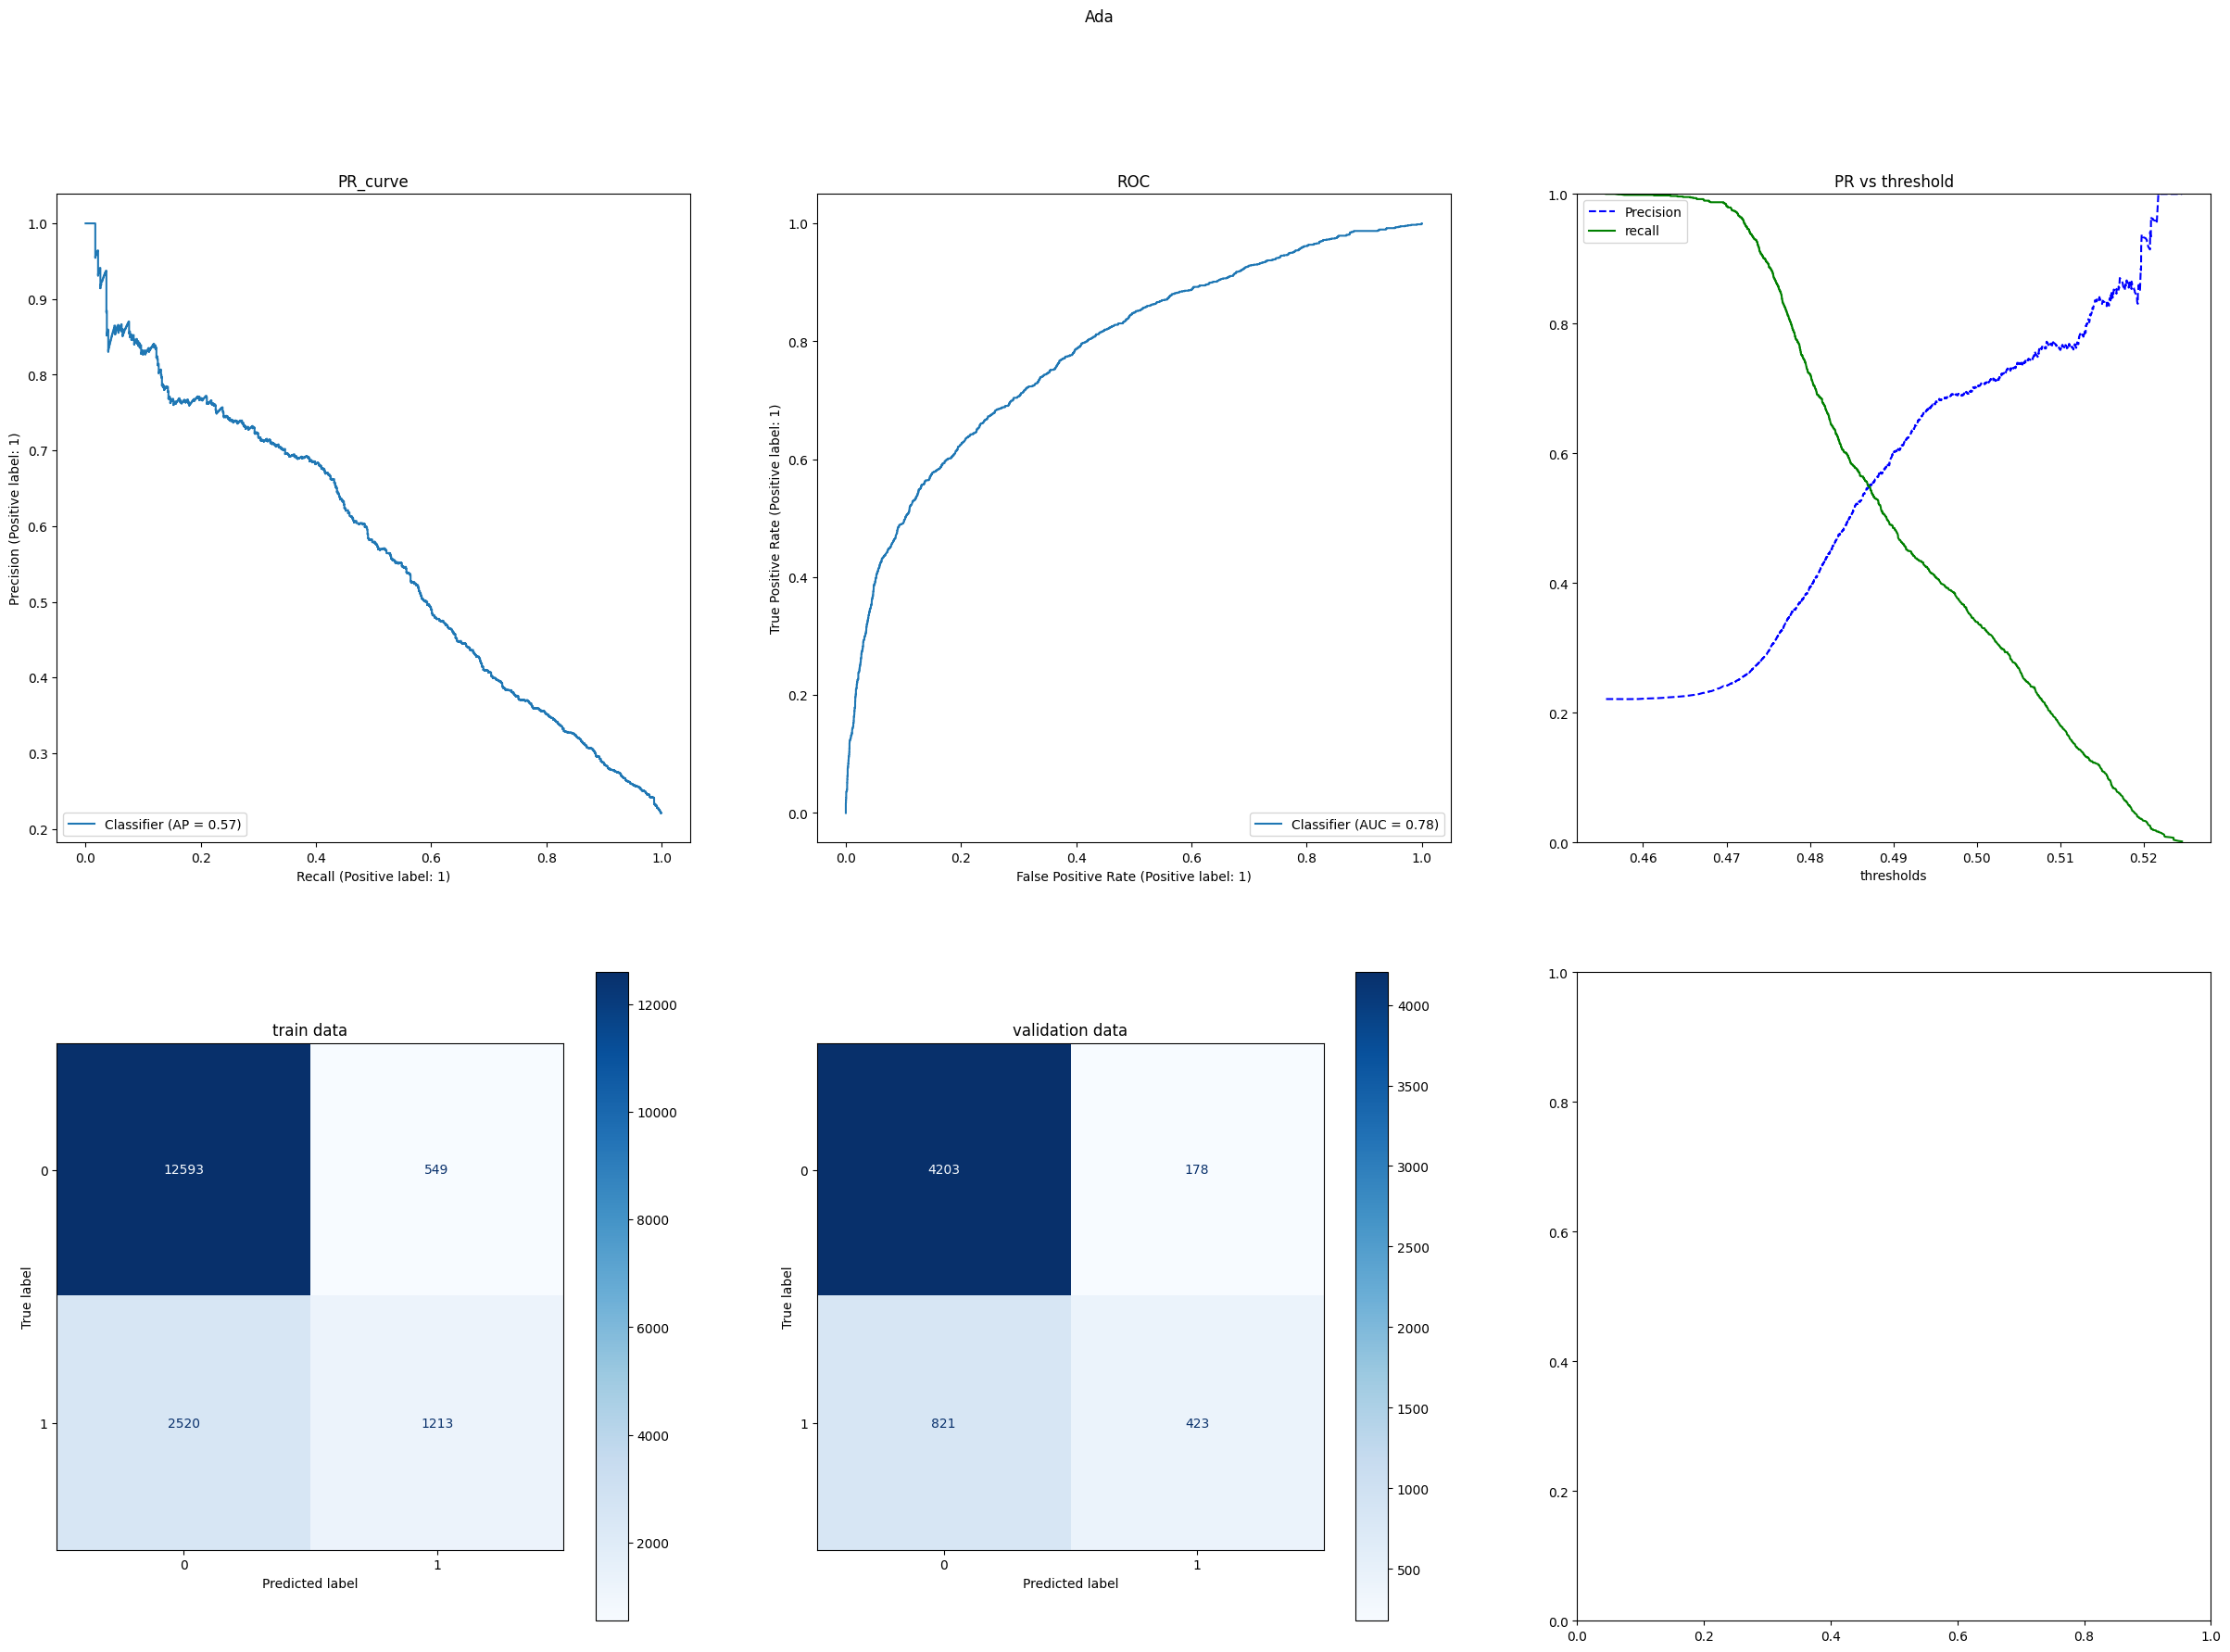

GdBoost
[[4233  148]
 [ 904  340]]

train scores
accuracy : 0.8137481481481481
precision : 0.7113180515759312
recall : 0.2660058933833378
f1_score: 0.3872099824527198

Val scores
accuracy : 0.8129777777777778
precision : 0.6967213114754098
recall : 0.2733118971061093
f1_score: 0.3926096997690531


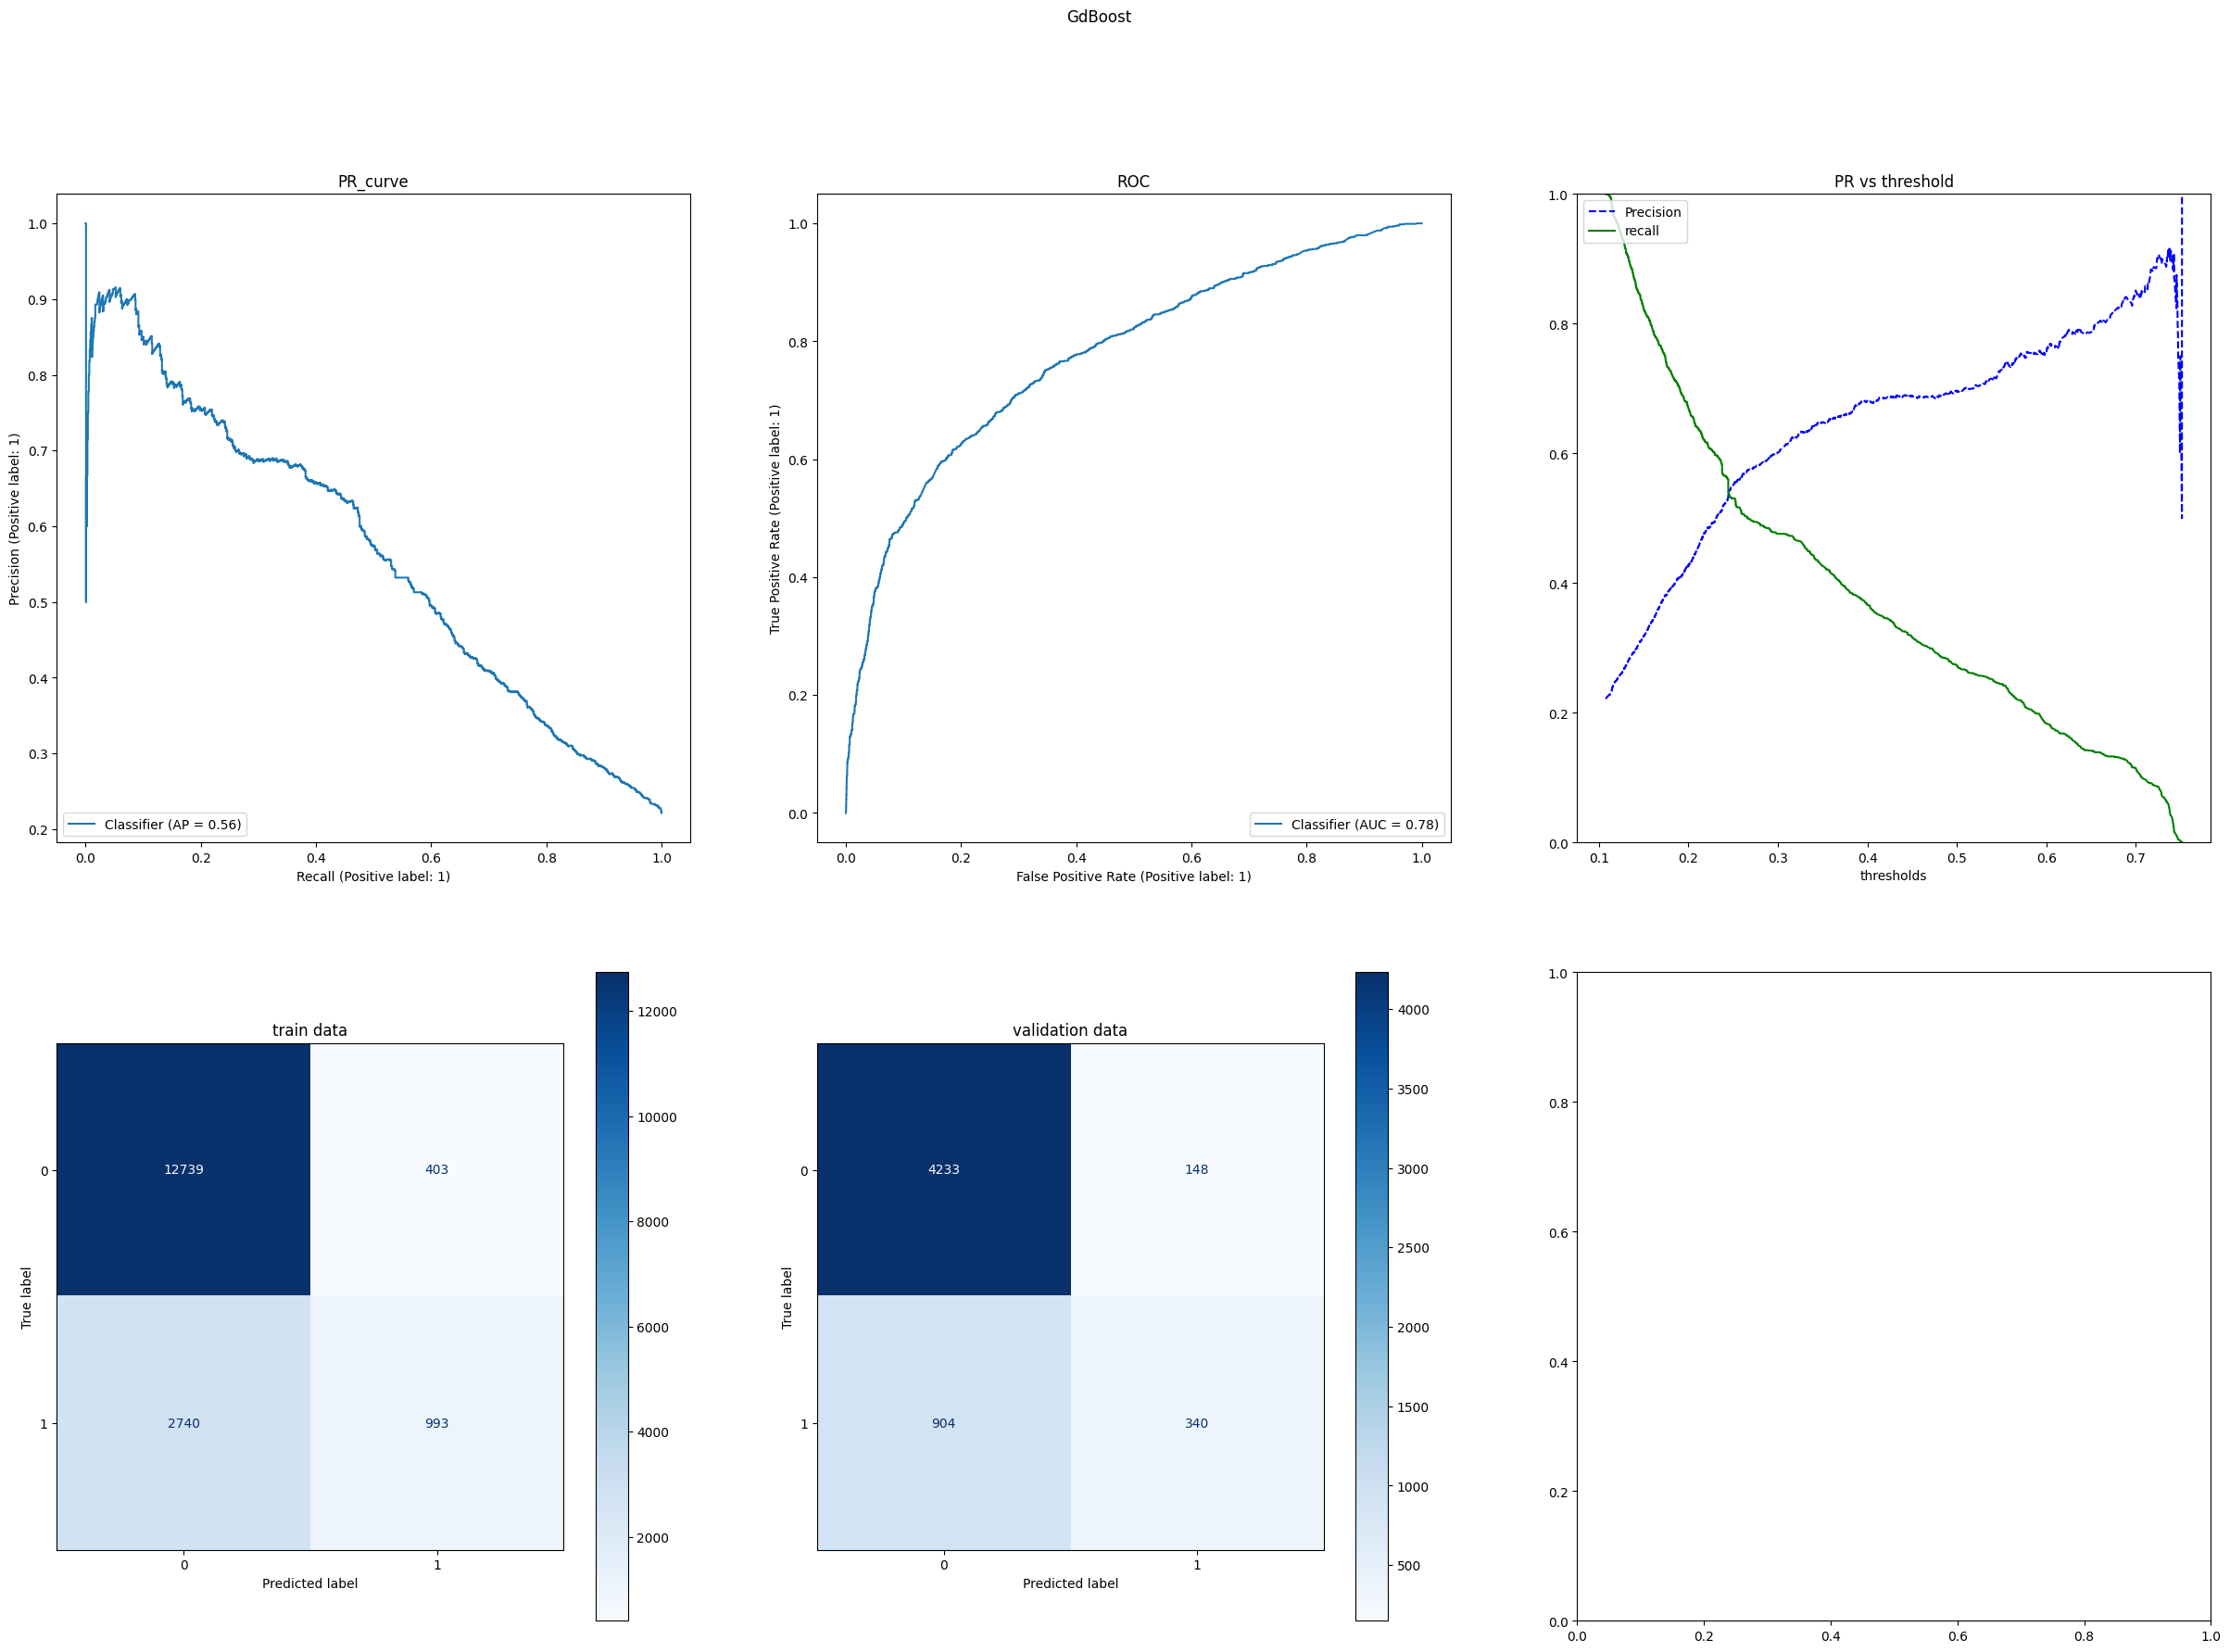

In [19]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [20]:
case_name = 'non_log,t_series,reg'

print(case_name)

non_log,t_series,reg


Tree
[[4117  264]
 [ 782  462]]

train scores
accuracy : 0.8265481481481481
precision : 0.6911764705882353
recall : 0.39030270559871416
f1_score: 0.49888717685327855

Val scores
accuracy : 0.8140444444444445
precision : 0.6363636363636364
recall : 0.37138263665594856
f1_score: 0.46903553299492384


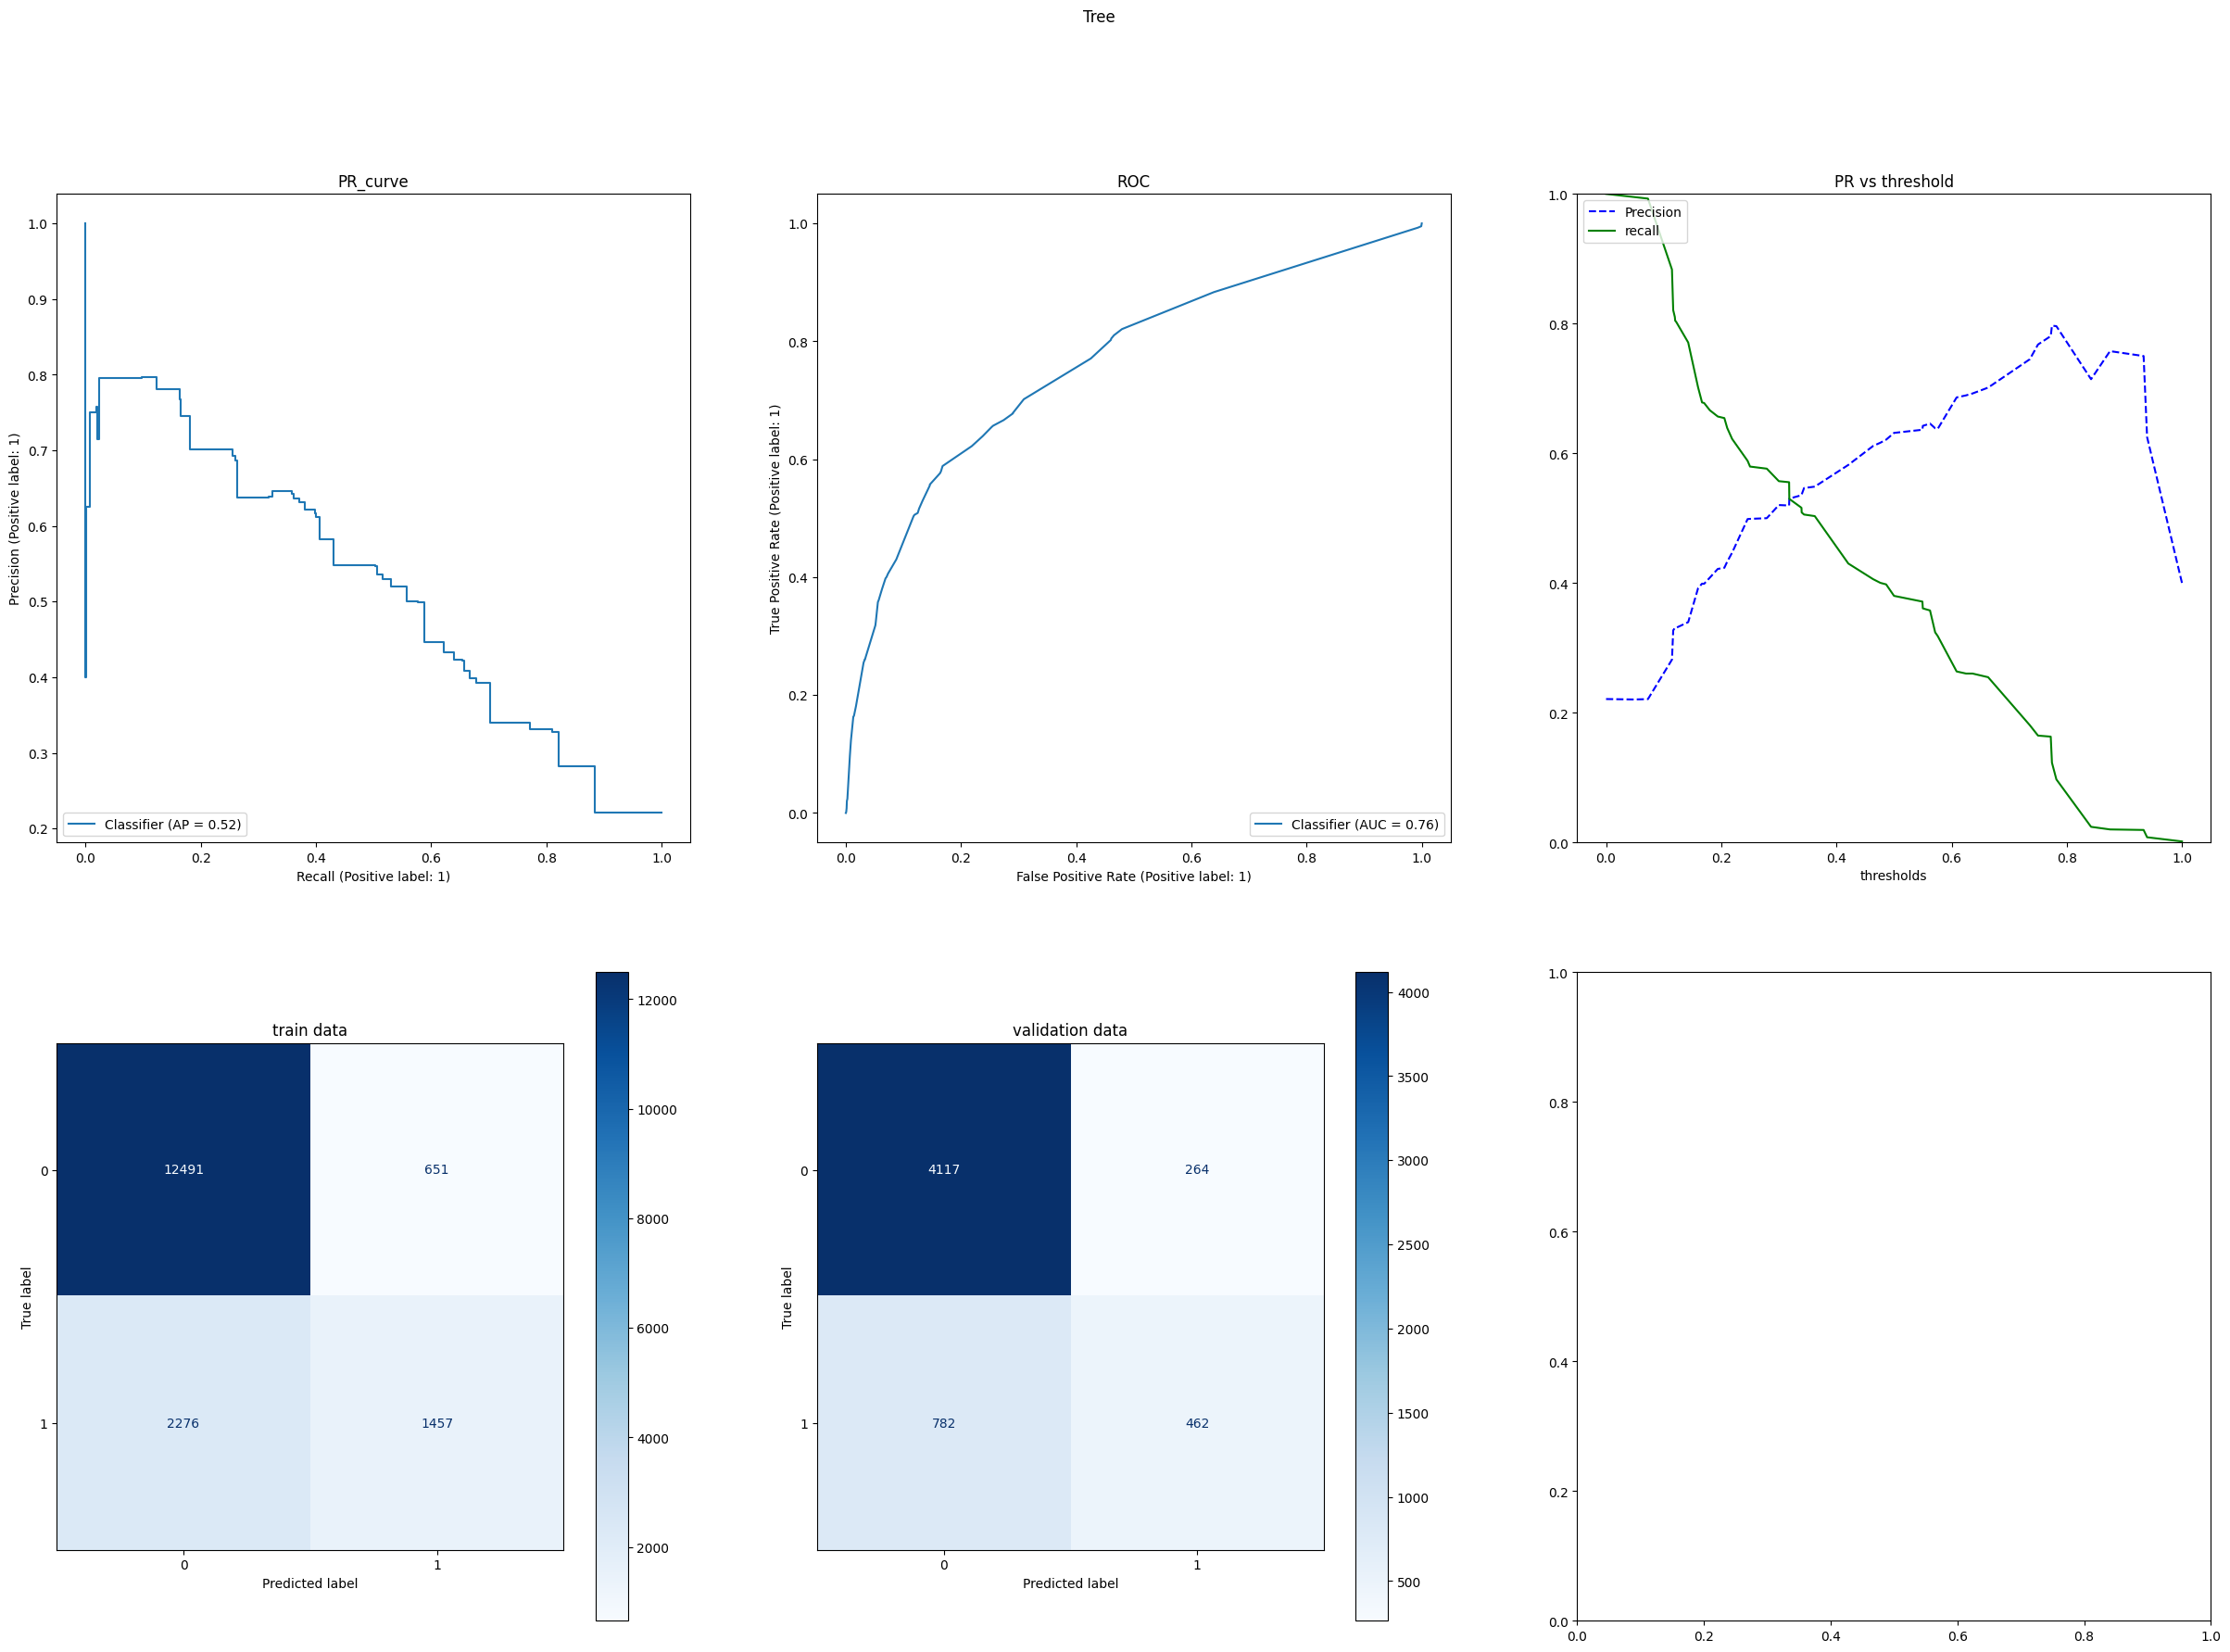

Forest
[[4176  205]
 [ 869  375]]

train scores
accuracy : 0.8215111111111111
precision : 0.7116852613035819
recall : 0.324671845700509
f1_score: 0.445916114790287

Val scores
accuracy : 0.8090666666666667
precision : 0.646551724137931
recall : 0.30144694533762056
f1_score: 0.41118421052631576


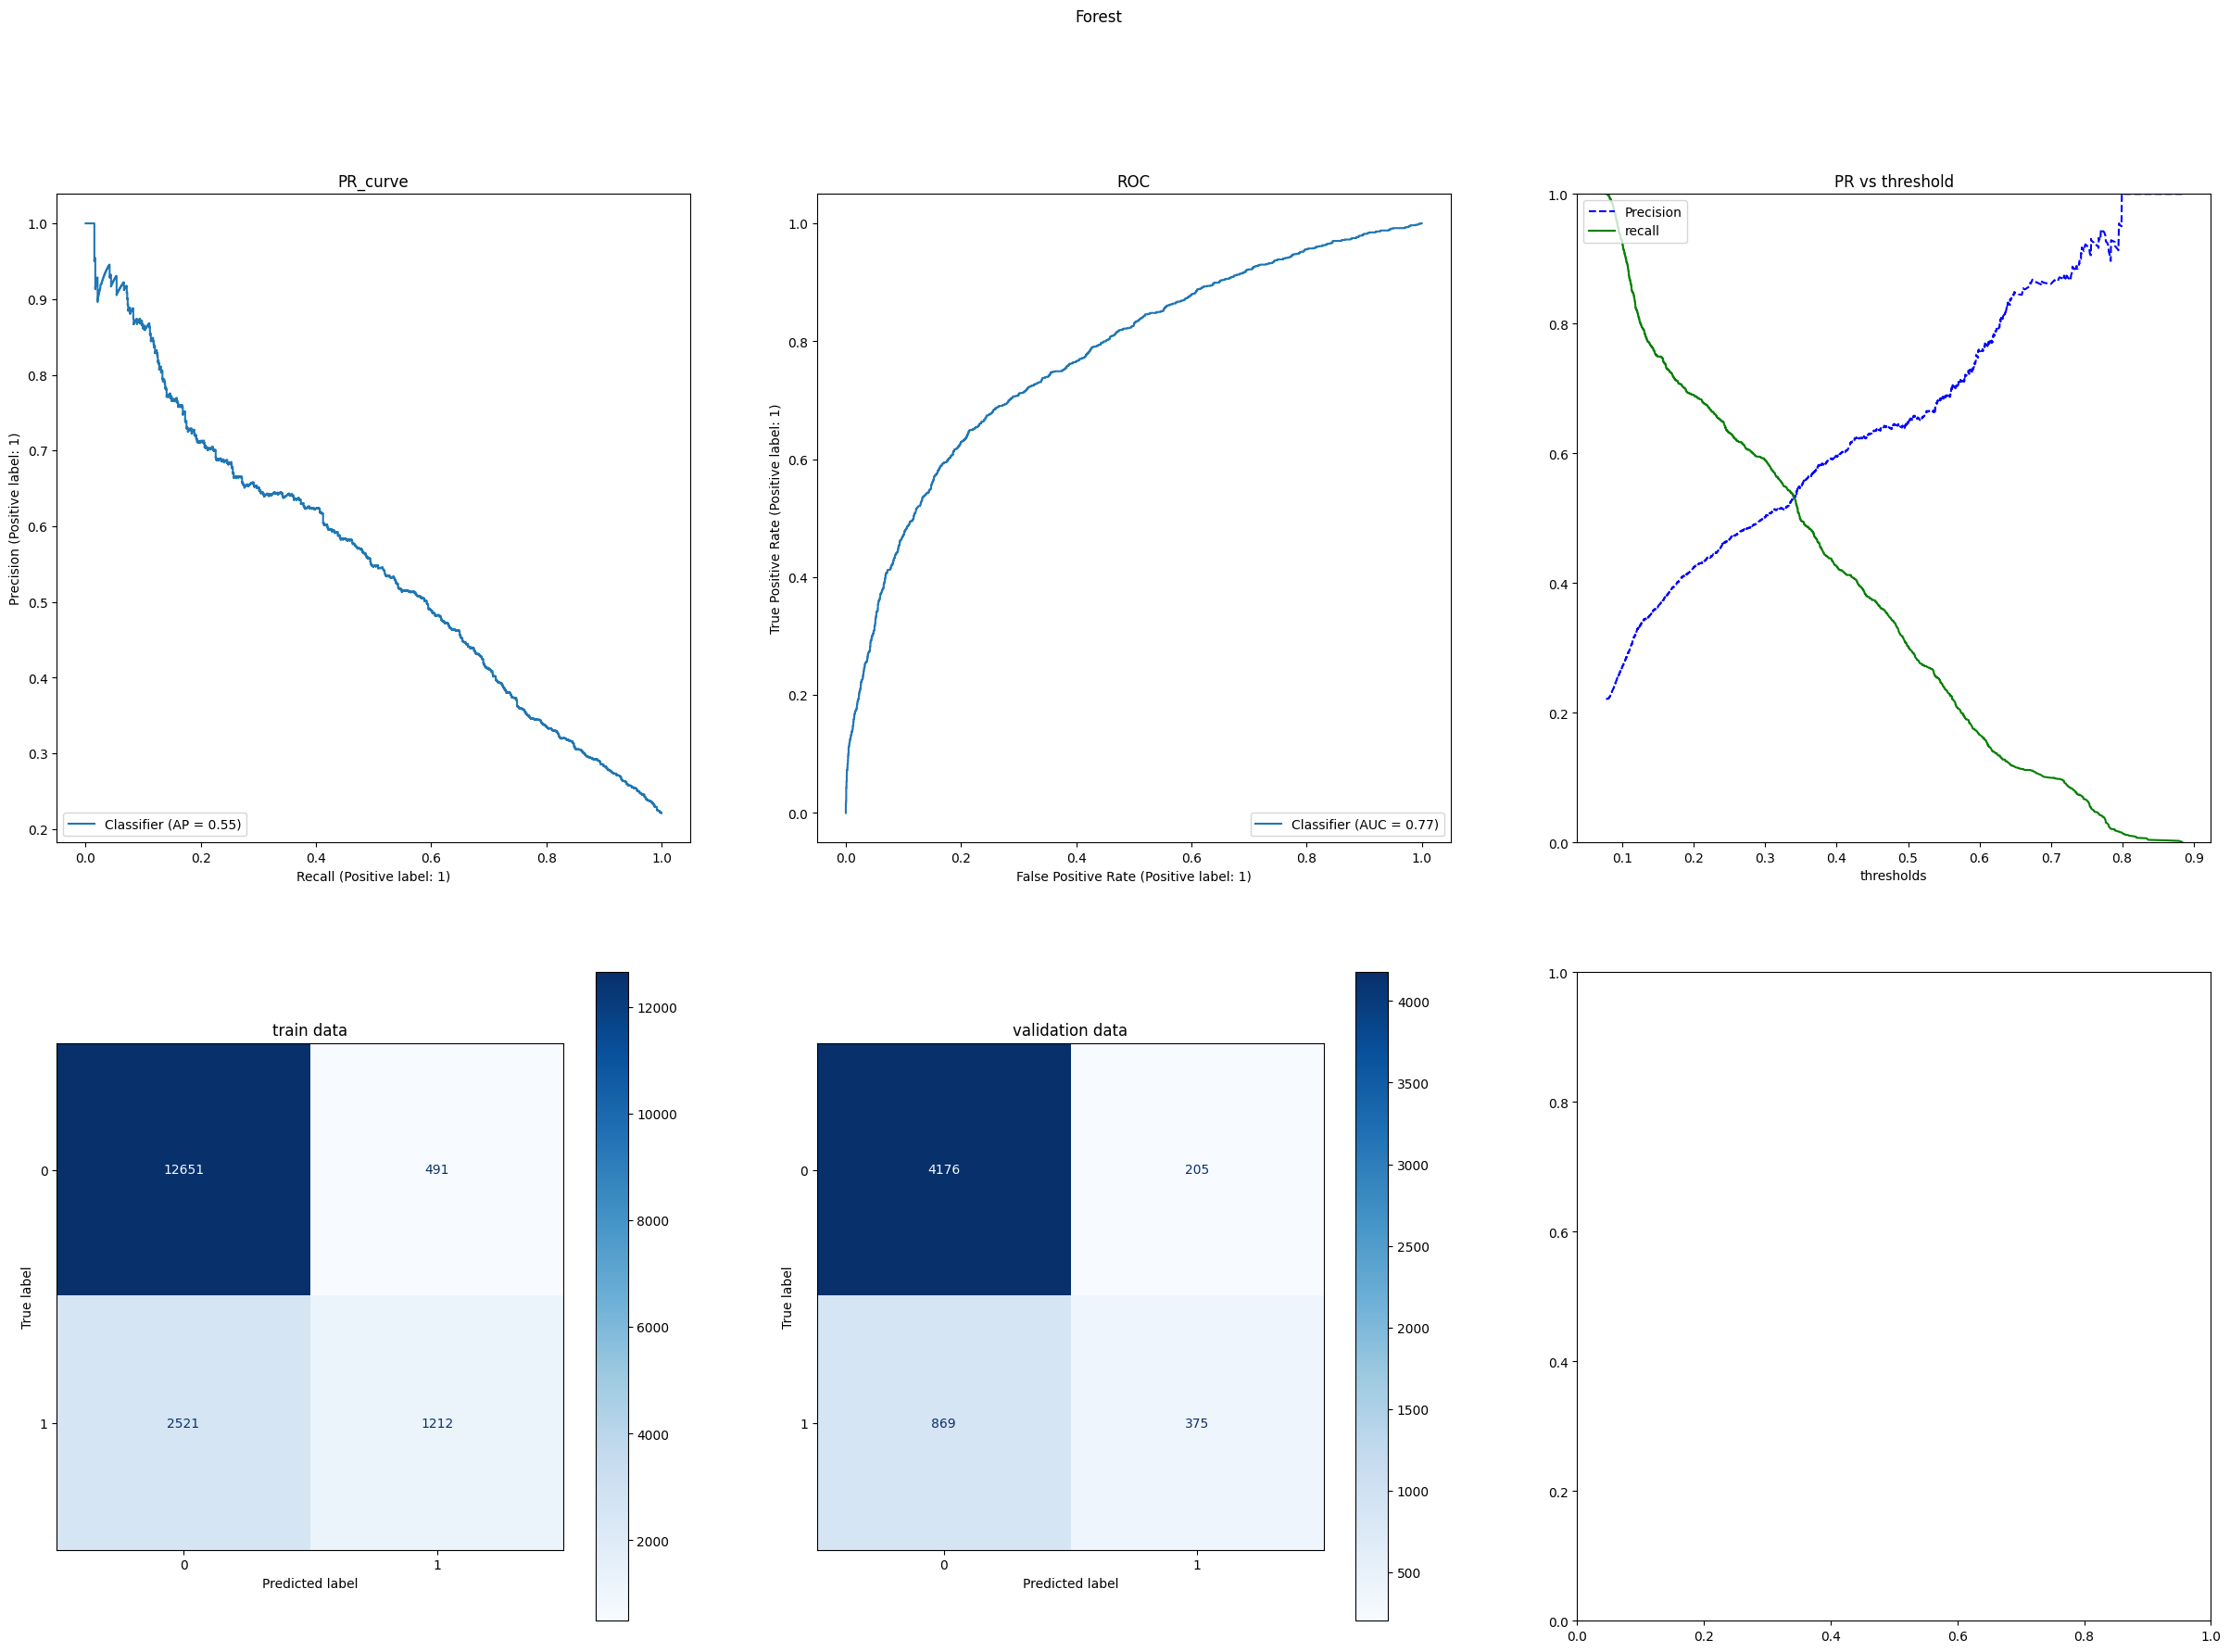

Ada
[[4183  198]
 [ 869  375]]

train scores
accuracy : 0.8102518518518519
precision : 0.660229330114665
recall : 0.2930618805250469
f1_score: 0.40593692022263456

Val scores
accuracy : 0.8103111111111111
precision : 0.6544502617801047
recall : 0.30144694533762056
f1_score: 0.4127682993946065


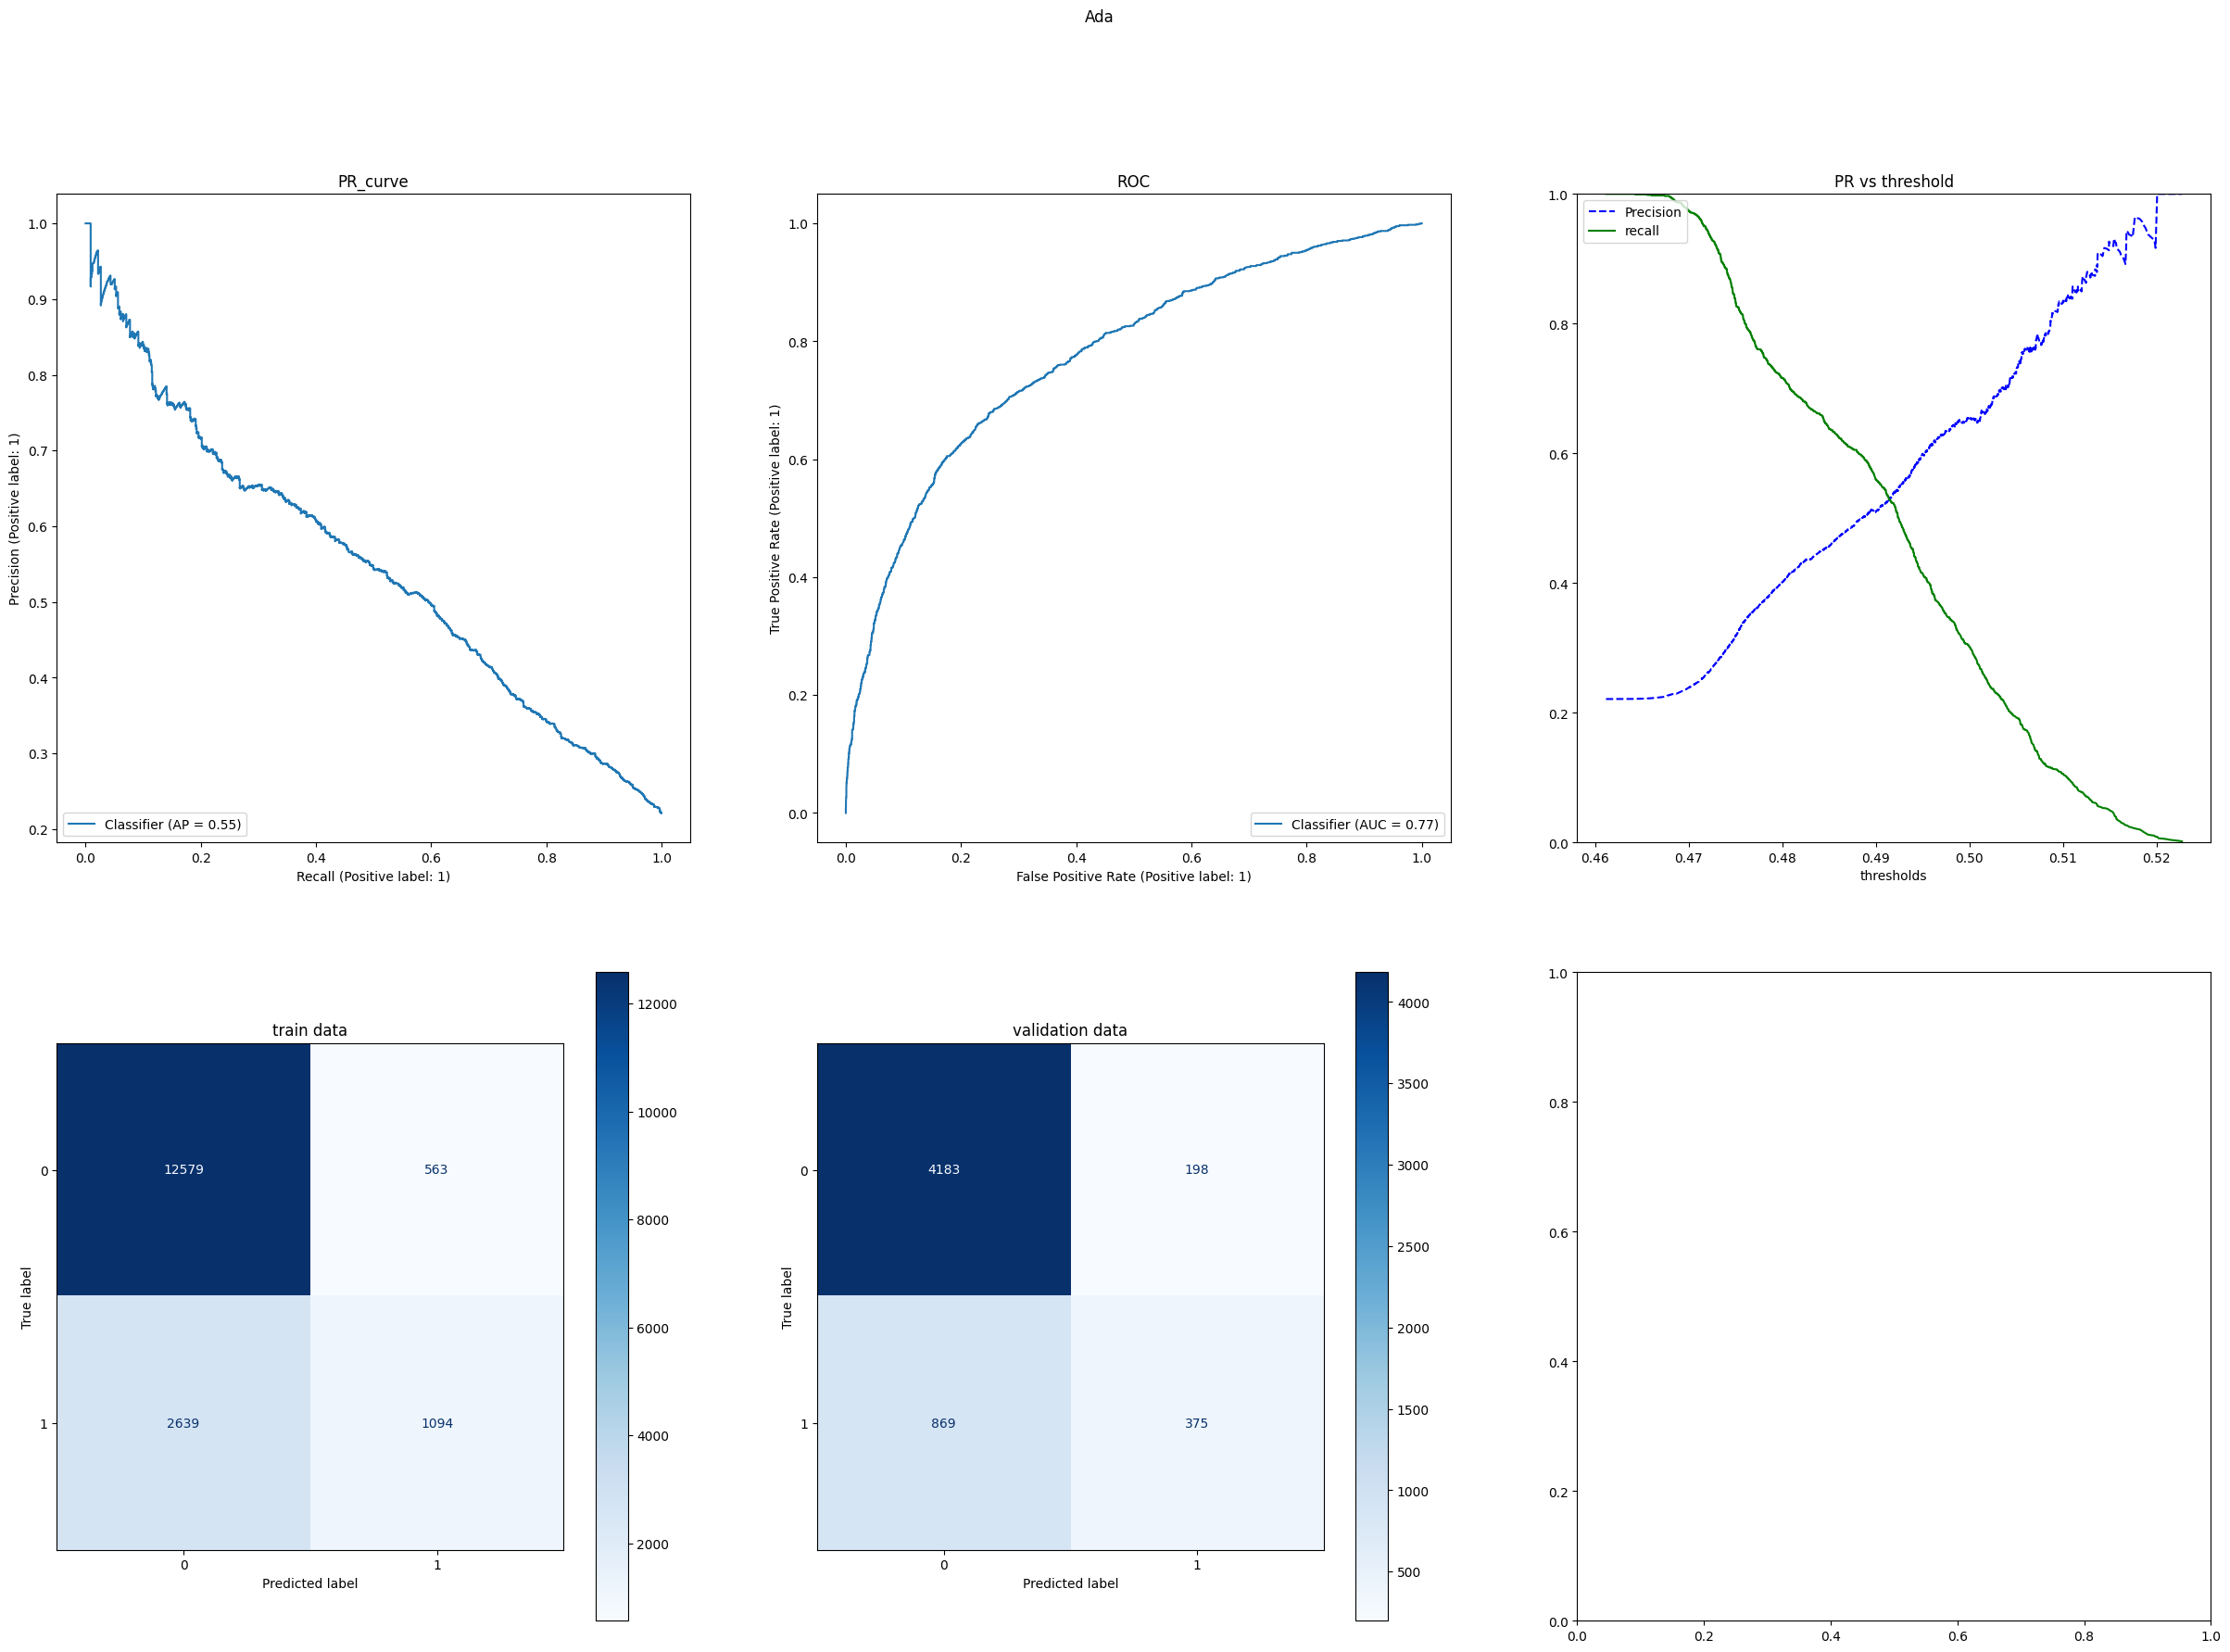

GdBoost
[[4211  170]
 [ 918  326]]

train scores
accuracy : 0.8090666666666667
precision : 0.6751199451679233
recall : 0.2638628448968658
f1_score: 0.37942989214175654

Val scores
accuracy : 0.8065777777777777
precision : 0.657258064516129
recall : 0.2620578778135048
f1_score: 0.37471264367816093


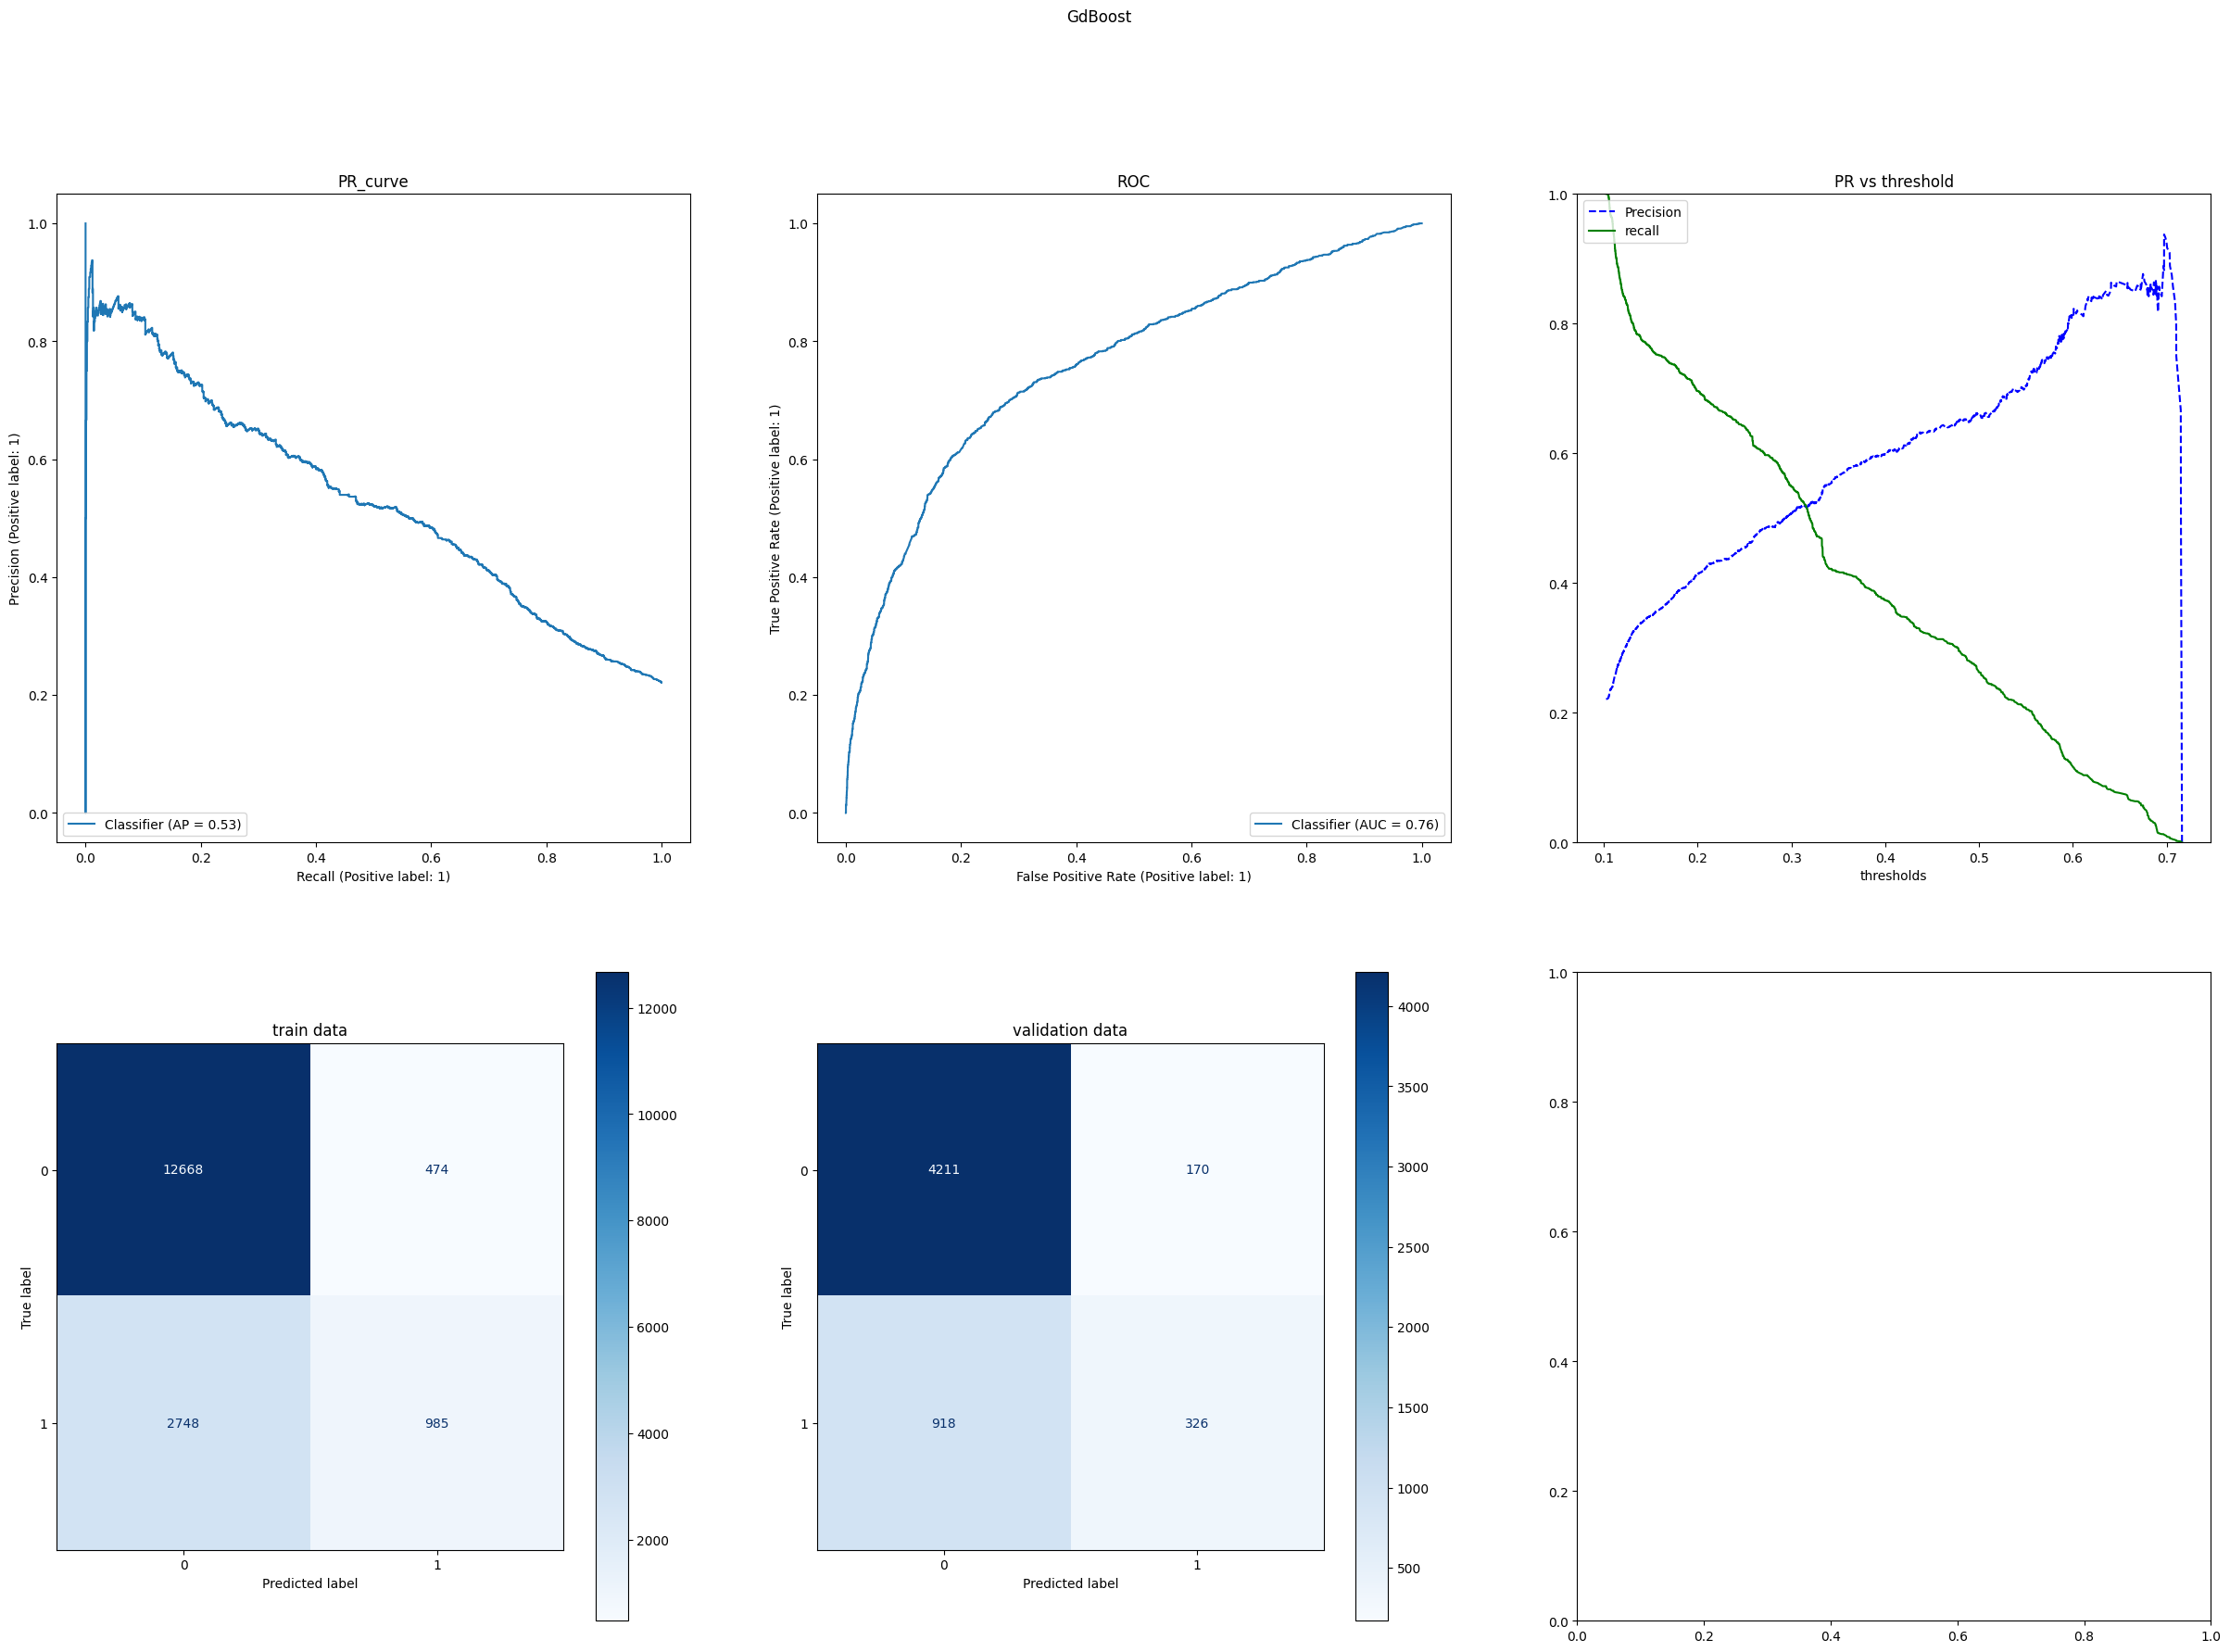

In [21]:

my_base_transform = BasicTransformer(scale="")
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [22]:
predictions = np.array(y_val_preds).transpose()
pred_df = pd.concat([y_val ,pd.DataFrame(predictions,index=y_val.index)],axis=1)

In [23]:
try:
    pred_df.to_csv(output_path+'val_results_less_features.csv')
except:
   try:
        pred_df.to_csv(objectut+'val_results_less_features.csv')
   except:
        print('err')
    

In [24]:
wrong =pred_df.apply(lambda x :abs(x-pred_df.default), axis=0)
wrong_sum =wrong.sum(axis=1)

Total 24 classifying was executed
Following are analysis of consistently wrong samples


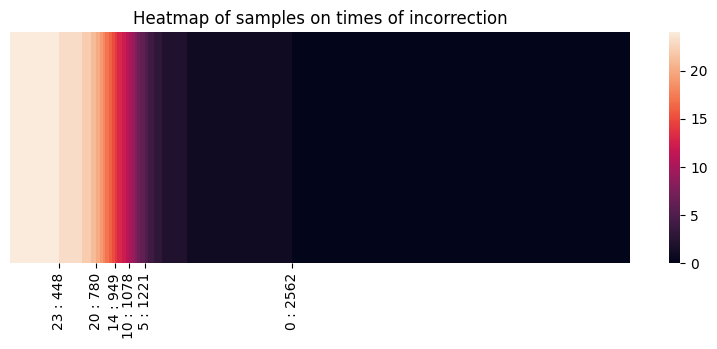

In [31]:
n = wrong.shape[1]-1
print(f'Total {n} classifying was executed\nFollowing are analysis of consistently wrong samples')

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,3))
freq_for_heat =wrong_sum.sort_values(ascending=False).to_numpy().reshape(1,-1)
sns.heatmap(freq_for_heat,vmax=n)
x_ticks =[wrong_sum[wrong_sum>j].shape[0] for j in [n-1,20,14,10,5]]
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{freq} : {count}' for count,freq in zip(x_ticks,[n-1,20,14,10,5,0])])
ax.set_yticks([])
ax.set_title('Heatmap of samples on times of incorrection')
for n in [50,100,200]:
    plt.savefig(output_path+f'consis_wrong_heat_dpi{n}.png',dpi=n)
plt.show()
plt.close()

In [26]:
cons_wrong_idc =wrong_sum[wrong_sum>14].index

cons_wrong =df_original.loc[cons_wrong_idc]

print(f'mean of consistently wrong samples = {round(cons_wrong.default.mean(),4)}')

print(f'mean of every incorrenct samples = {df_original.loc[wrong_sum[wrong_sum>0].index].default.mean()}')

incorrect_means = [df_original.loc[wrong_sum[wrong_sum>i].index].default.mean() for i in np.arange(0,28)]

mean of consistently wrong samples = 0.8388
mean of every incorrenct samples = 0.4371584699453552


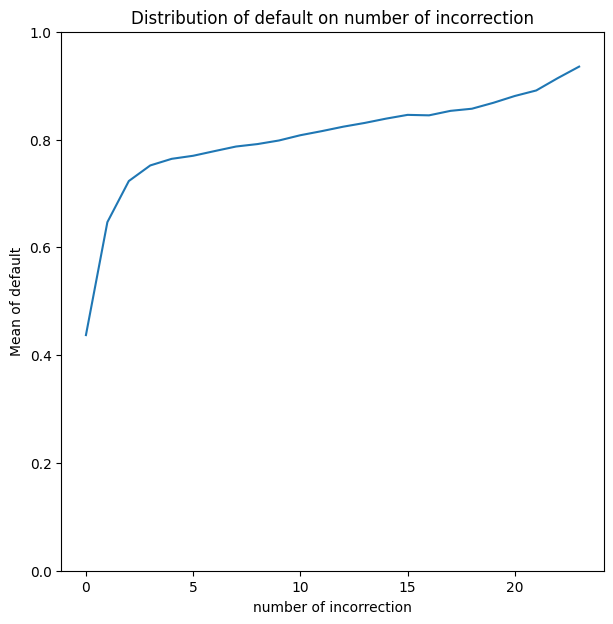

In [27]:
fig ,ax = plt.subplots(figsize=(7,7))
ax.plot(np.arange(0,28),incorrect_means)
ax.set_ylim(0,1)
ax.set_ylabel('Mean of default')
ax.set_xlabel('number of incorrection')
ax.set_title('Distribution of default on number of incorrection')
plt.savefig(output_path+'dist_def_number_incorr.png',dpi=100)
plt.show()
plt.close()

## Mostly, consistently incorrect samples are mostly default

In [28]:
df_original.loc[cons_wrong_idc].to_csv(output_path+'consistently_wrong_samples.csv')

In [29]:
V=pd.DataFrame(evals_df_columns,columns=['name','accuracy','precision','recall','f1'])

In [30]:
V.to_csv(output_path+'eval_results.csv')
print(V)

                    name  accuracy  precision  recall      f1
0     t_series,non_regul    0.7362     0.4016  0.3939  0.3977
1     t_series,non_regul    0.8096     0.6152  0.3714  0.4632
2     t_series,non_regul    0.8103     0.6315  0.3416  0.4434
3     t_series,non_regul    0.8137     0.6416  0.3569  0.4587
4          raw,non_regul    0.7252     0.3854  0.4084  0.3966
5          raw,non_regul    0.8174     0.6484  0.3810  0.4800
6          raw,non_regul    0.8212     0.6932  0.3432  0.4591
7          raw,non_regul    0.8229     0.6808  0.3754  0.4839
8           t_series,reg    0.8171     0.6759  0.3320  0.4453
9           t_series,reg    0.8096     0.6474  0.3055  0.4151
10          t_series,reg    0.8100     0.6506  0.3039  0.4142
11          t_series,reg    0.8085     0.6640  0.2717  0.3856
12               raw,reg    0.8219     0.6769  0.3722  0.4803
13               raw,reg    0.8164     0.6874  0.3111  0.4283
14               raw,reg    0.8224     0.7038  0.3400  0.4585
15      